In [1]:
import json
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np
from scipy.ndimage import find_objects, gaussian_filter, label
from skimage.filters import apply_hysteresis_threshold
from measure_noise import deviance
import pandas as pd
import glob
import seaborn as sns
import os
import random
import scipy

In [2]:
main_dir = 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\'
fish_list = glob.glob(main_dir+'*\\behavior\\*')

dir_output = main_dir+'plotting\\'
if not os.path.exists(dir_output):  # create an output directory
    os.makedirs(dir_output)

In [3]:
# delete 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220327\\behavior\\F1_13_10'
fish_list = fish_list[1:]
fish_list

['C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220327\\behavior\\F2_15_10',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220327\\behavior\\F3_16_30',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220331\\behavior\\F1_14_40',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220331\\behavior\\F2_16_00',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220331\\behavior\\F3_17_10',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220401\\behavior\\F1_15_20',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220401\\behavior\\F2_16_30',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220401\\behavior\\F3_17_30',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220402\\behavior\\F1_14_10',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D2\\20220402\\behavior\\F2_15_45',
 'C:\\Users\\yxton\\Data\\OMR_dataset\\Simultaneous_OMR_10_D

## Bout detection and df_bout(all bout info, every row is a bout) and updated vsinfo(add information) and movement angle list and left vs right info and df_bout_density

0
0
331.0


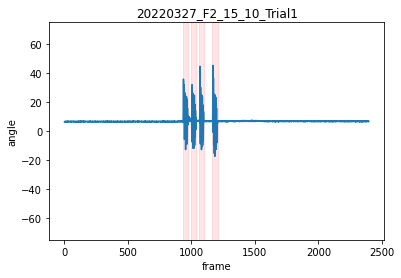

0
0


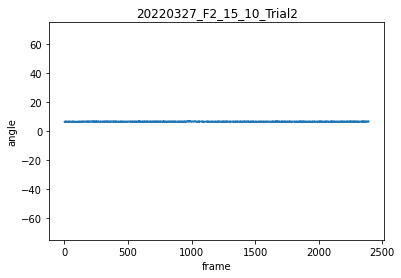

1
1
105.0


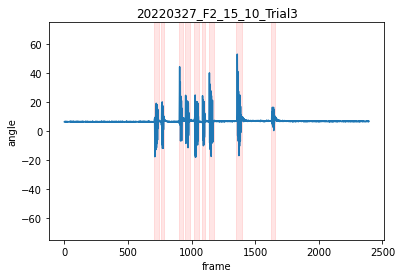

1
1


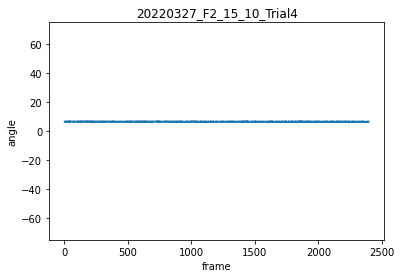

2
2
124.0


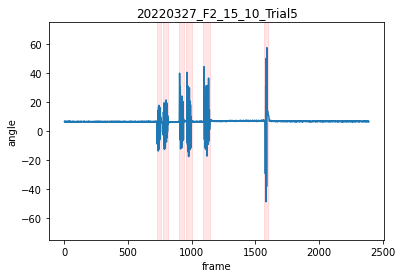

2
2


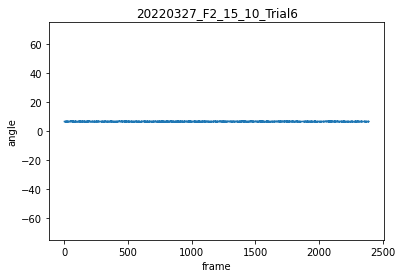

3
3
102.0


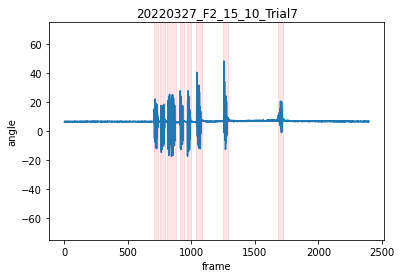

3
3


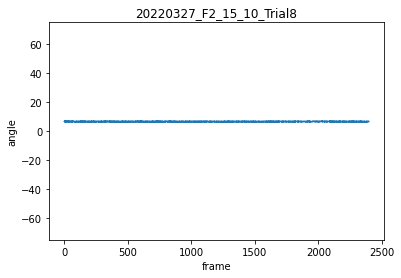

4
4
102.0


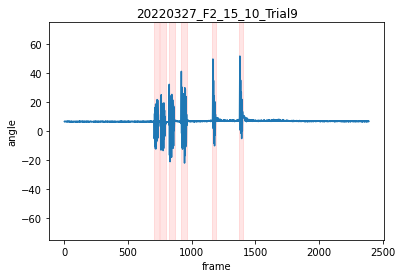

4
4


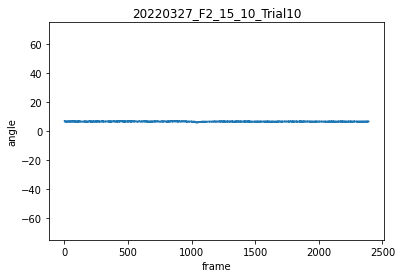

5
5
113.0


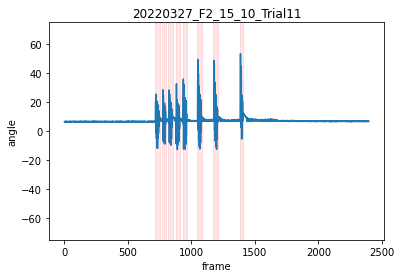

5
5


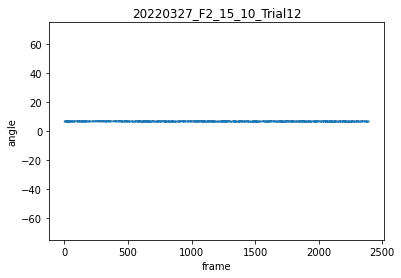

6
6
169.0


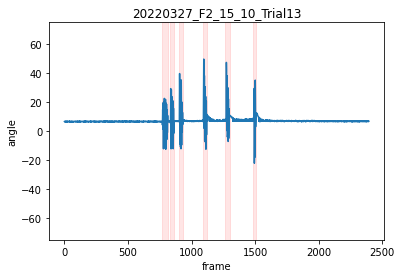

6
6


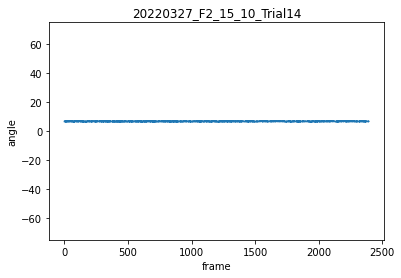

7
7
119.0


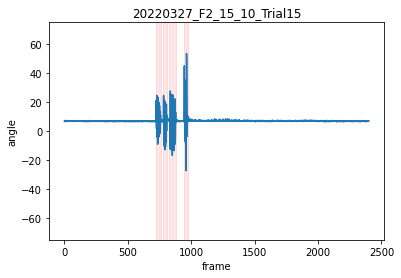

7
7


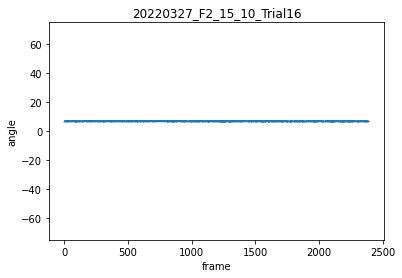

8
8
122.0


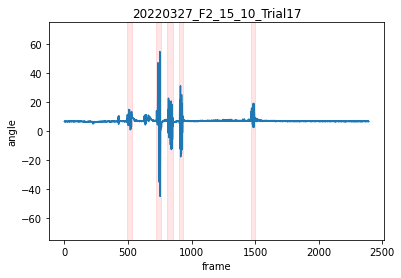

8
8


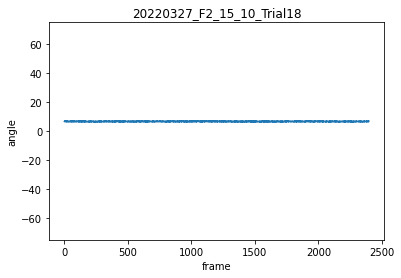

9
9
121.0


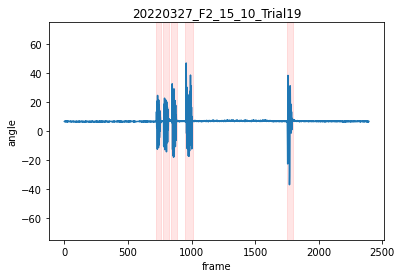

9
9


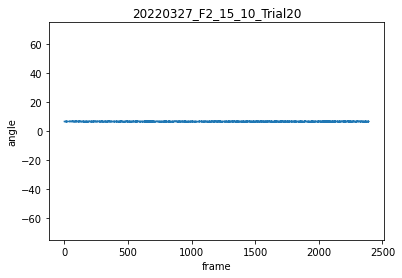

10
10
130.0


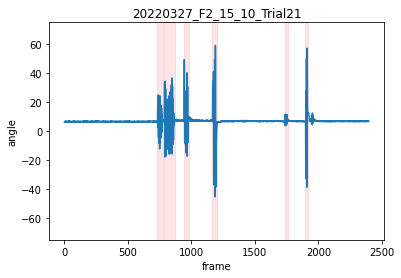

10
10


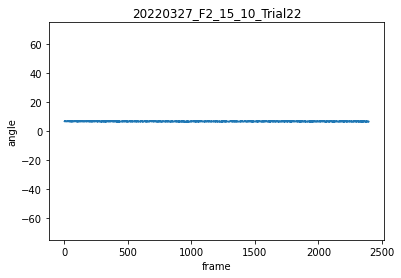

11
11
139.0


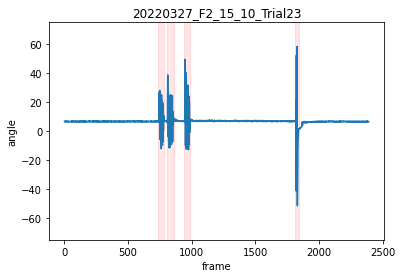

11
11


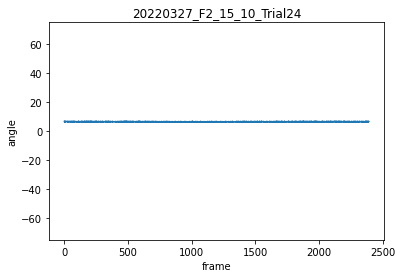

12
12
206.0


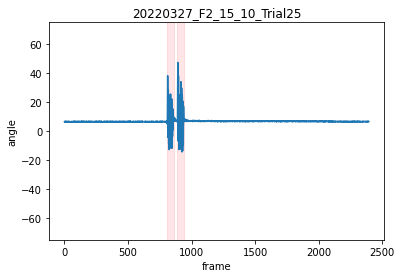

12
12


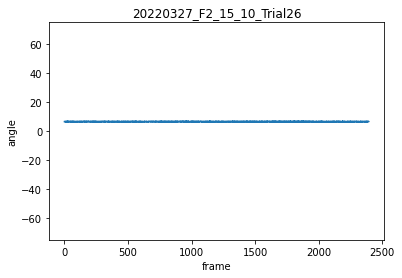

13
13
118.0


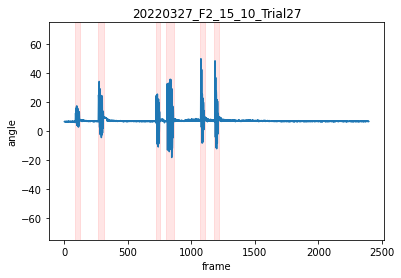

13
13


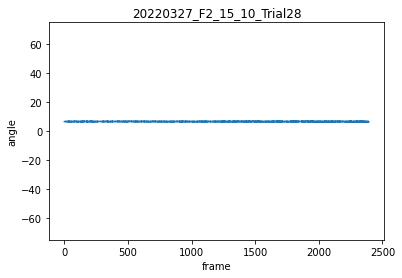

14
14
145.0


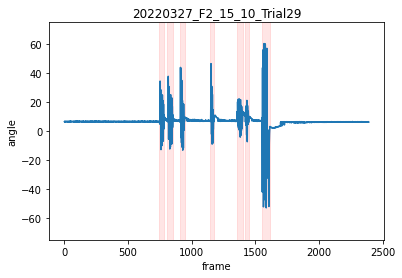

14
14


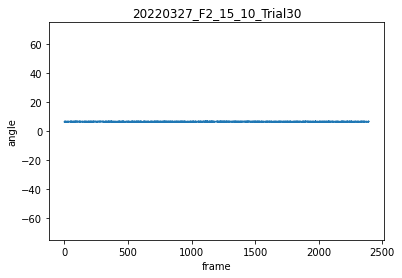

15
15
287.0


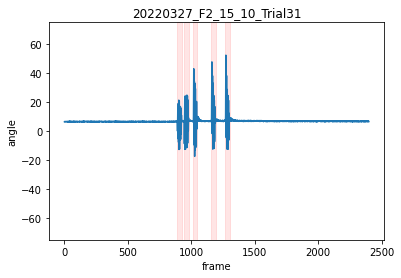

15
15


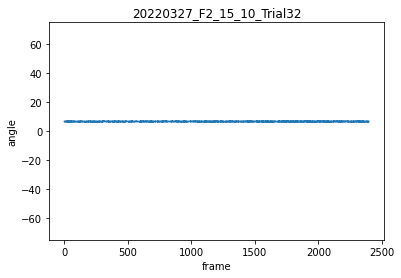

16
16
132.0


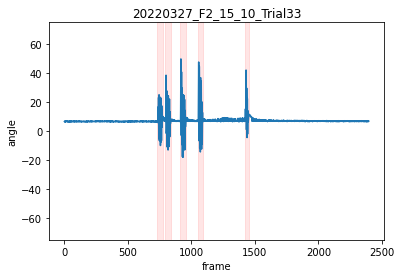

16
16


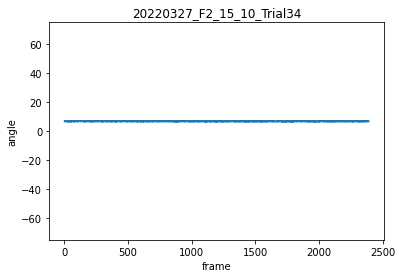

17
17
124.0


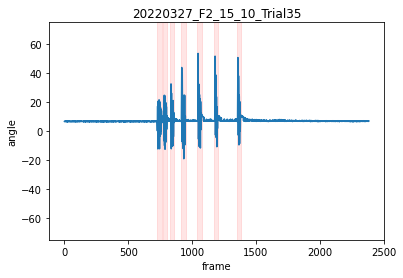

17
17


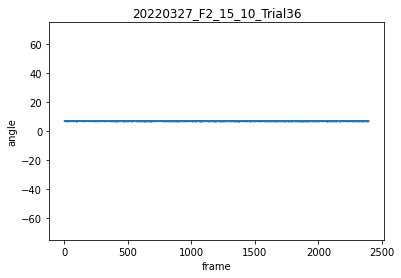

18
18
220.0


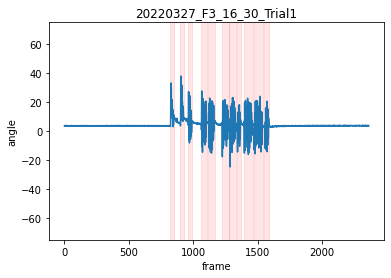

18
18


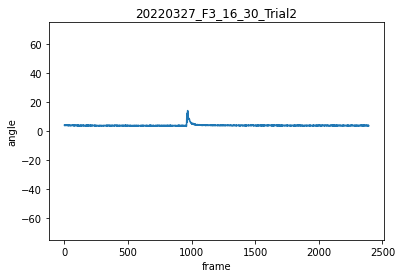

19
19
226.0


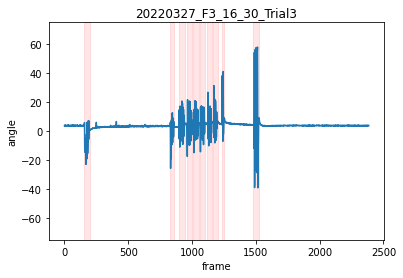

19
19


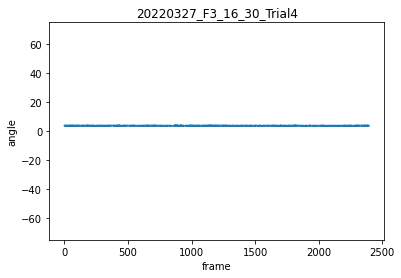

20
20


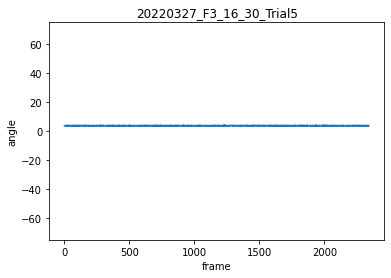

20
20
701.0


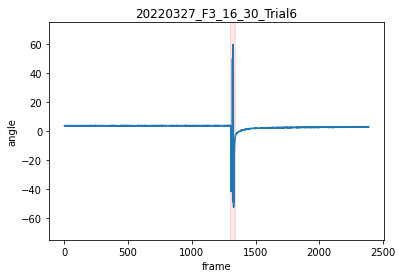

21
21
714.0


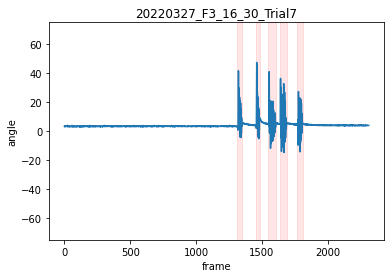

21
21


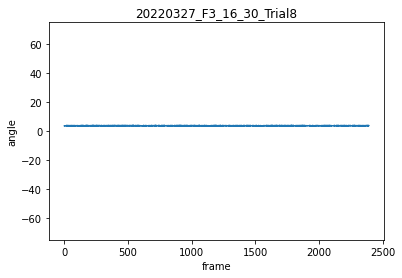

22
22


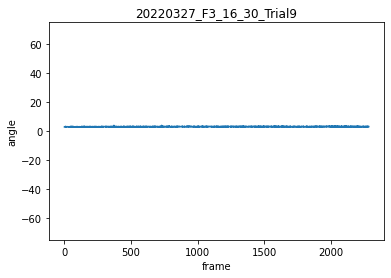

22
22


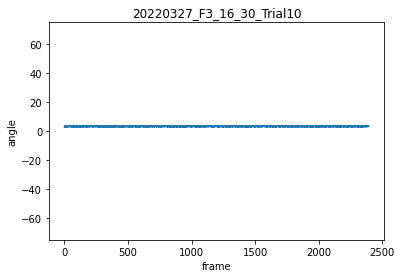

23
23
309.0


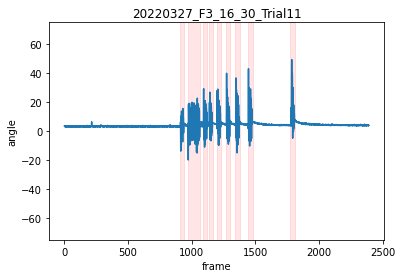

23
23


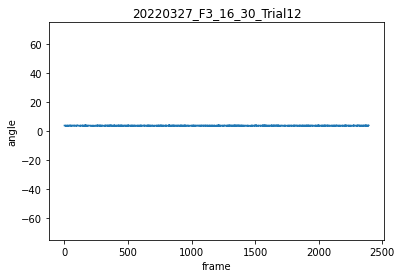

24
24
313.0


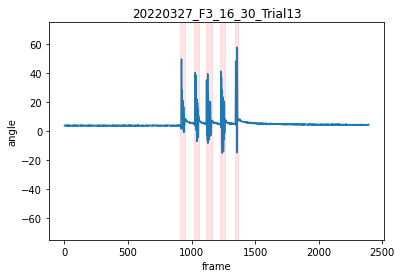

24
24


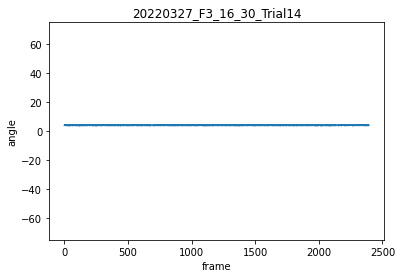

25
25
495.0


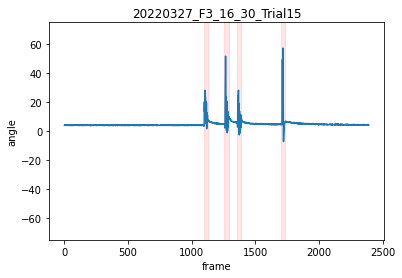

25
25


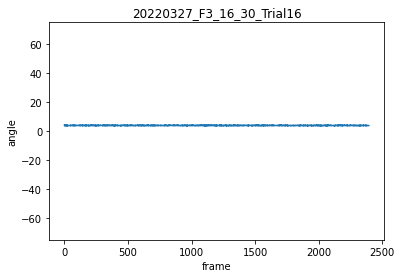

26
26
621.0


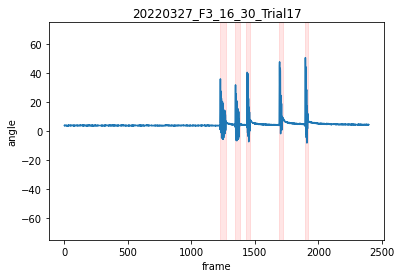

26
26


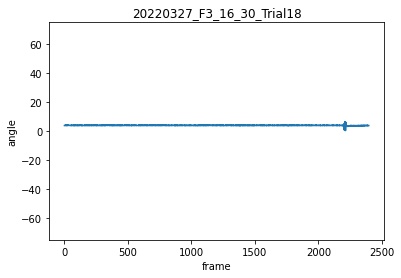

27
27
315.0


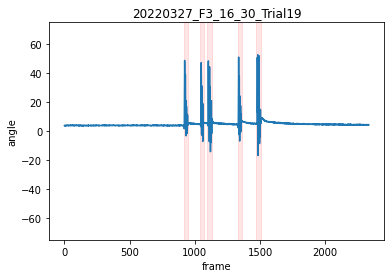

27
27


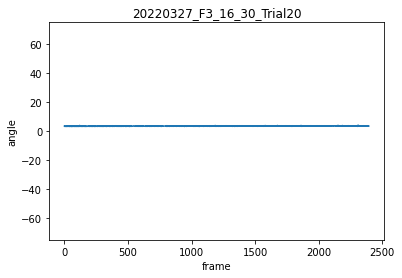

28
28
540.0


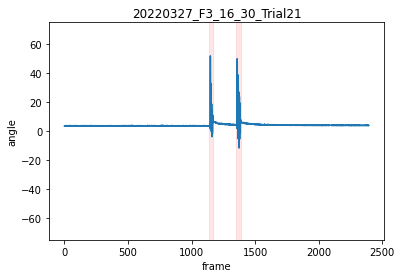

28
28


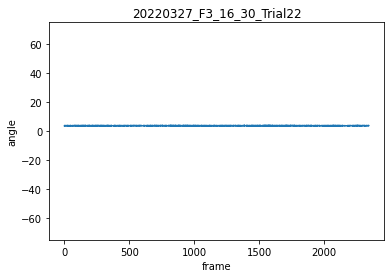

29
29


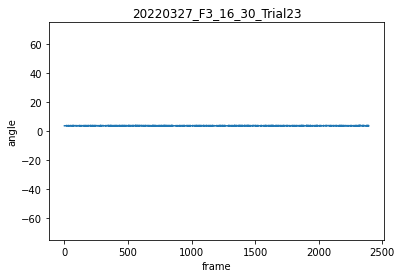

29
29


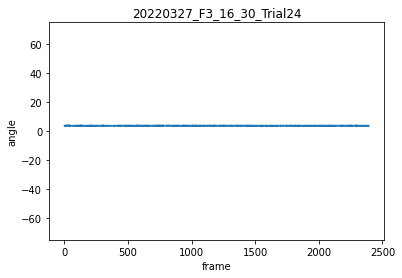

30
30


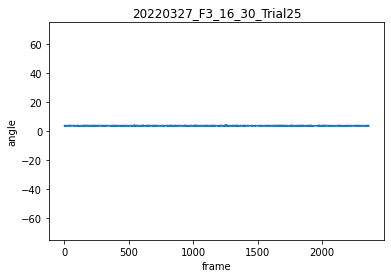

30
30


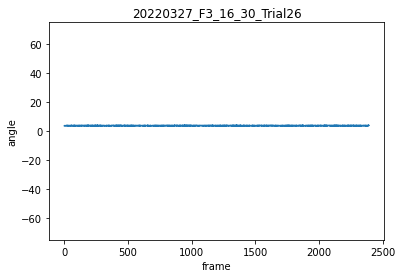

31
31
200.0


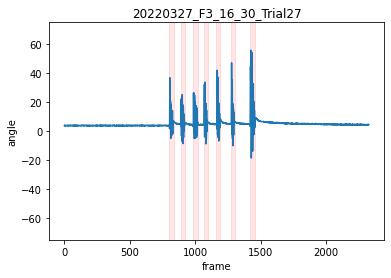

31
31


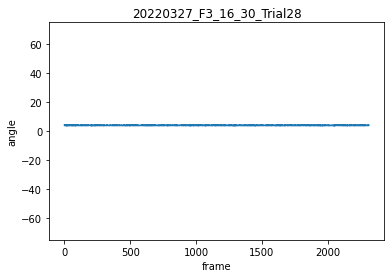

32
32
1182.0


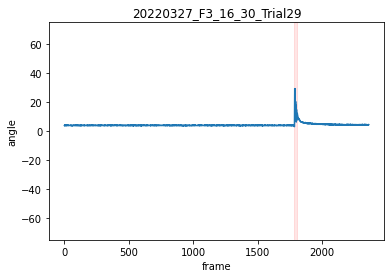

32
32


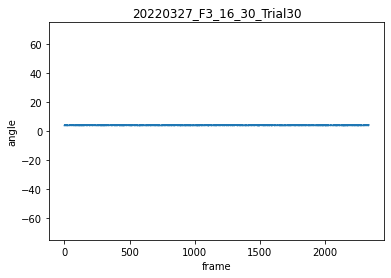

33
33
531.0


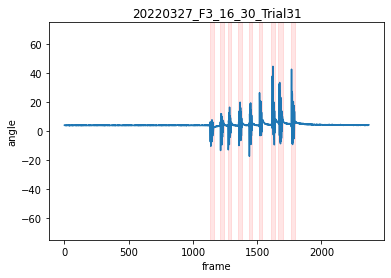

33
33


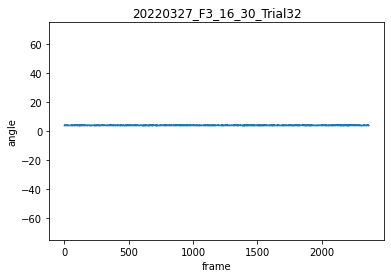

34
34
357.0


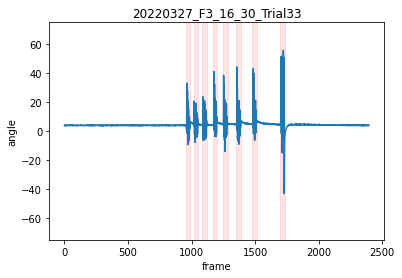

34
34


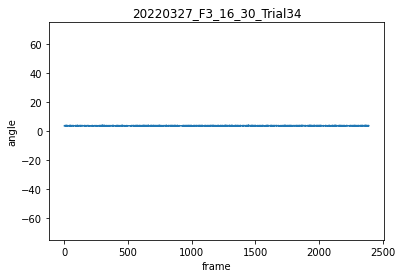

35
35


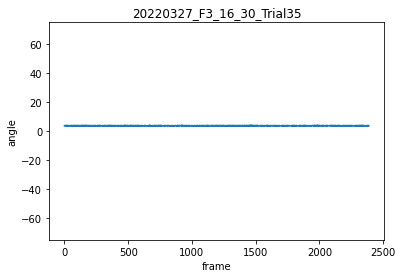

35
35


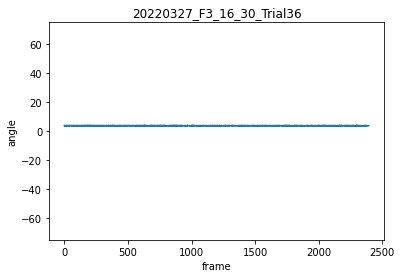

36
36
71.0


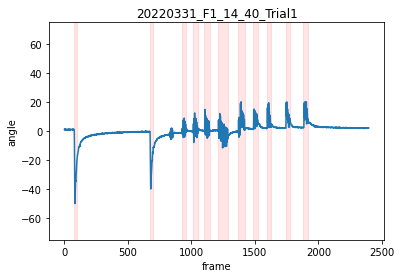

36
36
903.0


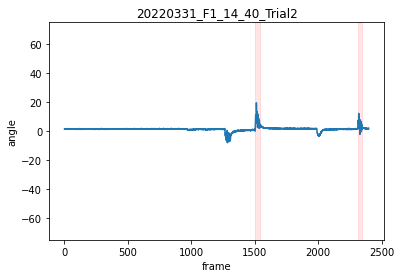

37
37
541.0


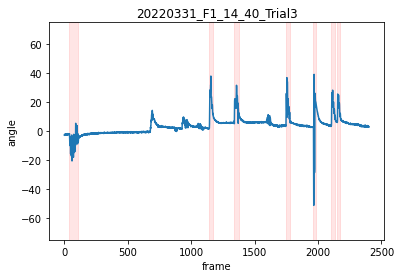

37
37


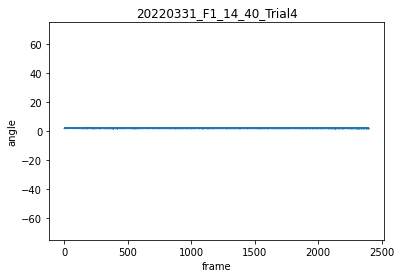

38
38
576.0


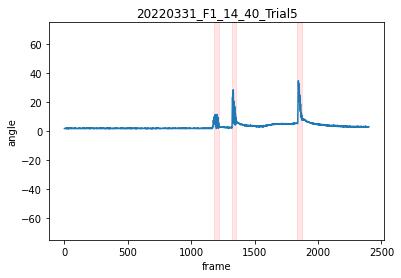

38
38
1087.0


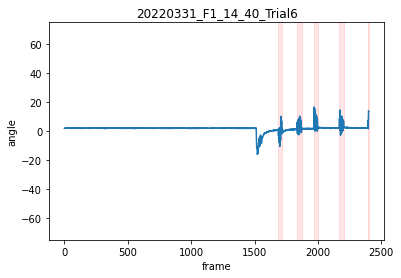

39
39
371.0


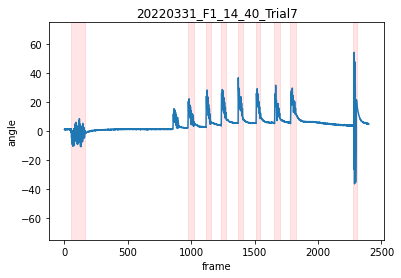

39
39


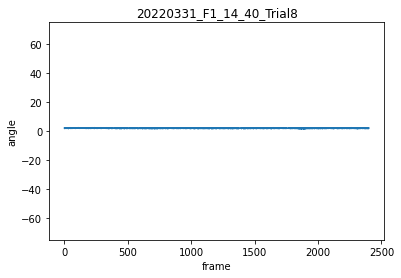

40
40
217.0


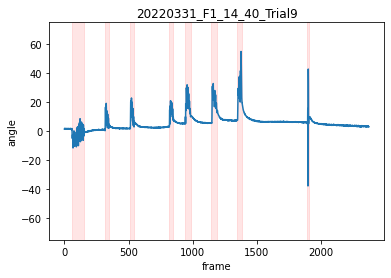

40
40


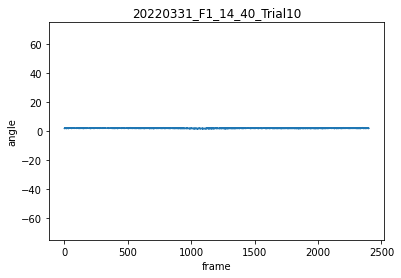

41
41
268.0


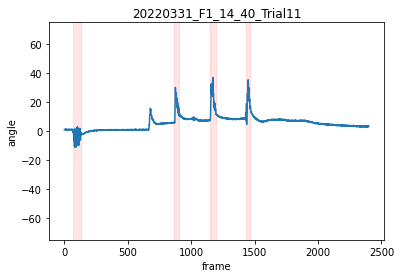

41
41
570.0


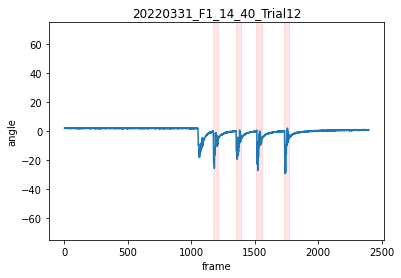

42
42
513.0


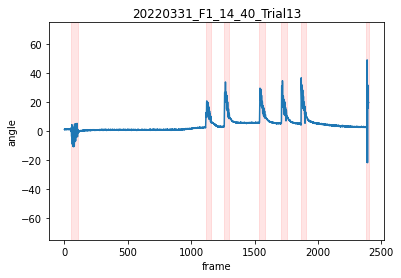

42
42


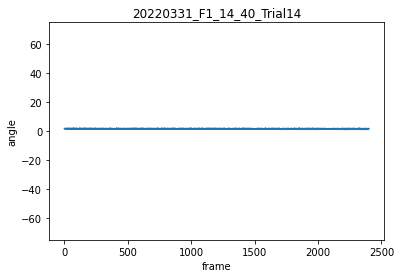

43
43
531.0


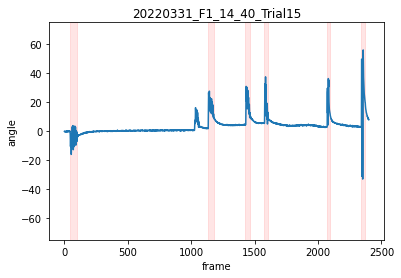

43
43


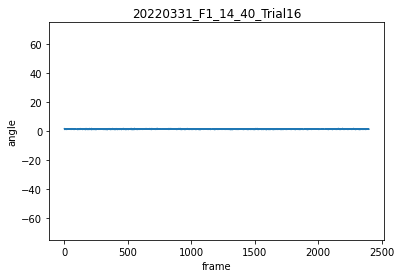

44
44
544.0


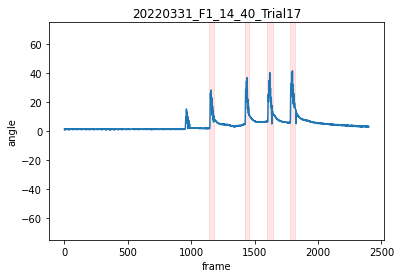

44
44


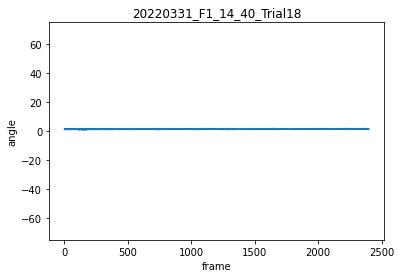

45
45
189.0


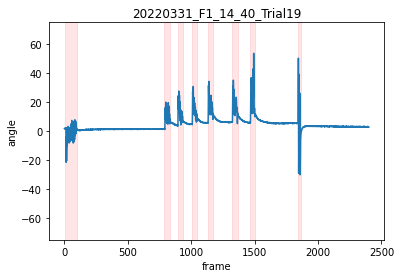

45
45


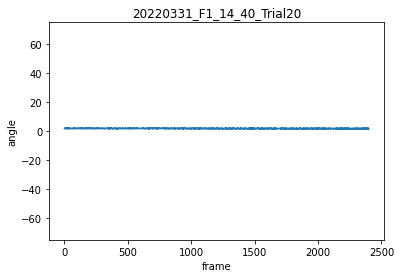

46
46
303.0


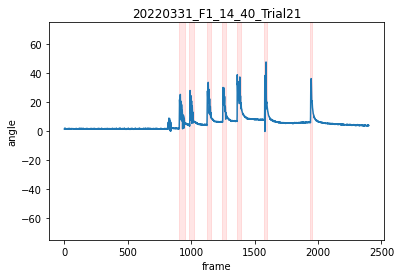

46
46


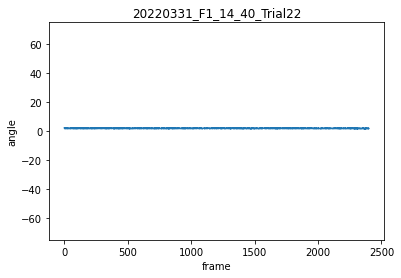

47
47
324.0


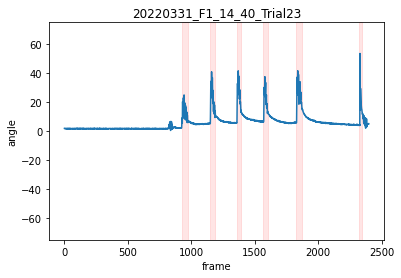

47
47


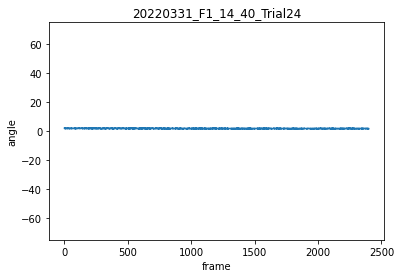

48
48
235.0


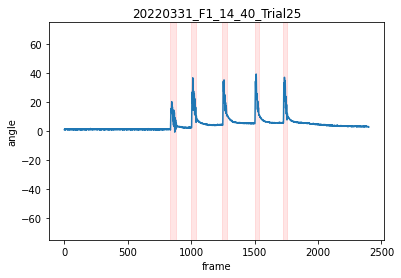

48
48


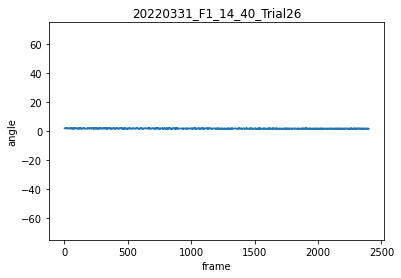

49
49
319.0


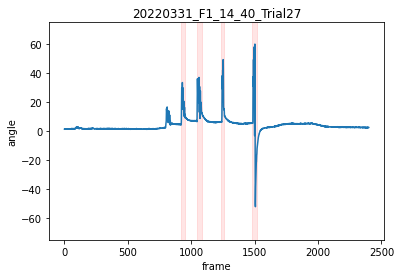

49
49


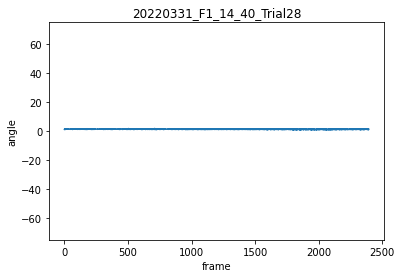

50
50
121.0


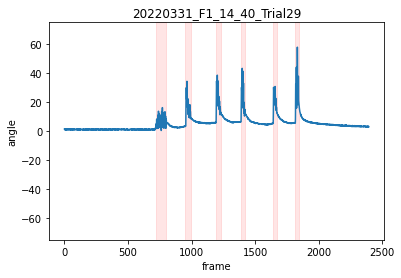

50
50


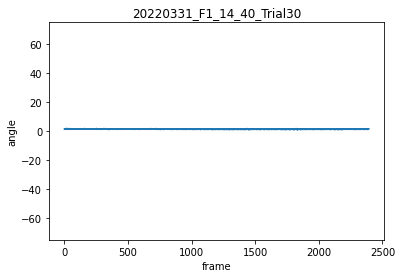

51
51
381.0


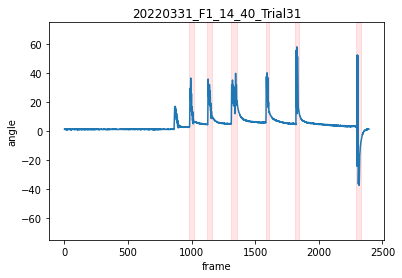

51
51


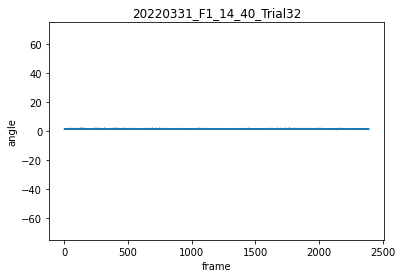

52
52
279.0


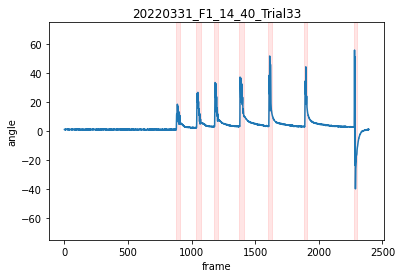

52
52


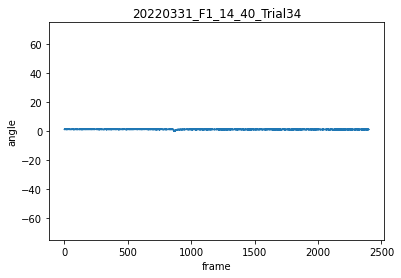

53
53
373.0


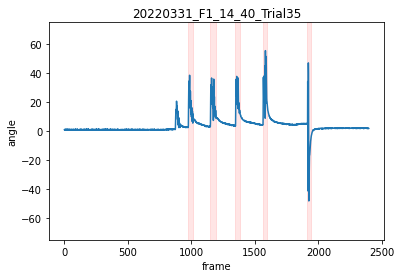

53
53


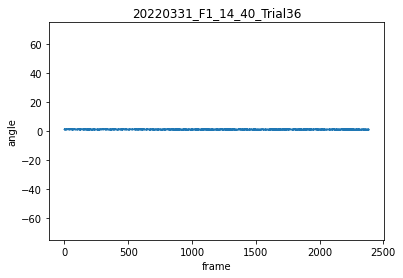

54
54
167.0


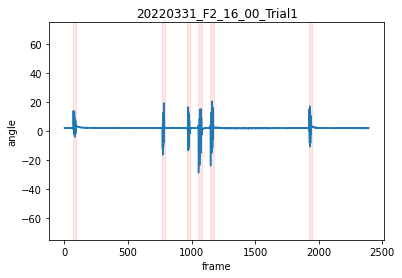

54
54


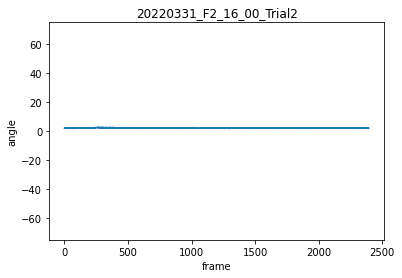

55
55
883.0


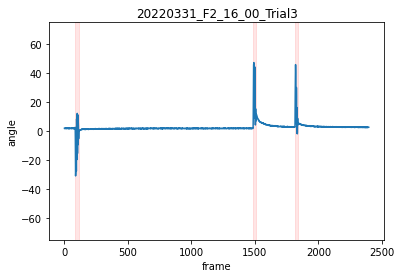

55
55
117.0


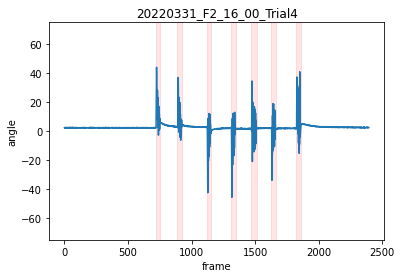

56
56
939.0


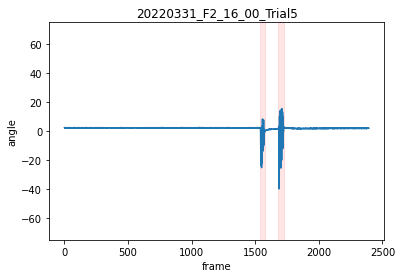

56
56


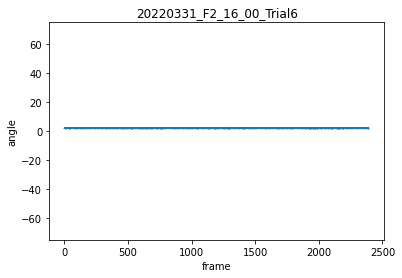

57
57
227.0


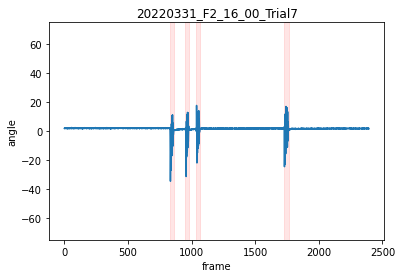

57
57


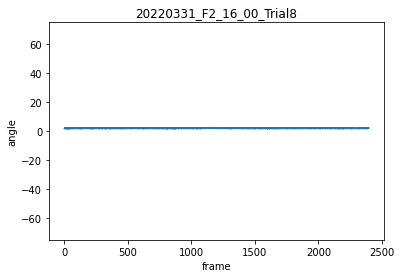

58
58


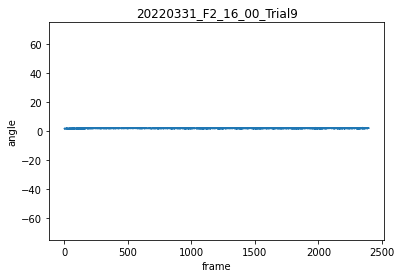

58
58


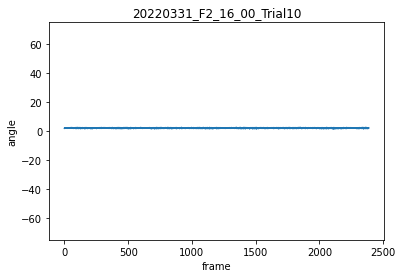

59
59
194.0


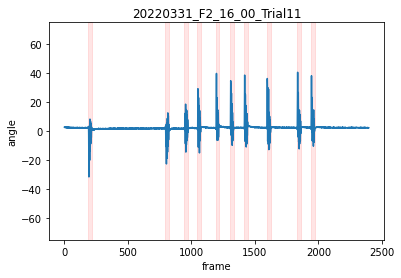

59
59


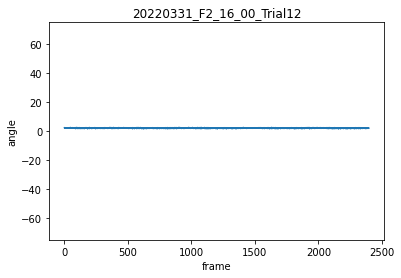

60
60


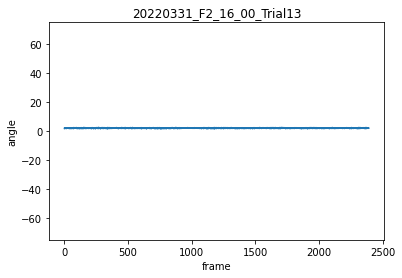

60
60


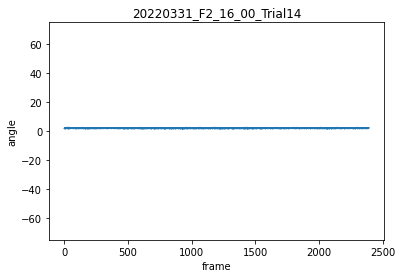

61
61
363.0


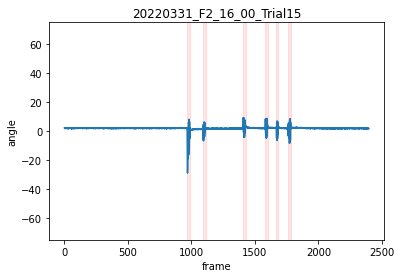

61
61
249.0


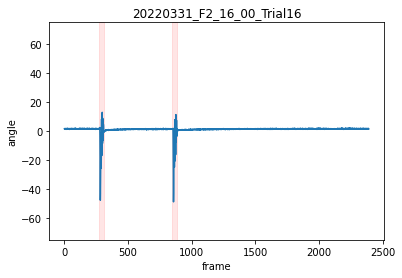

62
62
580.0


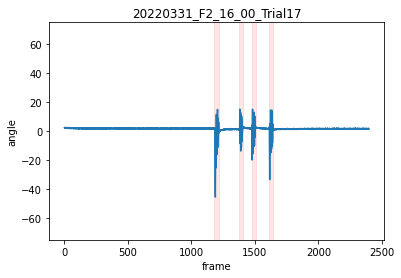

62
62


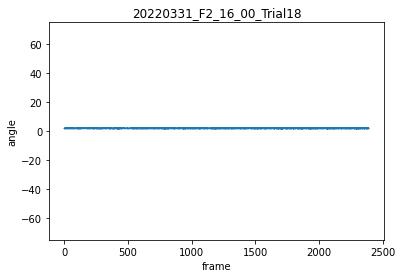

63
63
419.0


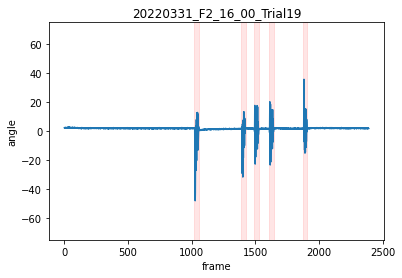

63
63
690.0


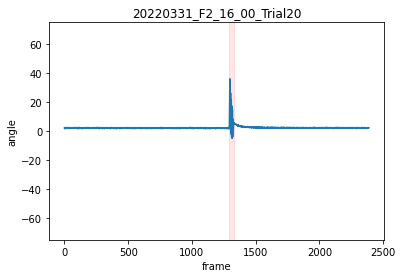

64
64
236.0


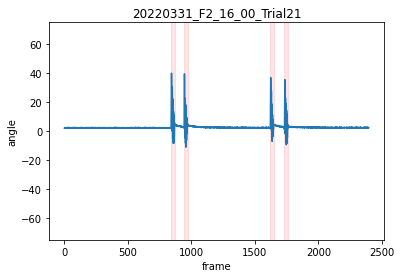

64
64


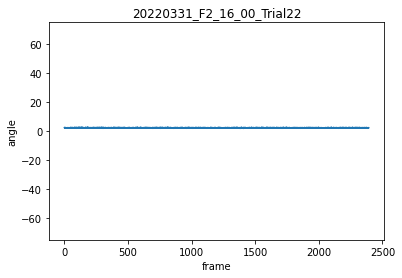

65
65
522.0


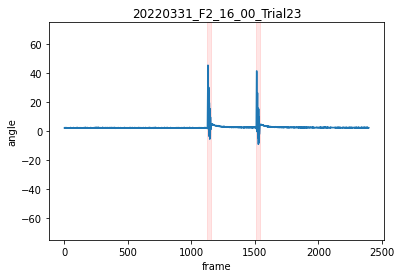

65
65


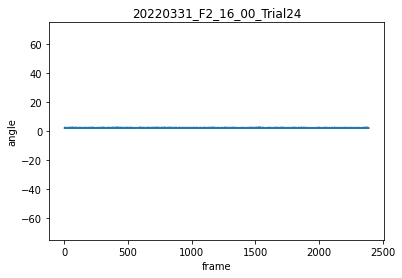

66
66
257.0


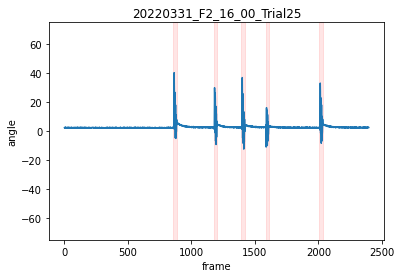

66
66
32.0


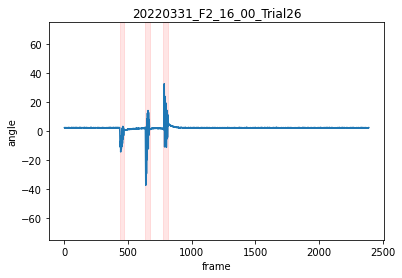

67
67
1200.0


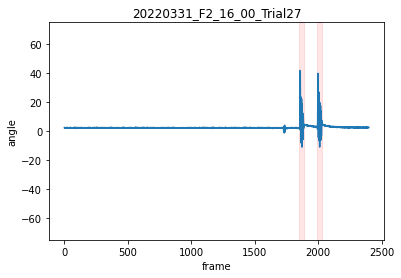

67
67


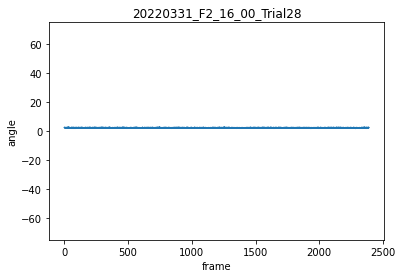

68
68


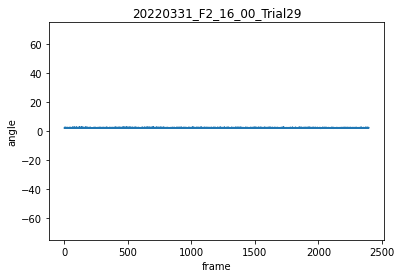

68
68


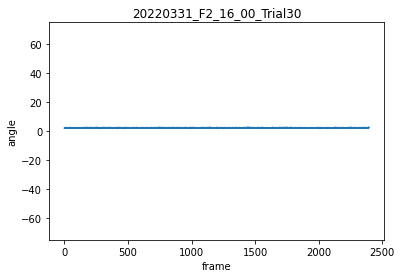

69
69


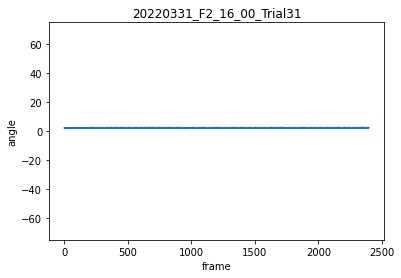

69
69


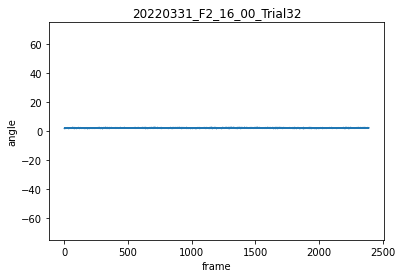

70
70


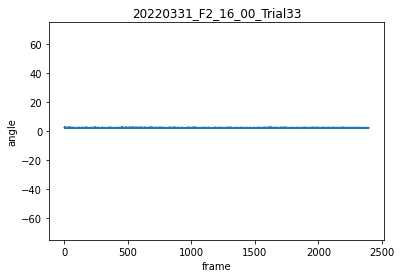

70
70
184.0


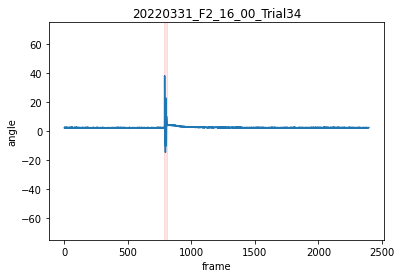

71
71


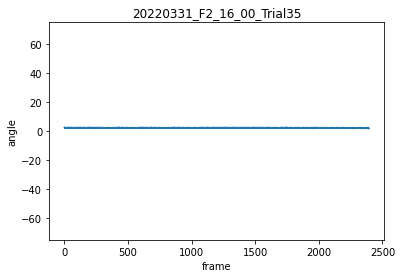

71
71


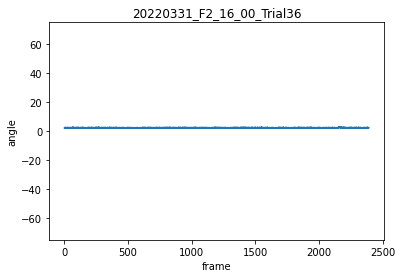

72
72
469.0


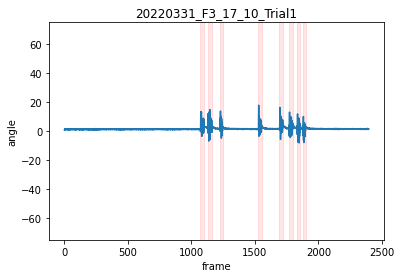

72
72


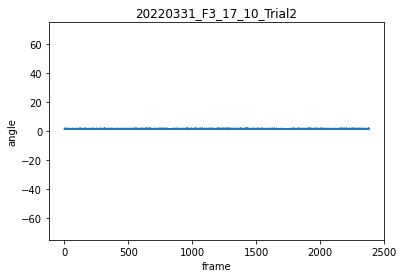

73
73


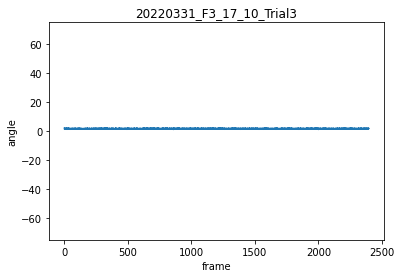

73
73


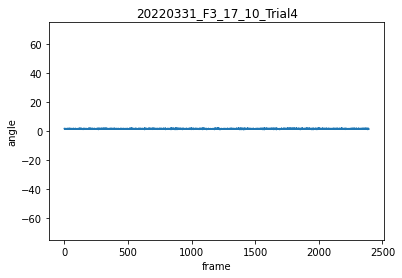

74
74
223.0


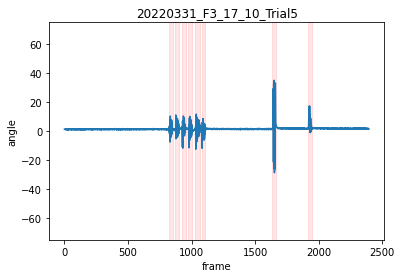

74
74


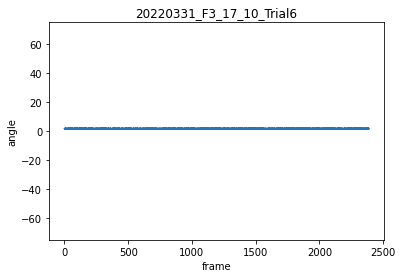

75
75
460.0


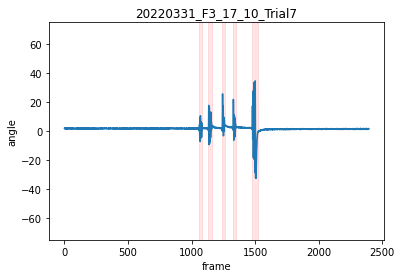

75
75


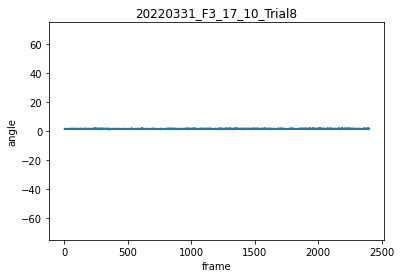

76
76
960.0


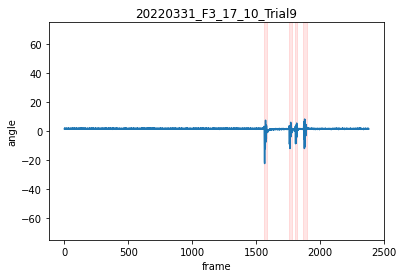

76
76


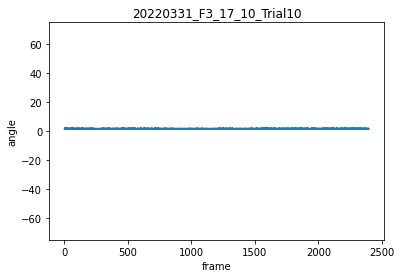

77
77
205.0


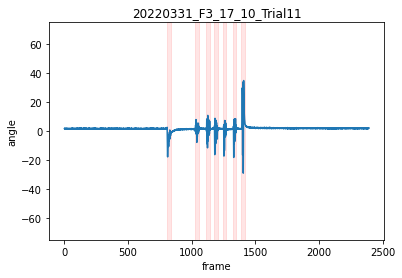

77
77


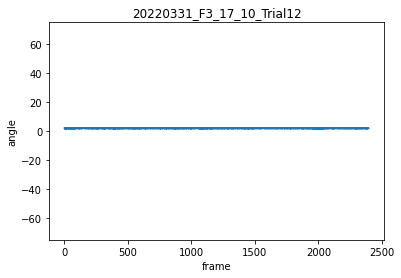

78
78
149.0


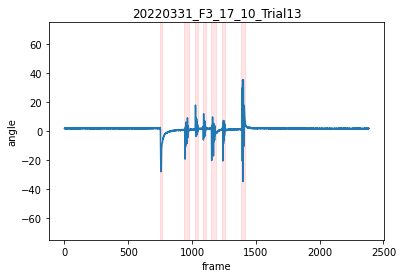

78
78


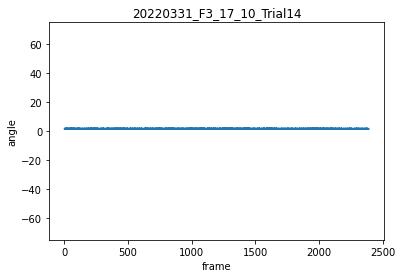

79
79
381.0


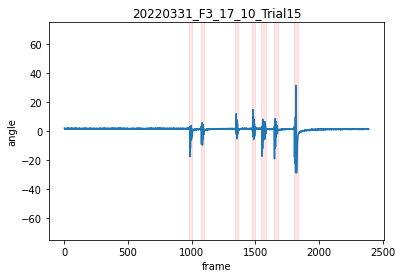

79
79


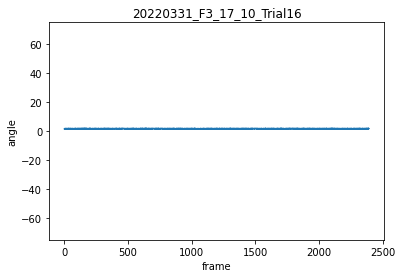

80
80
346.0


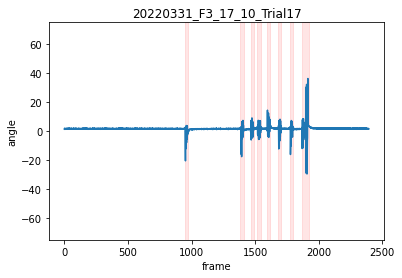

80
80


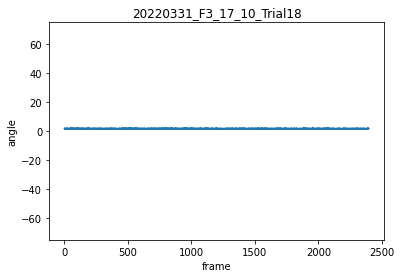

81
81
463.0


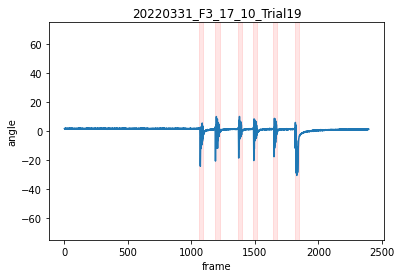

81
81


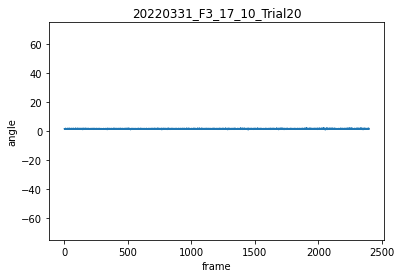

82
82
534.0


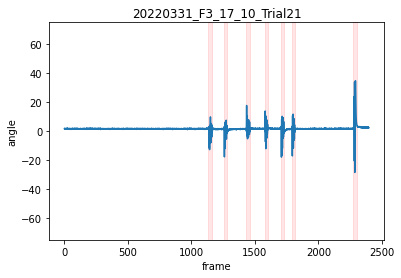

82
82


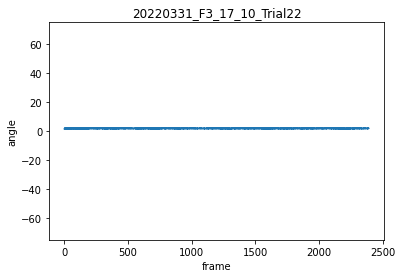

83
83
799.0


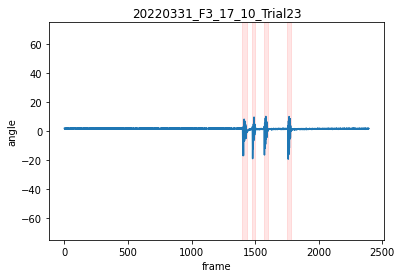

83
83


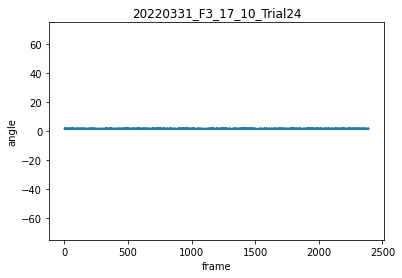

84
84
524.0


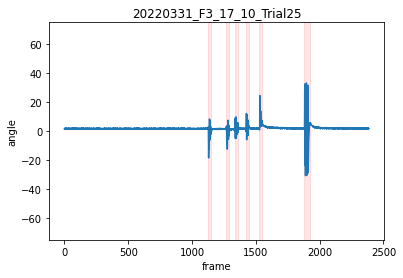

84
84


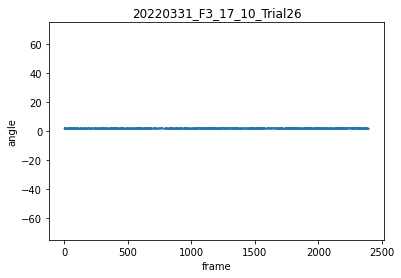

85
85
726.0


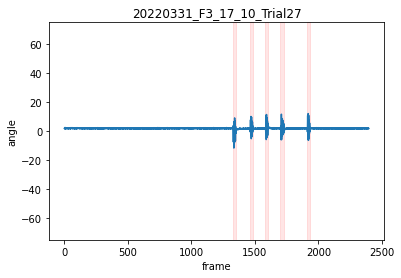

85
85


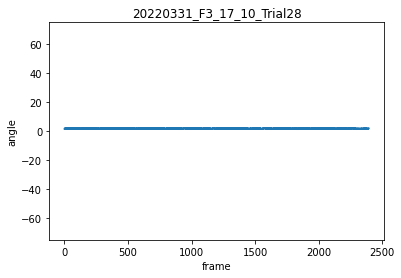

86
86
379.0


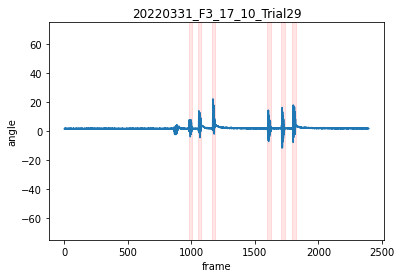

86
86


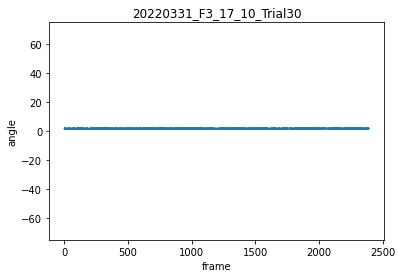

87
87
340.0


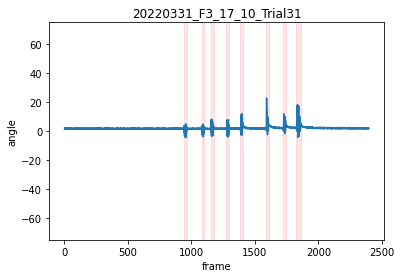

87
87


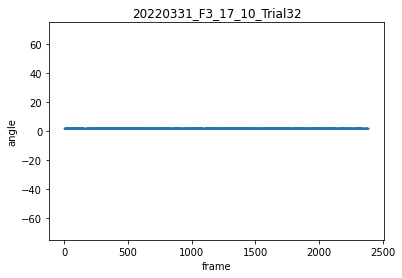

88
88
232.0


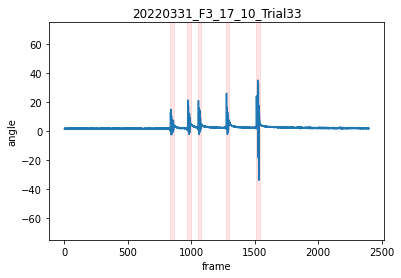

88
88


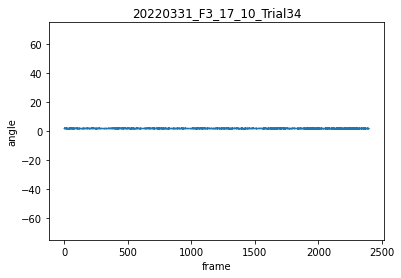

89
89
229.0


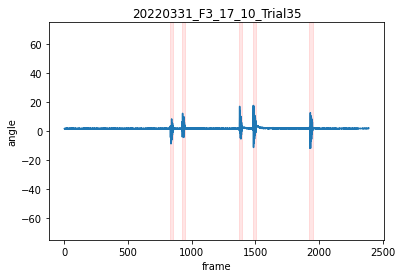

89
89


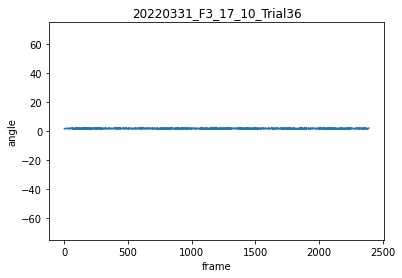

90
90
33.0


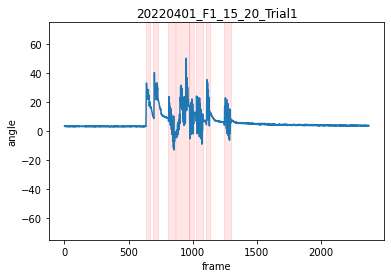

90
90
756.0


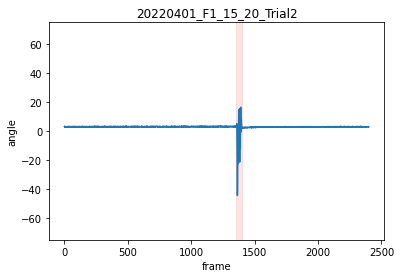

91
91
476.0


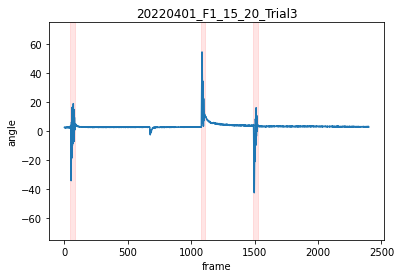

91
91
1200.0


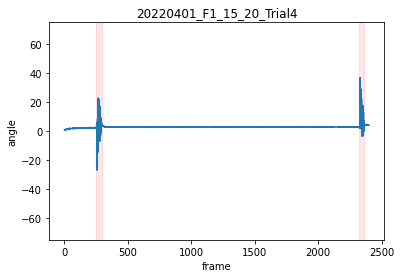

92
92
371.0


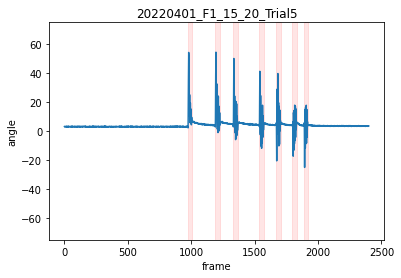

92
92


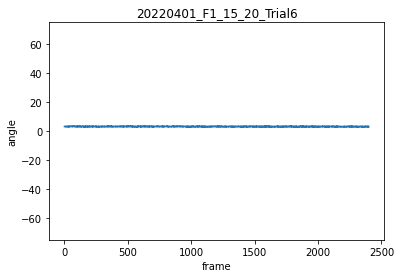

93
93
69.0


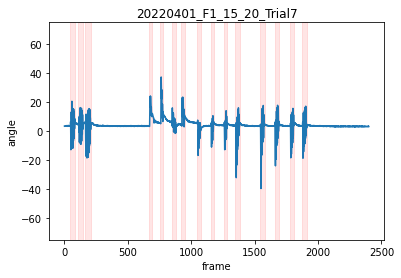

93
93
1200.0


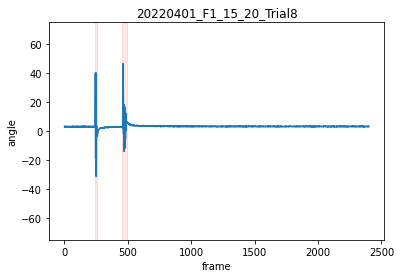

94
94
554.0


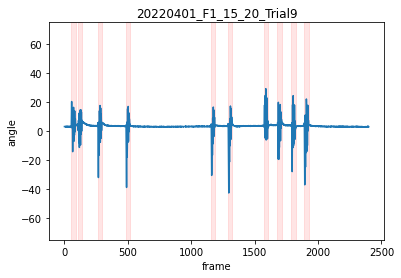

94
94


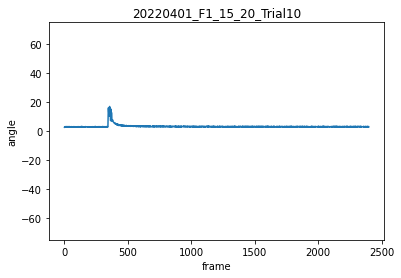

95
95
227.0


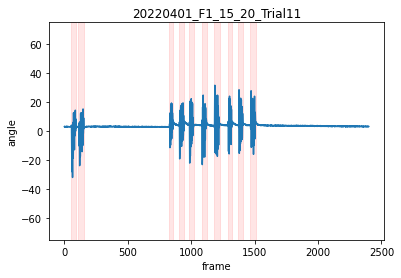

95
95


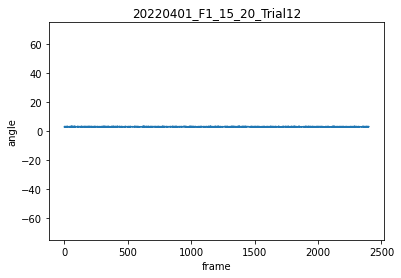

96
96
346.0


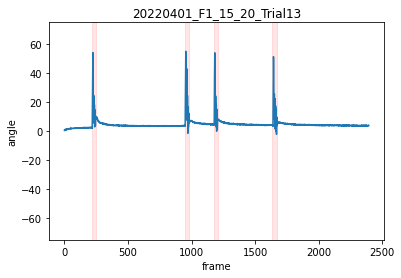

96
96


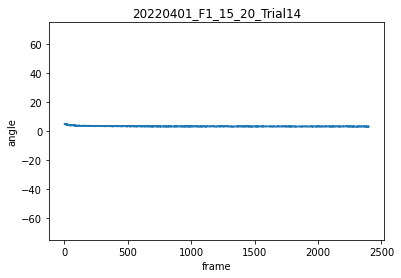

97
97
130.0


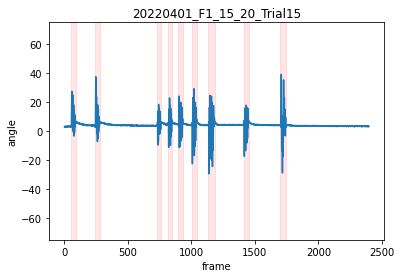

97
97


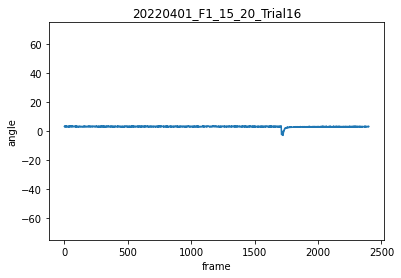

98
98
163.0


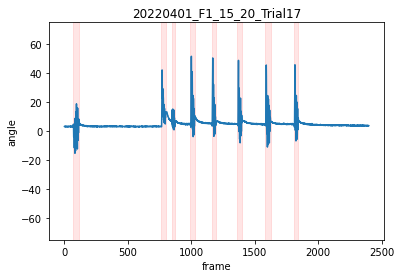

98
98


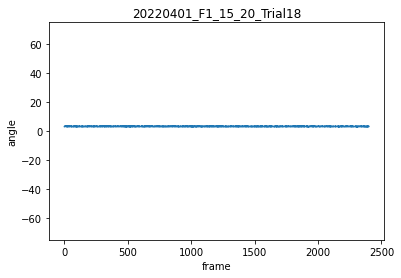

99
99
458.0


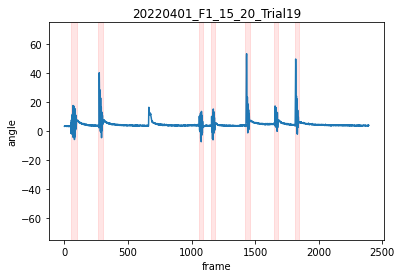

99
99


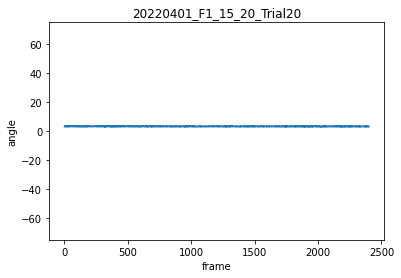

100
100
197.0


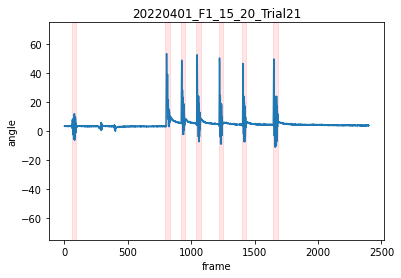

100
100


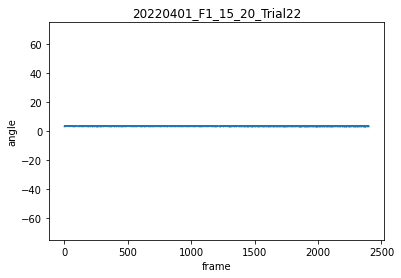

101
101
546.0


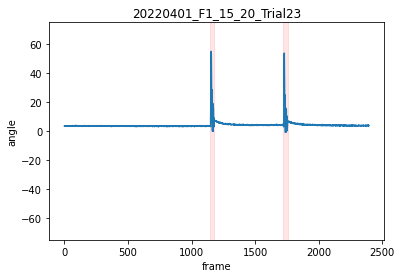

101
101


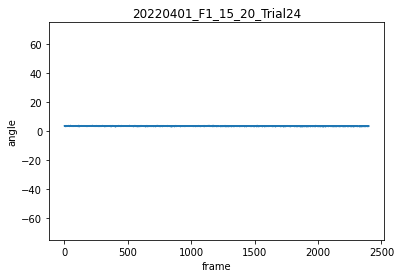

102
102
1200.0


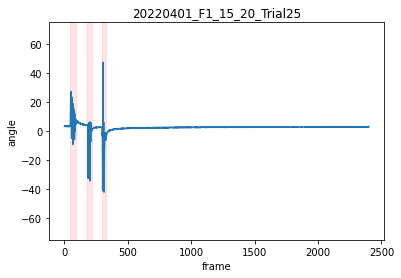

102
102


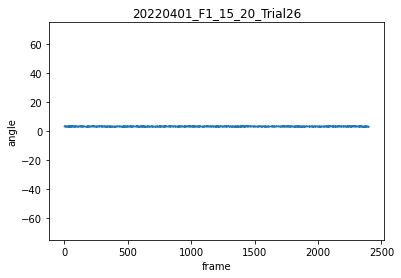

103
103
61.0


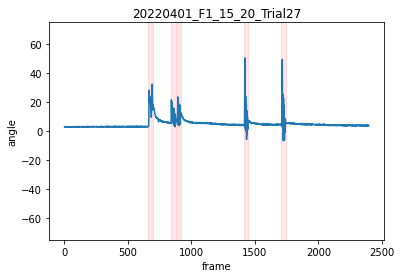

103
103
1200.0


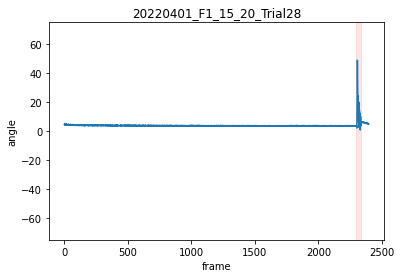

104
104


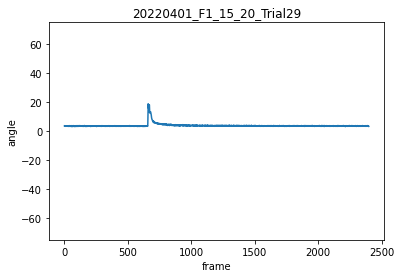

104
104


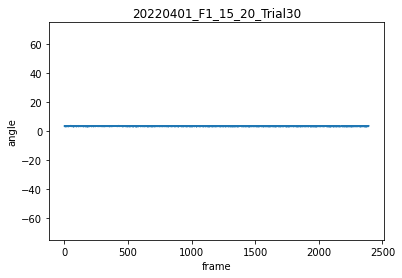

105
105
254.0


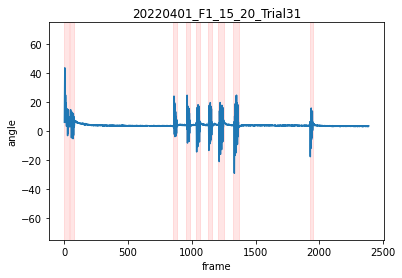

105
105


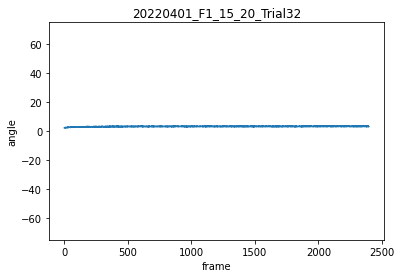

106
106
56.0


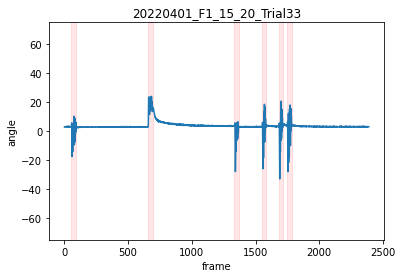

106
106
1200.0


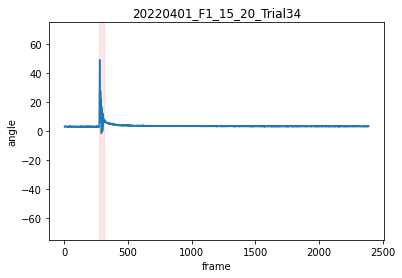

107
107
54.0


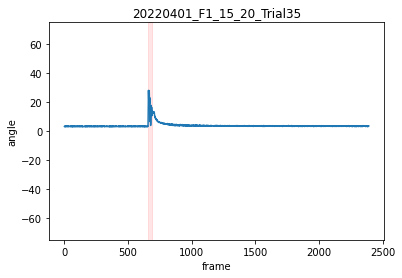

107
107


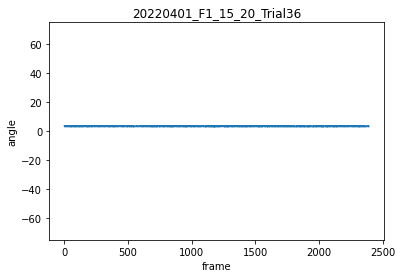

108
108
272.0


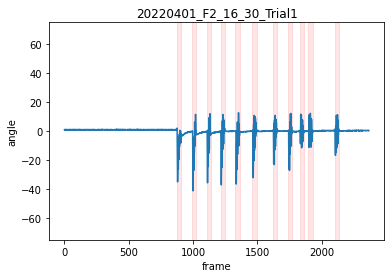

108
108
412.0


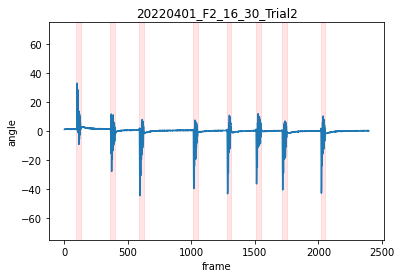

109
109
427.0


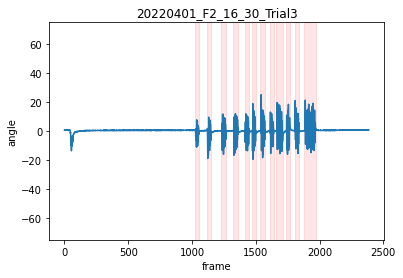

109
109
1200.0


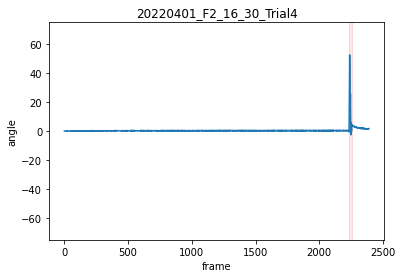

110
110
424.0


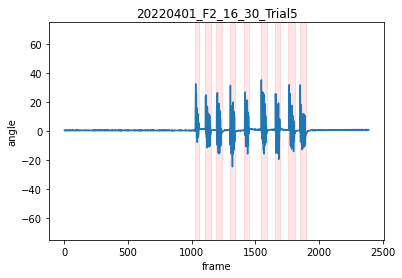

110
110
558.0


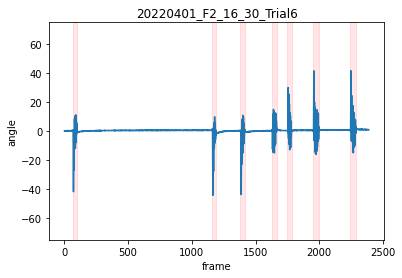

111
111
456.0


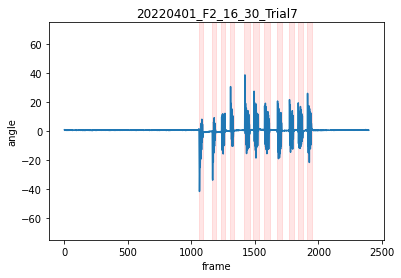

111
111


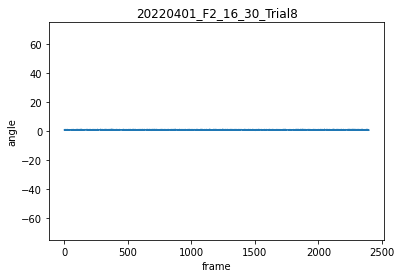

112
112
128.0


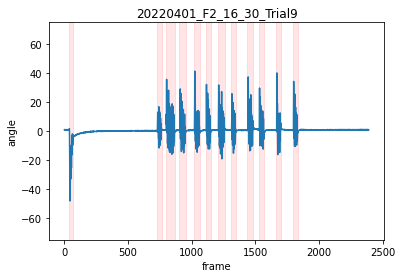

112
112
905.0


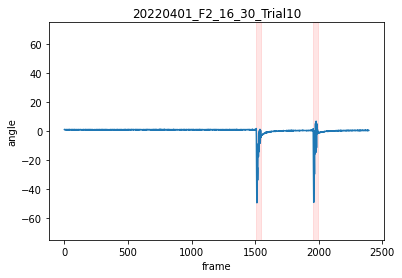

113
113
328.0


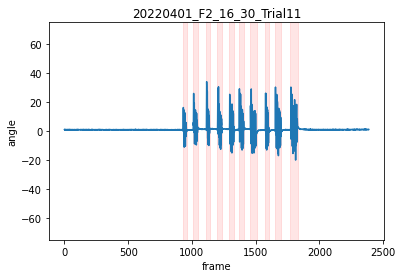

113
113
1200.0


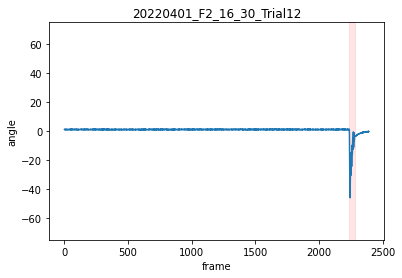

114
114
133.0


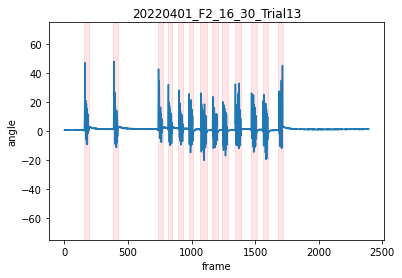

114
114


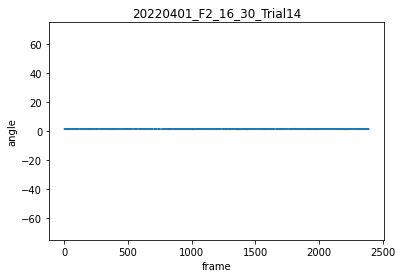

115
115
342.0


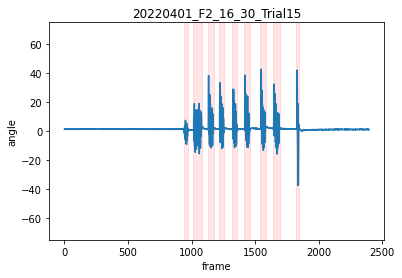

115
115


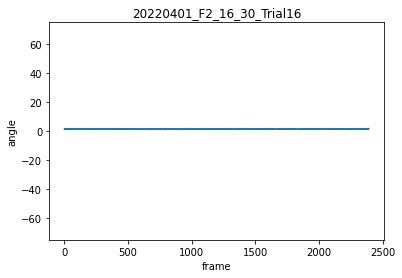

116
116
325.0


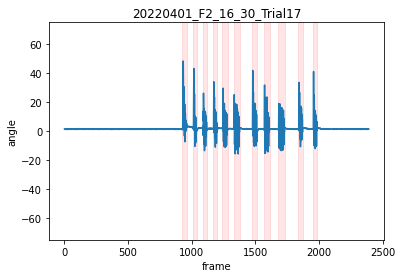

116
116
750.0


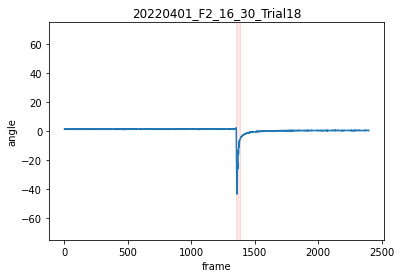

117
117
539.0


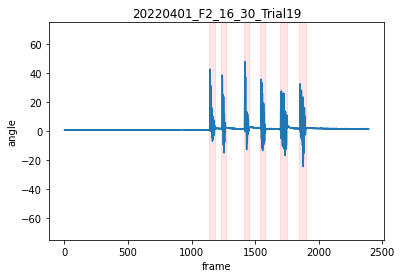

117
117


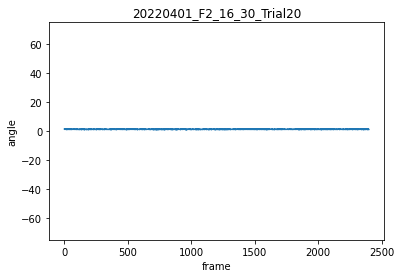

118
118
420.0


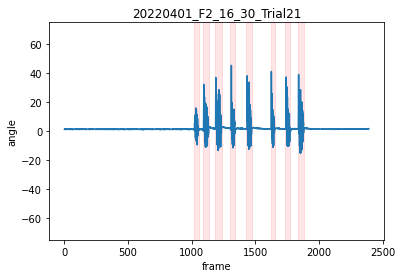

118
118


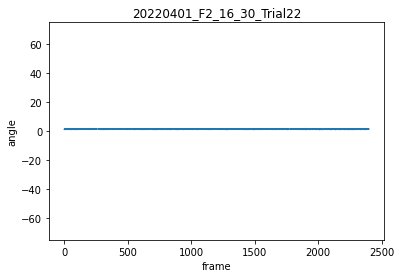

119
119
204.0


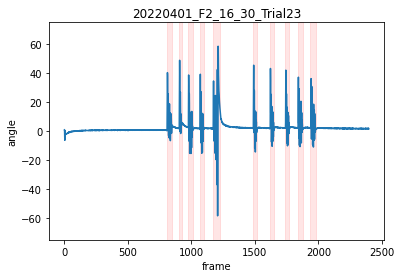

119
119
21.0


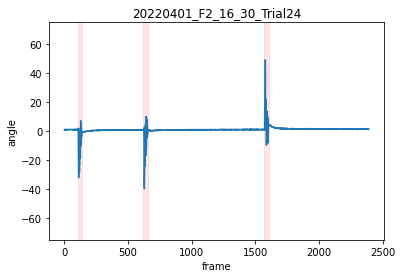

120
120
496.0


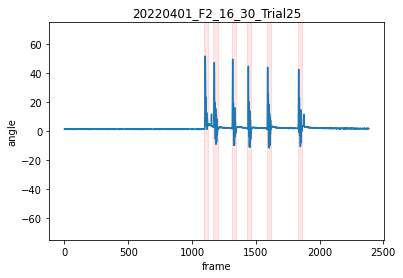

120
120


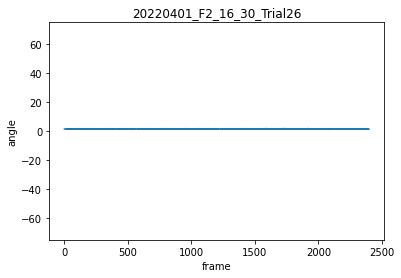

121
121
1061.0


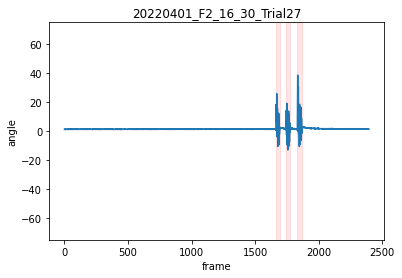

121
121


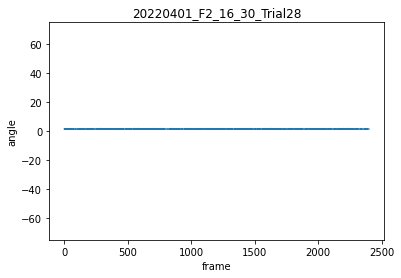

122
122
471.0


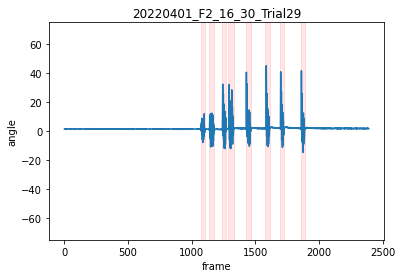

122
122


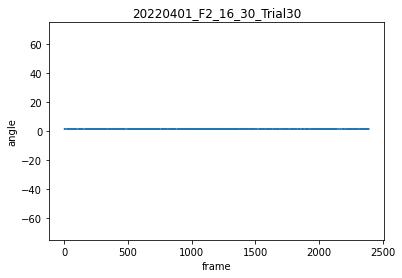

123
123
316.0


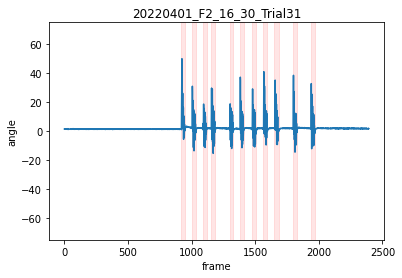

123
123


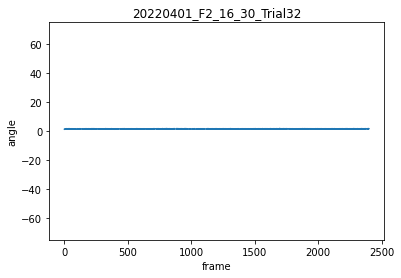

124
124
390.0


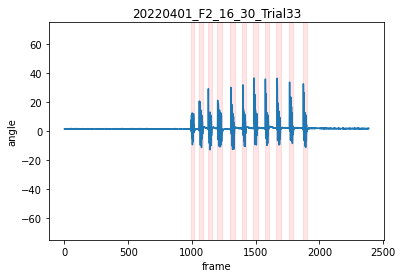

124
124


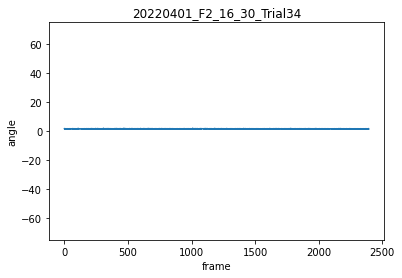

125
125
148.0


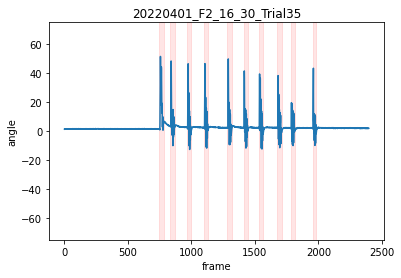

125
125


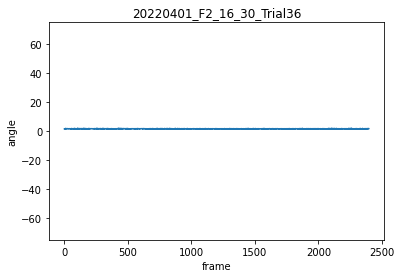

126
126
585.0


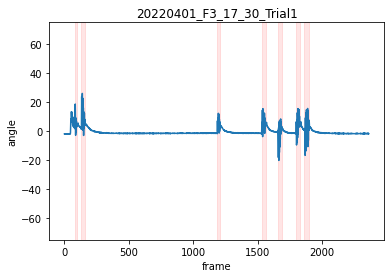

126
126


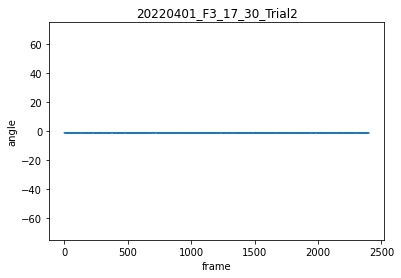

127
127
758.0


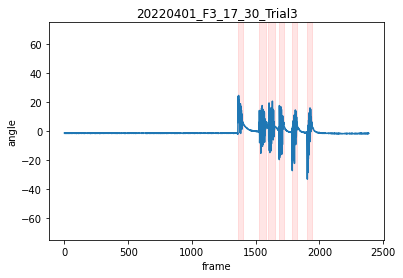

127
127


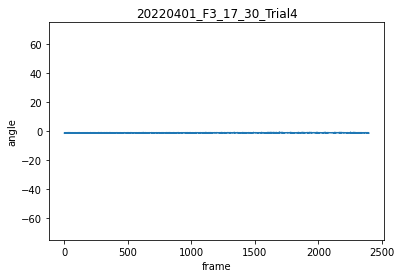

128
128
437.0


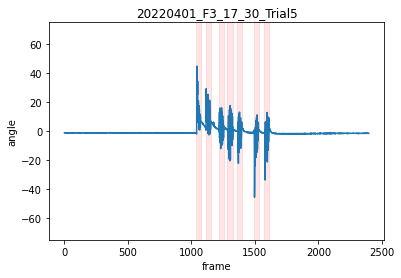

128
128


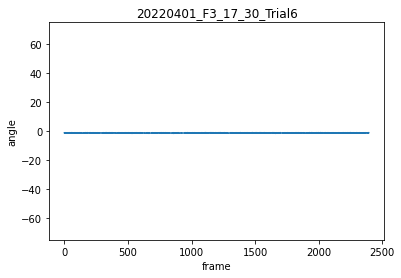

129
129


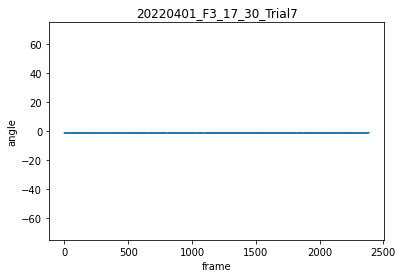

129
129


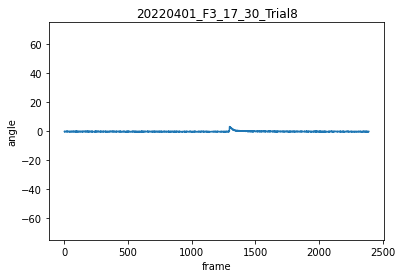

130
130
770.0


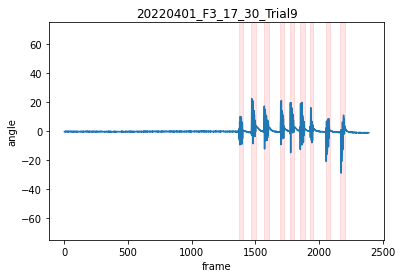

130
130


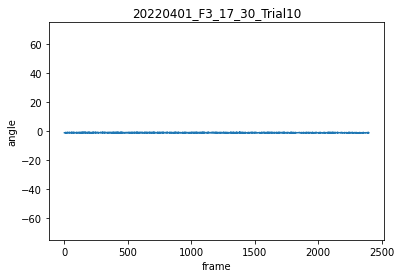

131
131
308.0


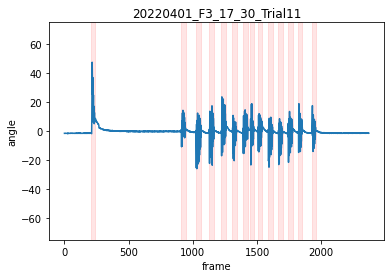

131
131


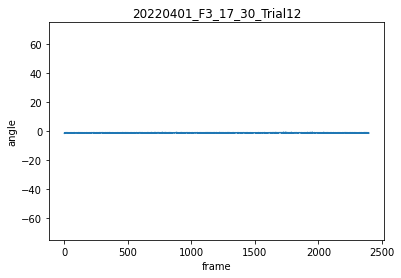

132
132
254.0


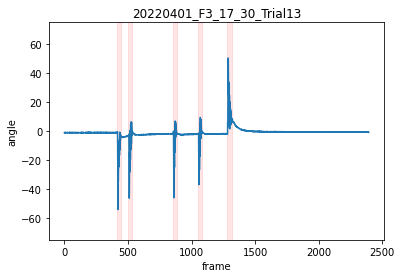

132
132


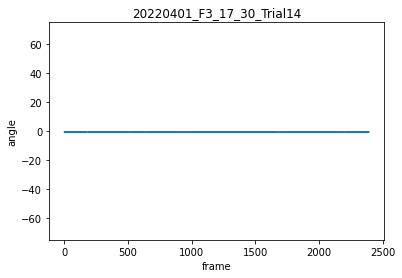

133
133
309.0


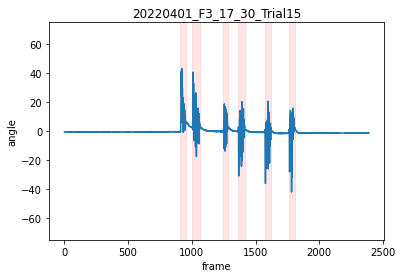

133
133


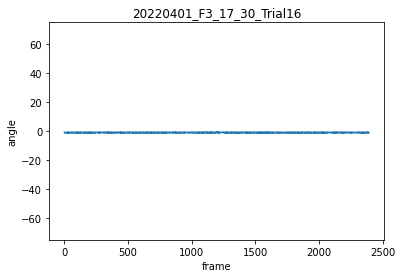

134
134
598.0


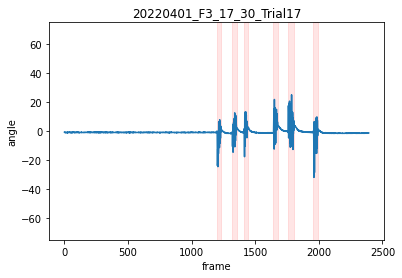

134
134


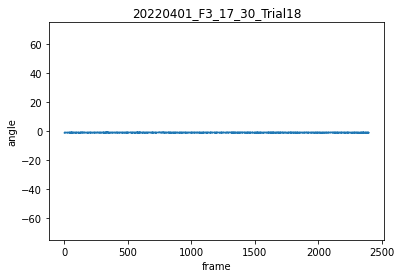

135
135
406.0


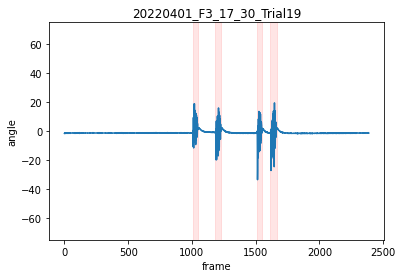

135
135


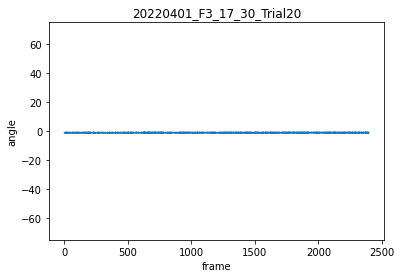

136
136
379.0


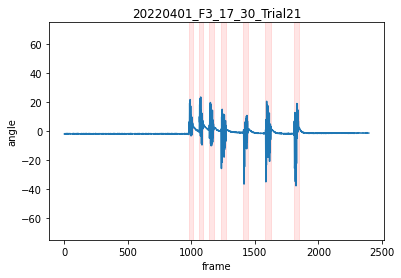

136
136
1200.0


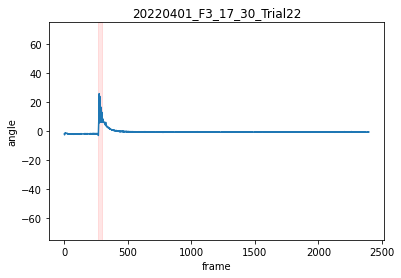

137
137
628.0


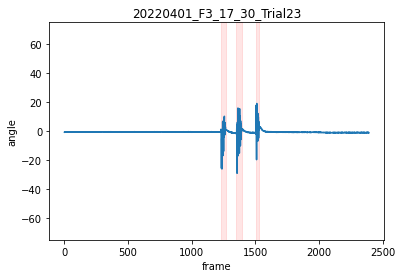

137
137
1154.0


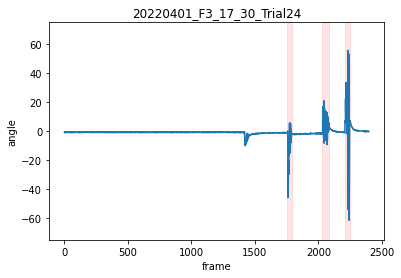

138
138


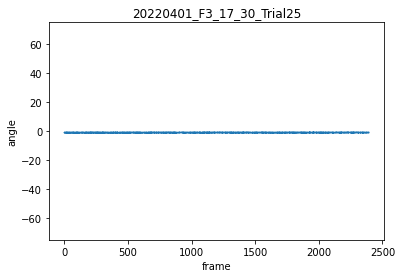

138
138


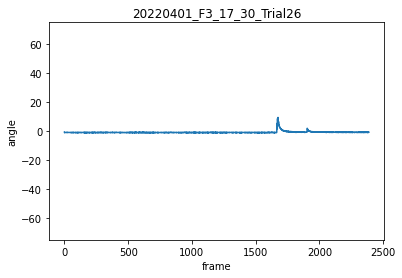

139
139


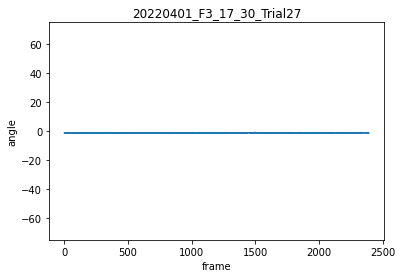

139
139


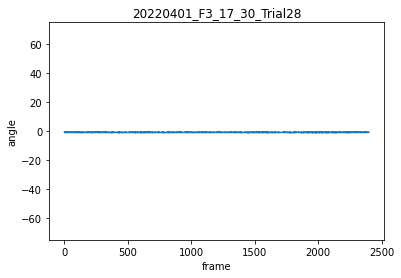

140
140
998.0


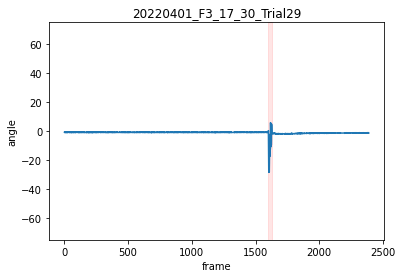

140
140


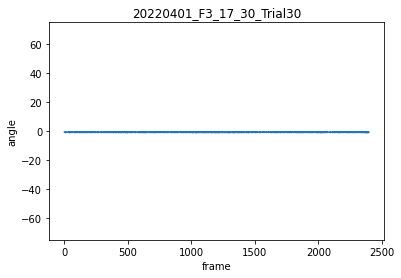

141
141


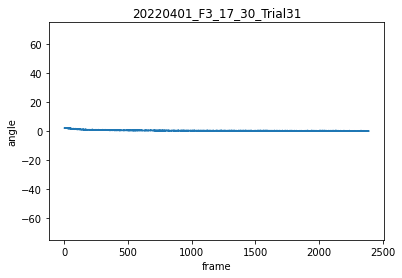

141
141


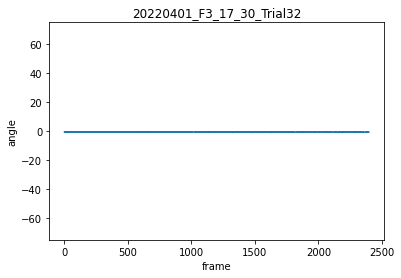

142
142


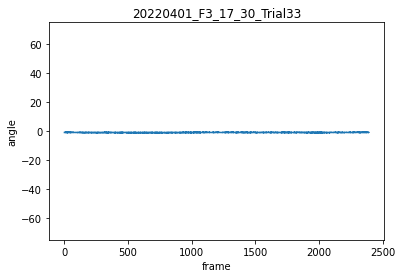

142
142


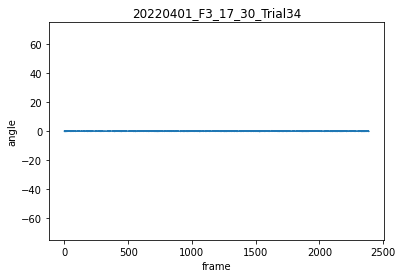

143
143


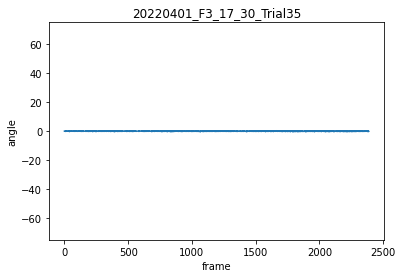

143
143
1200.0


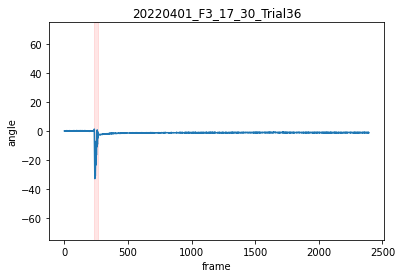

144
144
525.0


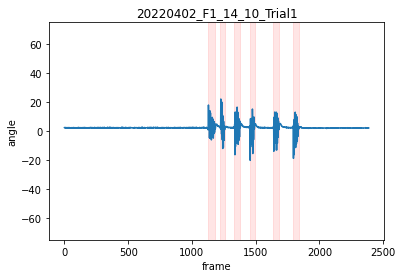

144
144


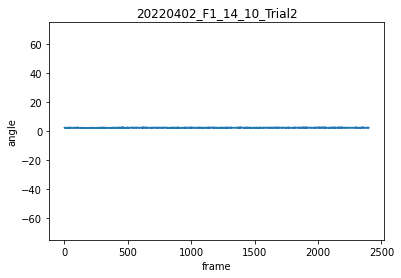

145
145
218.0


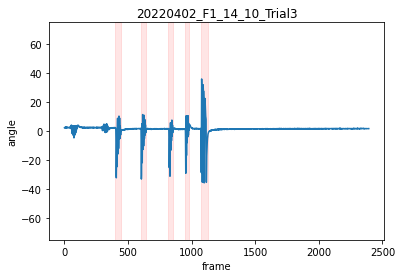

145
145


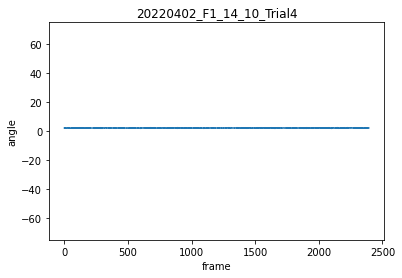

146
146
730.0


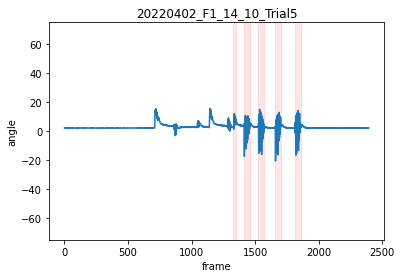

146
146


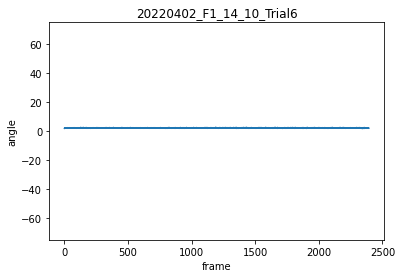

147
147
592.0


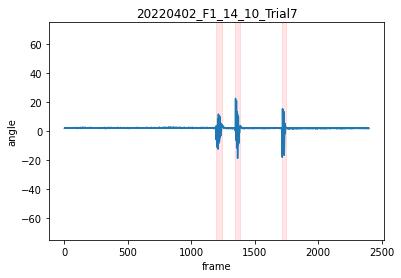

147
147


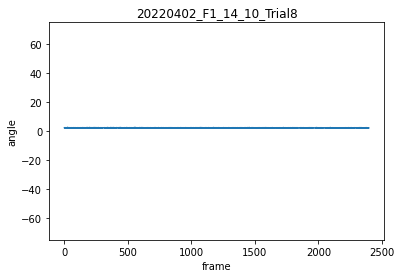

148
148
1200.0


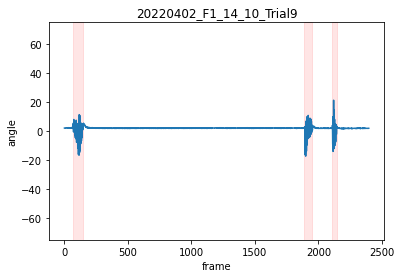

148
148


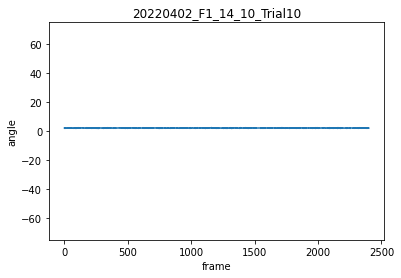

149
149
276.0


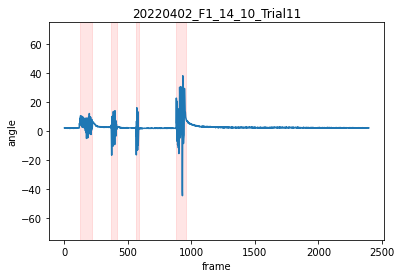

149
149


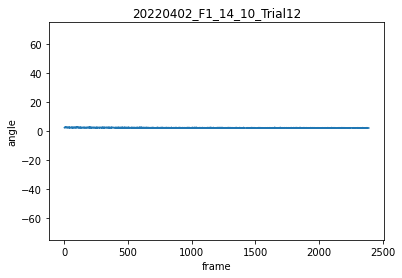

150
150


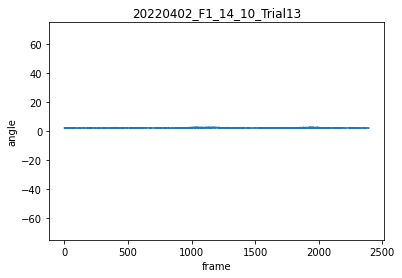

150
150


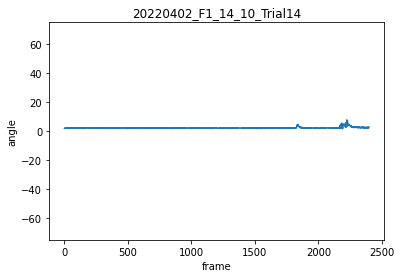

151
151
654.0


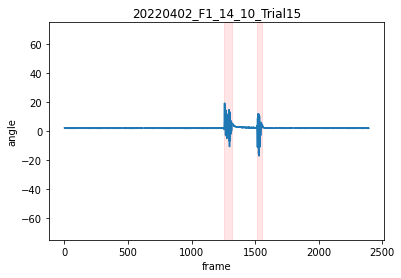

151
151


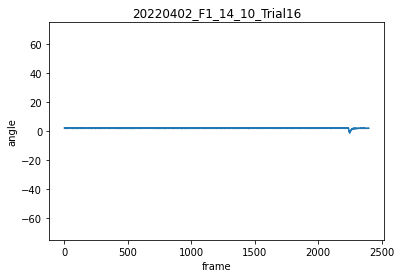

152
152
657.0


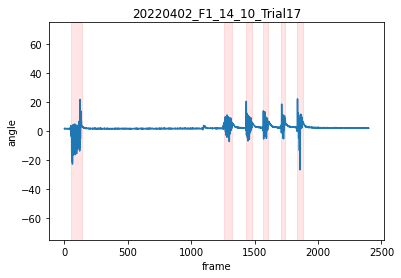

152
152


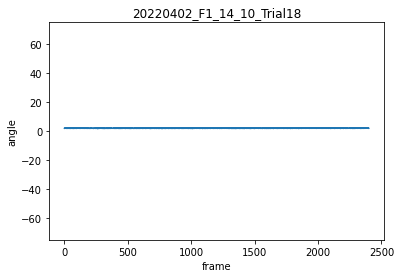

153
153
115.0


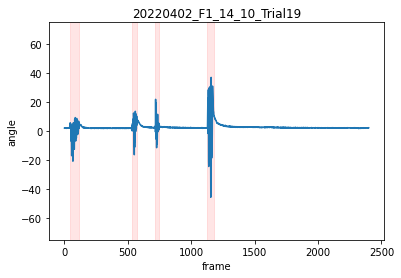

153
153


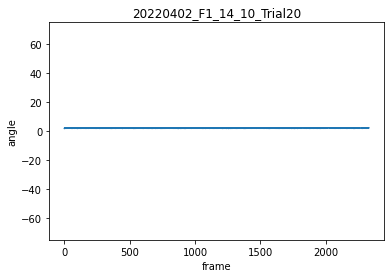

154
154
573.0


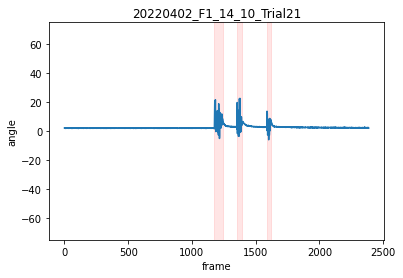

154
154


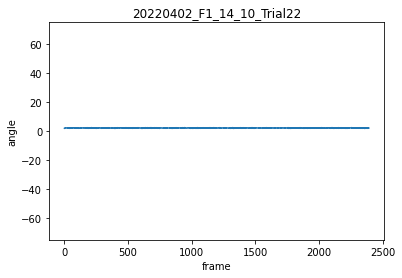

155
155
219.0


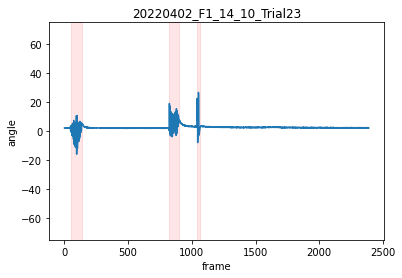

155
155


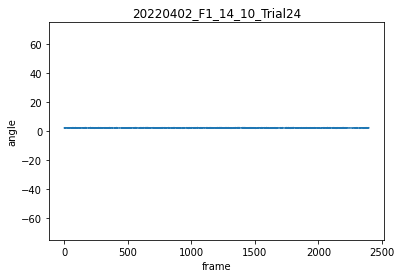

156
156
1041.0


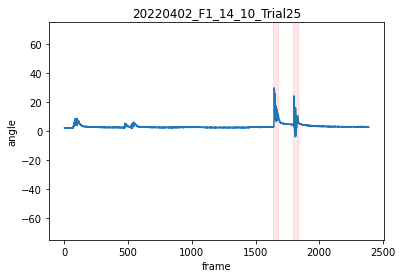

156
156


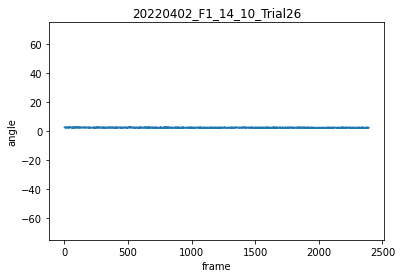

157
157


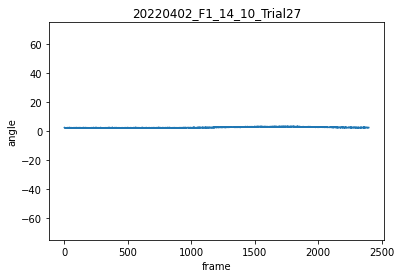

157
157


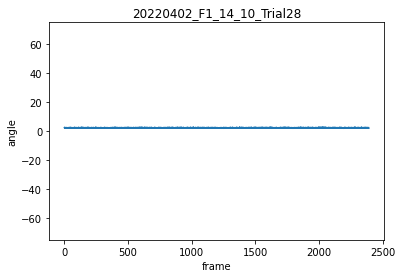

158
158


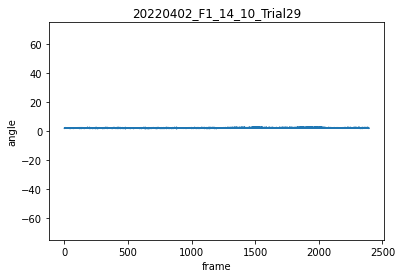

158
158


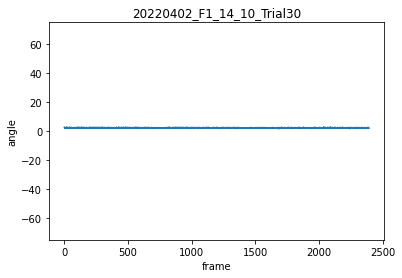

159
159
211.0


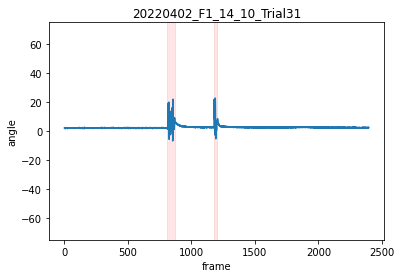

159
159


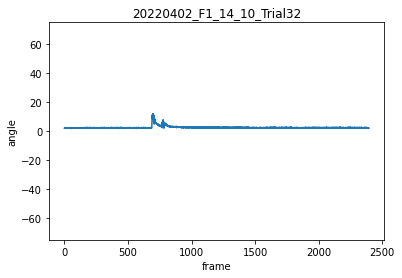

160
160
136.0


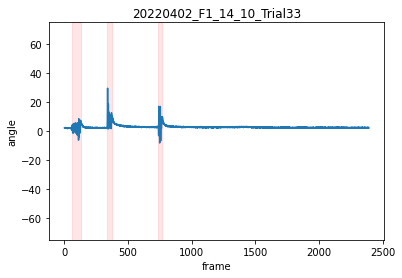

160
160


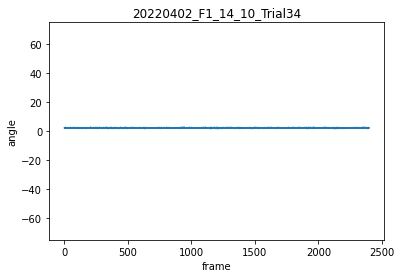

161
161
294.0


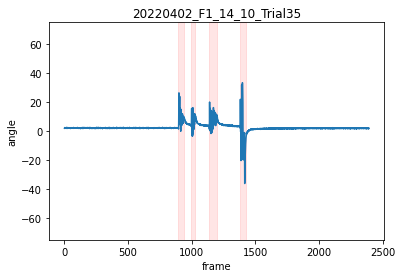

161
161


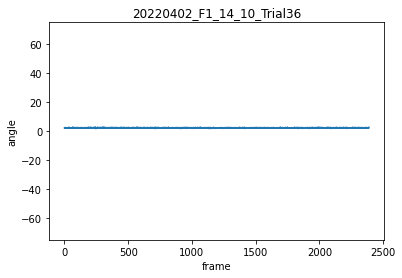

162
162
459.0


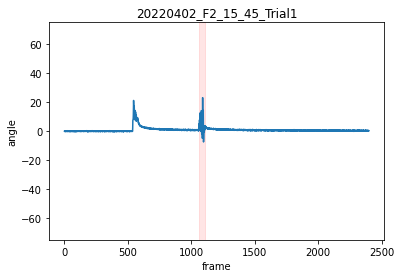

162
162


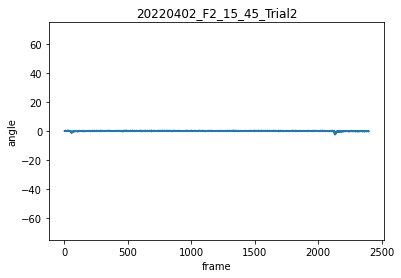

163
163


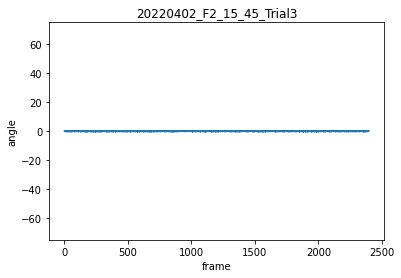

163
163
1197.0


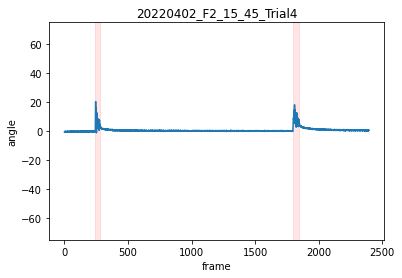

164
164
735.0


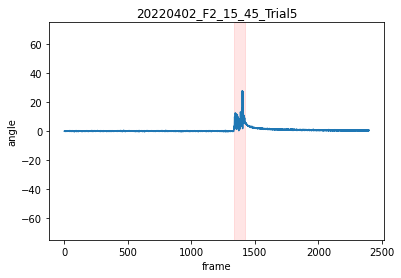

164
164


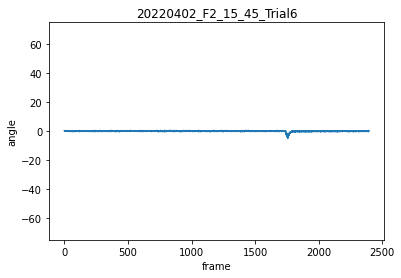

165
165


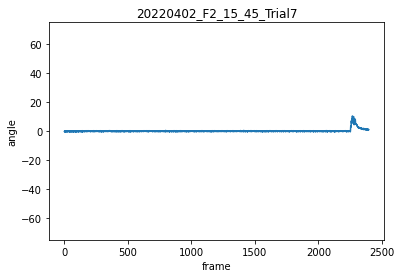

165
165


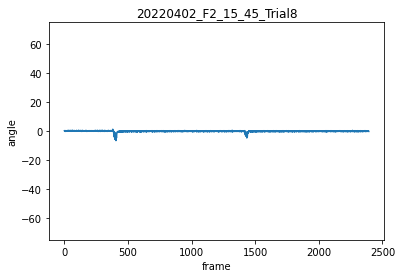

166
166
610.0


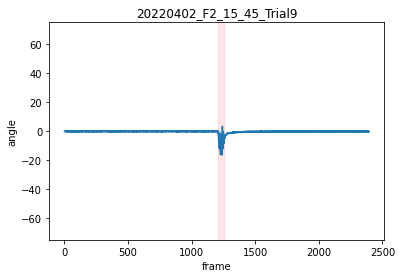

166
166


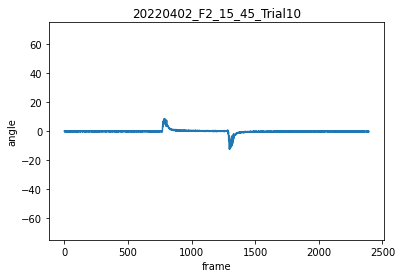

167
167
103.0


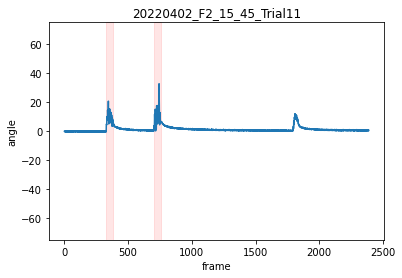

167
167


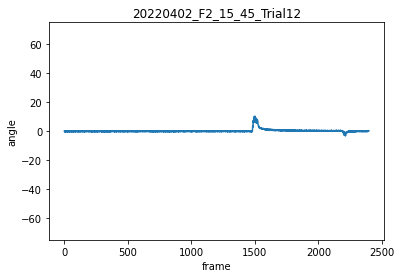

168
168
442.0


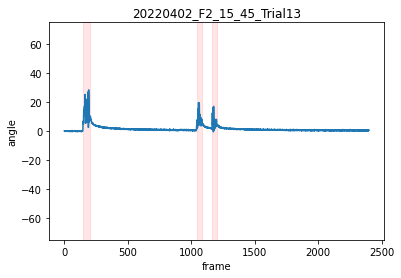

168
168


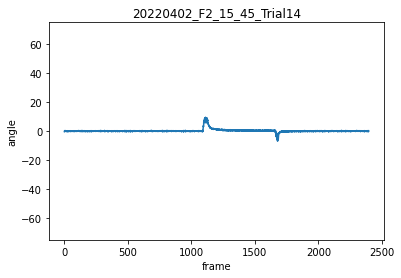

169
169


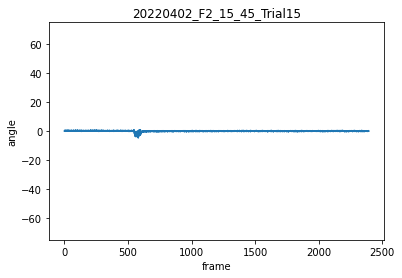

169
169


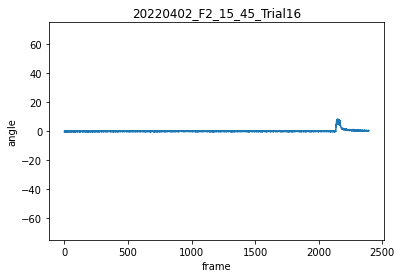

170
170
573.0


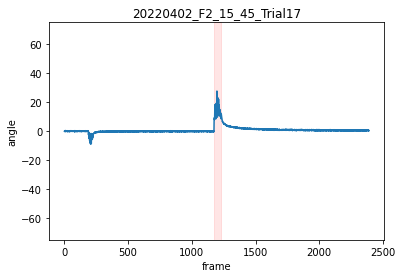

170
170


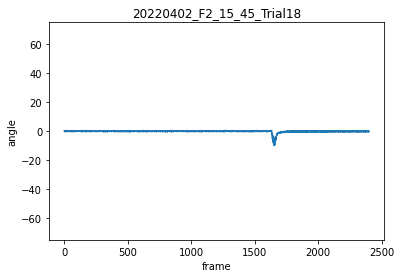

171
171
195.0


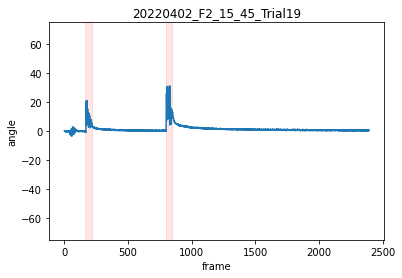

171
171


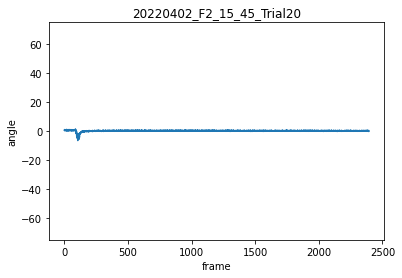

172
172
540.0


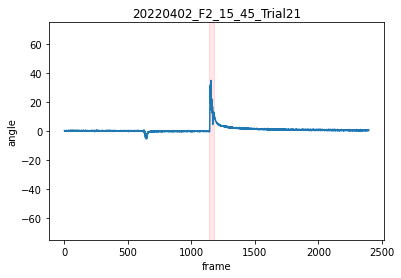

172
172


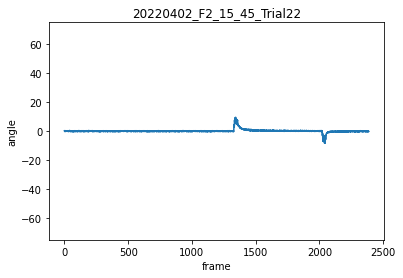

173
173
204.0


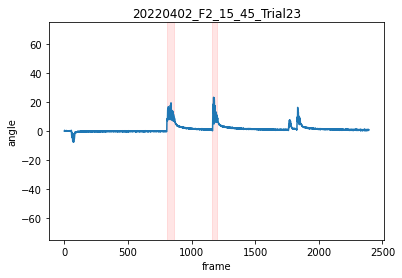

173
173


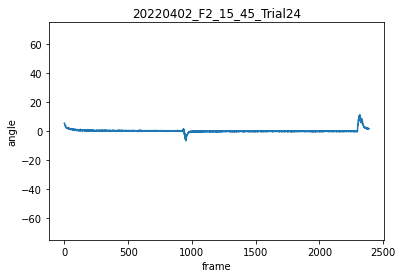

174
174
1084.0


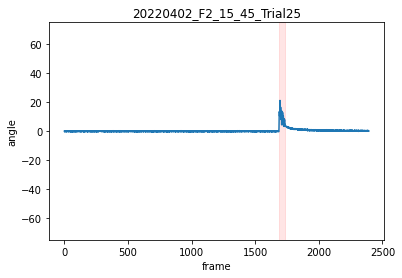

174
174


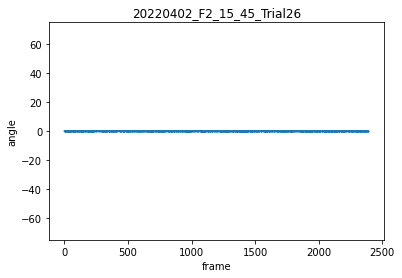

175
175
308.0


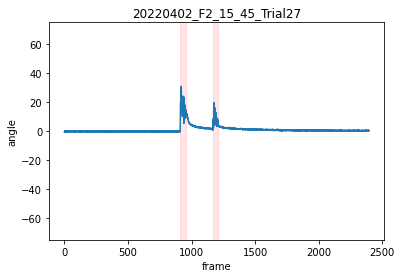

175
175


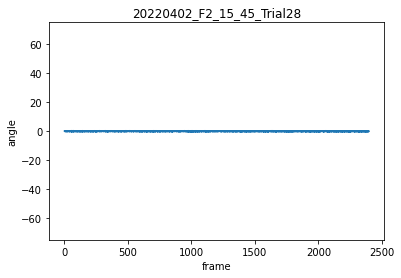

176
176
221.0


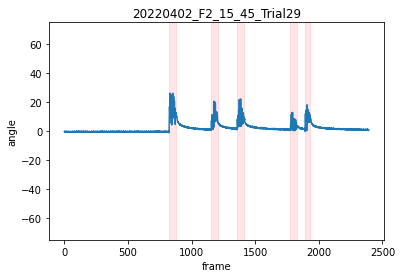

176
176


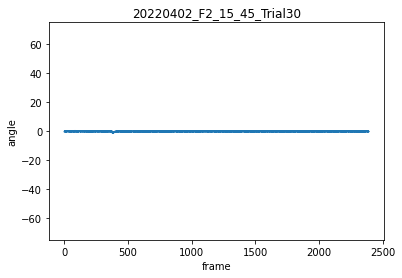

177
177
58.0


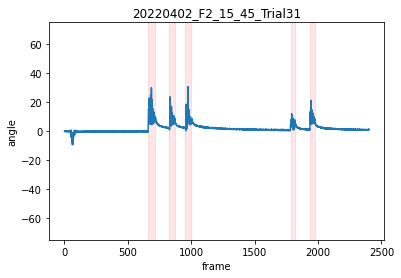

177
177


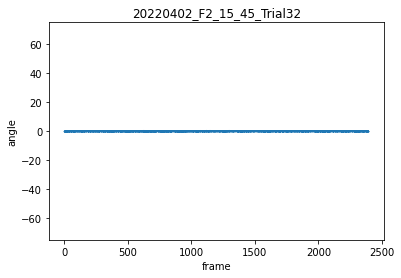

178
178
329.0


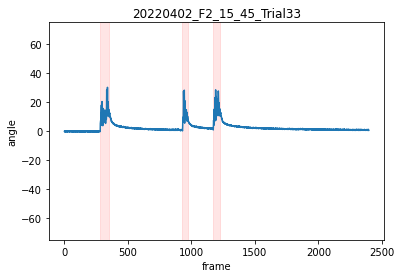

178
178
734.0


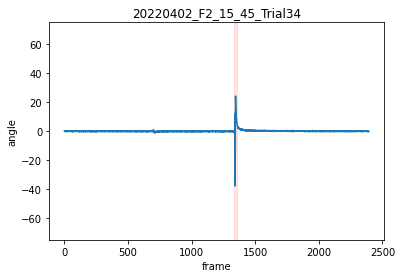

179
179
182.0


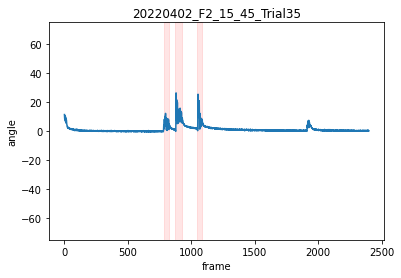

179
179


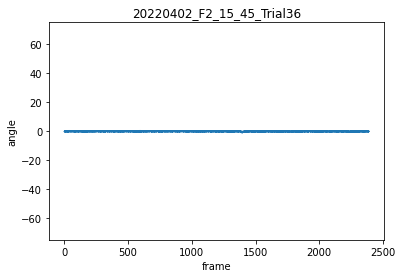

180
180
125.0


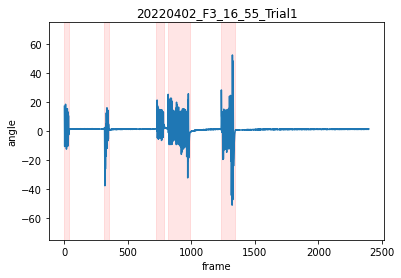

180
180


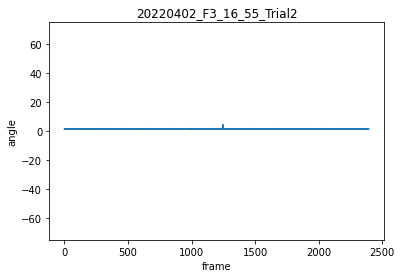

181
181
46.0


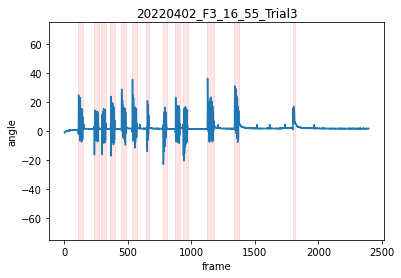

181
181
587.0


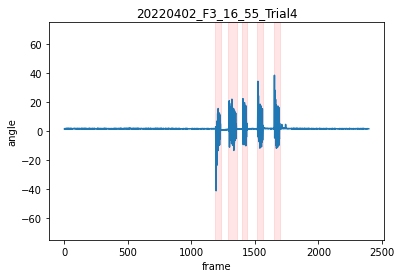

182
182
62.0


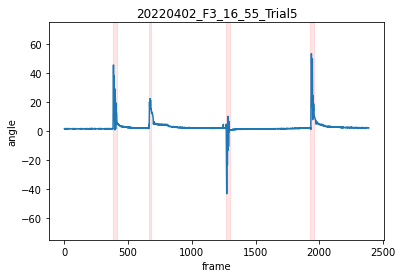

182
182
26.0


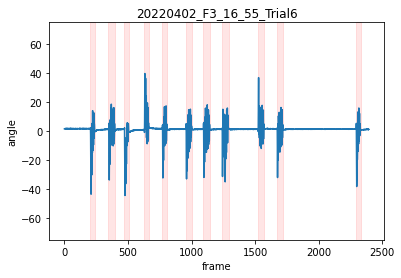

183
183
122.0


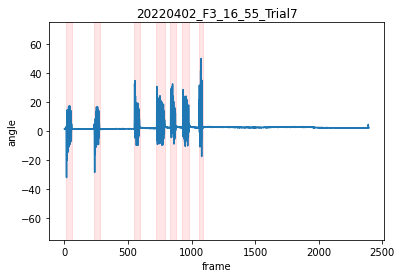

183
183


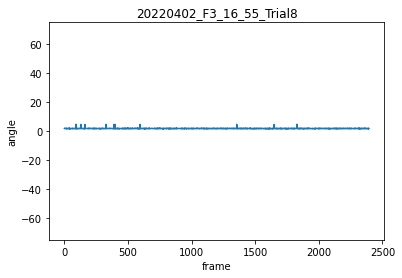

184
184
1200.0


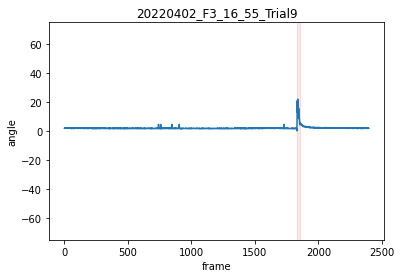

184
184
1143.0


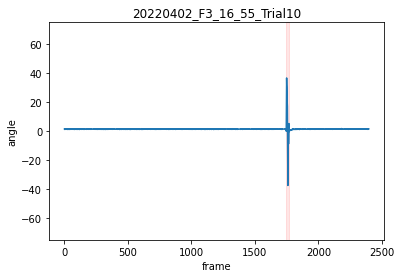

185
185
698.0


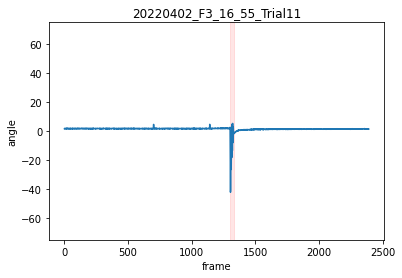

185
185
1200.0


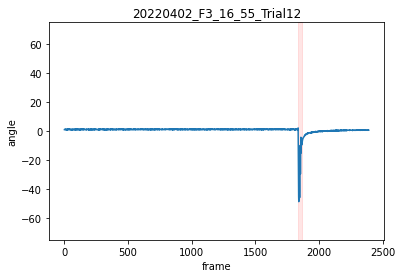

186
186
368.0


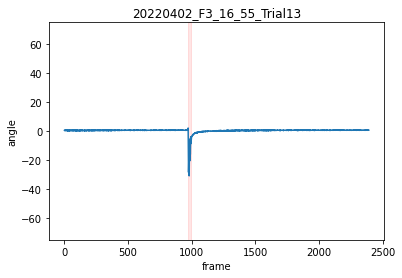

186
186


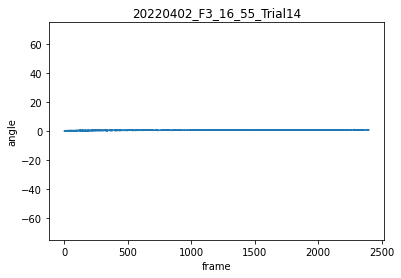

187
187


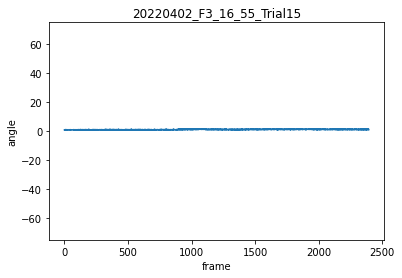

187
187
73.0


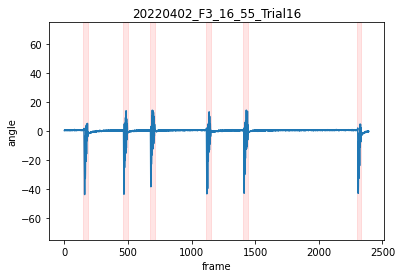

188
188
901.0


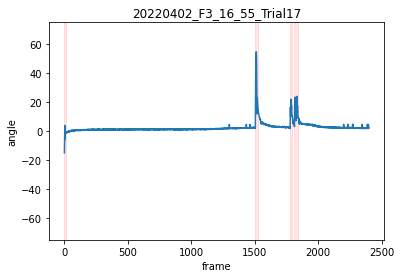

188
188
375.0


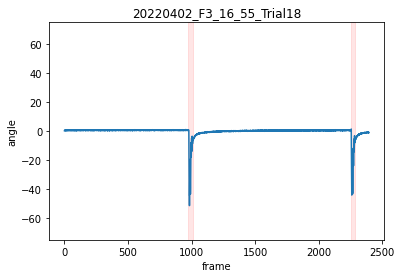

189
189


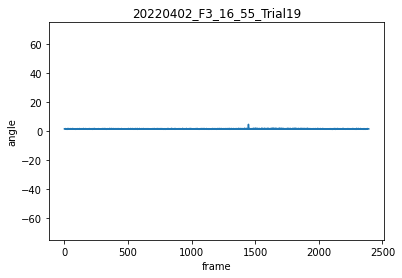

189
189
1200.0


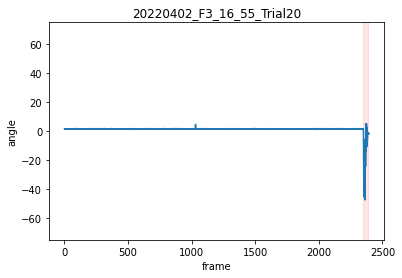

190
190
202.0


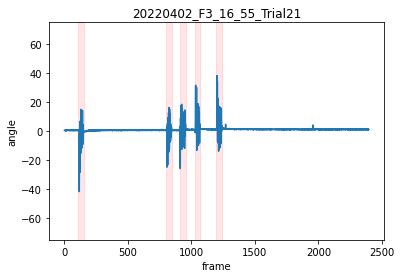

190
190
524.0


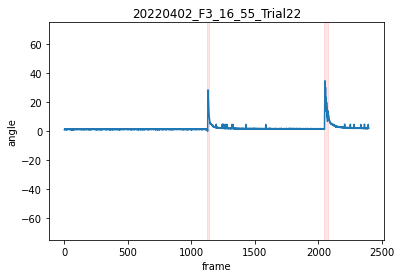

191
191
402.0


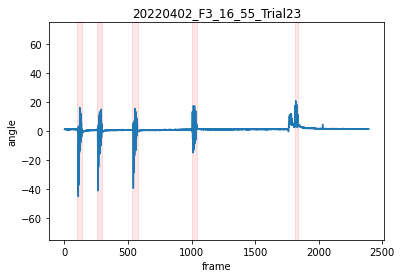

191
191
253.0


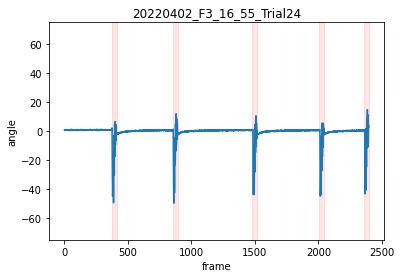

192
192
214.0


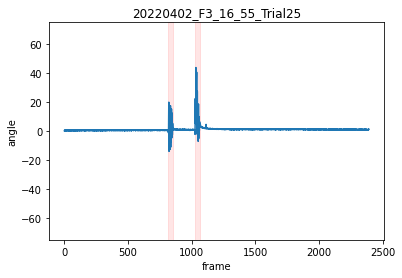

192
192


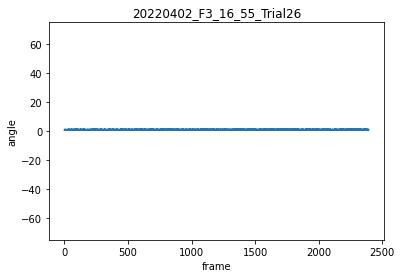

193
193
295.0


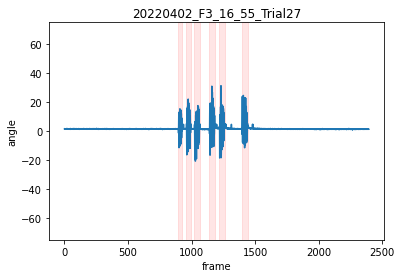

193
193
128.0


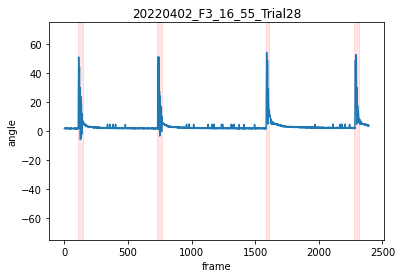

194
194
589.0


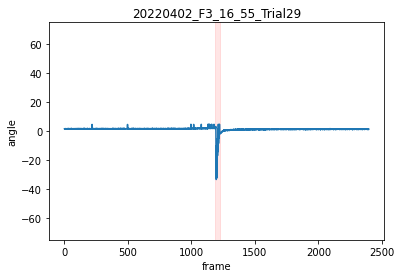

194
194
19.0


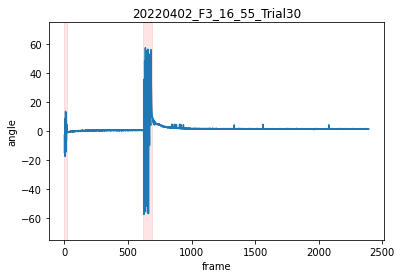

195
195


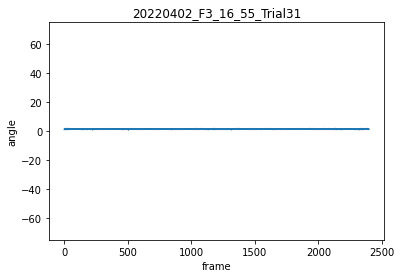

195
195
1200.0


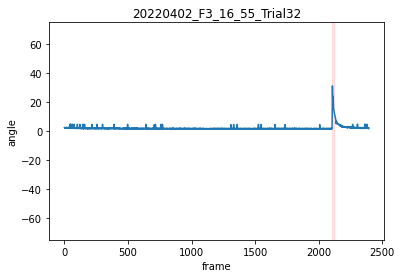

196
196


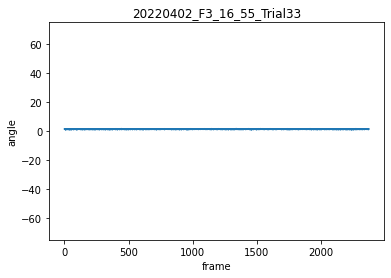

196
196
591.0


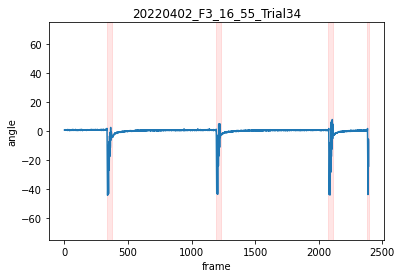

197
197
226.0


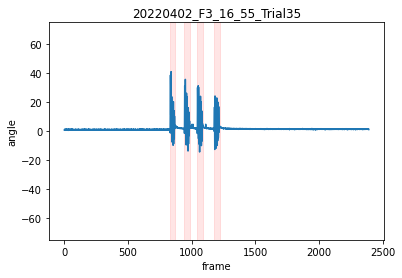

197
197
34.0


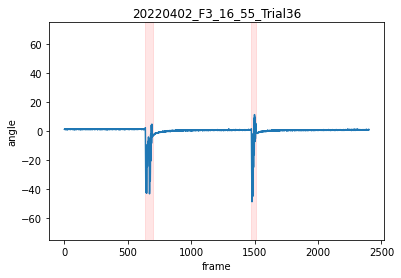

In [4]:
# start_frame = 0
# curve = []
# bouts_final = []
# bouts_final1 = []
# listfilename =[]
bout_idx_0 = []
bout_list_0 = []
bout_idx_30 = []
bout_list_30 = []
bout_idx_32 = []
bout_list_32 = []
bout_idx_40 = []
bout_list_40 = []

angle_list = [[],[],[],[],[],[],[],[],[],[],[]]
fish_idx = 0
stim_list = [[],[],[],[],[],[],[],[],[],[],[]]

df_bout = pd.DataFrame(columns = ['size_type','bout_start','bout_end'])
df_bout_density = pd.DataFrame(columns = ['fish','trial','size_type','stimulus_direction','no_stimulus','bout_density_0','bout_density_6','bout_density_18'])
df_latency =  pd.DataFrame(columns = ['size_type','latency'])
df_fish = pd.DataFrame(columns = ['fish','trial','size_type','movement_time'])
df_bout_frequency = pd.DataFrame(columns = ['fish','trial','size_type','bout_frequency'])

for fish in fish_list:
    listfile = glob.glob(fish+'\\*.h5')
    vsinfo_dir = glob.glob(fish+'\\vsinfo*')[0]
    vsinfo = pd.read_excel(vsinfo_dir)
    vsinfo['0_6'] = 0
    vsinfo['6_18'] = 0
#     vsinfo['12_18'] = 0
    vsinfo['18_24'] = 0
#     vsinfo['24_30'] = 0
    
    for trial in range(1,len(listfile)+1):
        df_fish_idx = df_fish.shape[0]
        df_fish.loc[df_fish_idx,'fish'] = fish
        df_fish.loc[df_fish_idx,'size_type'] = vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size']
        df_fish.loc[df_fish_idx,'movement_time'] = 0
        df_fish.loc[df_fish_idx,'trial'] = trial
        
        df_bout_frequency_idx = df_bout_frequency.shape[0]
        df_bout_frequency.loc[df_bout_frequency_idx,'trial'] = trial  
        df_bout_frequency.loc[df_bout_frequency_idx,'fish'] = fish
        df_bout_frequency.loc[df_bout_frequency_idx,'size_type'] = vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size']
        df_bout_frequency.loc[df_bout_frequency_idx,'bout_frequency'] = 0
              
        
        
        file = listfile[-1][:-8]+str(trial)+'.avi.h5'
        title  = file.split("\\")[-1][:-7]
        df_tail = pd.read_hdf(file,key='tail')
        df_eye = pd.read_hdf(file,key='eye')
        df_tail['angle'] = np.rad2deg(np.arctan2(df_tail['point00']['y']-df_tail['point98']['y'],df_tail['point00']['x']-df_tail['point98']['x']))+90
        smoothed_angle =  gaussian_filter(np.array(df_tail['angle']), sigma=0)
        d_angle = np.abs(np.gradient(smoothed_angle))
        filtered_d_angle = gaussian_filter(d_angle, sigma=3)
        thresholded = apply_hysteresis_threshold(filtered_d_angle, 1, 2.5)
        bouts = [(i[0].start, i[0].stop) for i in find_objects(label(thresholded)[0])]
        
#         locals()['bout_list_'+str(vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size'])].append(0)
        df_bout_density_idx = df_bout_density.shape[0]
        df_bout_density.loc[df_bout_density_idx,'fish'] = title
        df_bout_density.loc[df_bout_density_idx,'trial'] = trial
        df_bout_density.loc[df_bout_density_idx,'size_type'] = vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size']
        if vsinfo.loc[trial-1,'Left_type'] == 'n' and vsinfo.loc[trial-1,'Right_type'] == 'n':
            df_bout_density.loc[df_bout_density_idx,'no_stimulus'] = 'N'
        if vsinfo.loc[trial-1,'Left_type'] == 'm' and vsinfo.loc[trial-1,'Right_type'] == 'o':
            df_bout_density.loc[df_bout_density_idx,'stimulus_direction'] = 'L'
        if vsinfo.loc[trial-1,'Left_type'] == 'o' and vsinfo.loc[trial-1,'Right_type'] == 'm':
            df_bout_density.loc[df_bout_density_idx,'stimulus_direction'] = 'R'
        df_bout_density.loc[df_bout_density_idx,'bout_density_0'] = 0
        df_bout_density.loc[df_bout_density_idx,'bout_density_6'] = 0
#         df_bout_density.loc[df_bout_density_idx,'bout_density_12'] = 0
        df_bout_density.loc[df_bout_density_idx,'bout_density_18'] = 0
#         df_bout_density.loc[df_bout_density_idx,'bout_density_24'] = 0
        print(len(bout_idx_0))
        print(len(bout_list_0))
        
        df_latency_idx = df_latency.shape[0]
        df_latency.loc[df_latency_idx,'size_type'] = vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size']

        if bouts:
            first_bout_idx = 0
            if bouts[-1][0]<600:
                df_latency.loc[df_latency_idx,'latency'] = float(1200)
            else:
                while first_bout_idx>=0:
                    if bouts[first_bout_idx][0]>=600:
                        df_latency.loc[df_latency_idx,'latency'] = float(bouts[first_bout_idx][0]-600)
                        if df_latency.loc[df_latency_idx,'latency']>1200:
                            df_latency.loc[df_latency_idx,'latency'] = float(1200)
                        break
                    else:
                        first_bout_idx = first_bout_idx+1
            

            print(df_latency.loc[df_latency_idx,'latency'])
            locals()['bout_list_'+str(vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size'])].append(1)
            temp_bout_idx = np.zeros(2400)
            for bout in bouts:
                temp_bout_idx[bout[0]:bout[1]] =1
                idx = df_bout.shape[0]
                df_bout.loc[idx,'size_type'] = vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size']
                df_bout.loc[idx,'bout_start'] = float(bout[0])
                df_bout.loc[idx,'bout_end'] = float(bout[1])
                if bout[0]>=600 and bout[0]<1800:
                    df_fish.loc[df_fish_idx,'movement_time'] = df_fish.loc[df_fish_idx,'movement_time']+bout[1]-bout[0]
                    df_bout_frequency.loc[df_bout_frequency_idx,'bout_frequency'] = df_bout_frequency.loc[df_bout_frequency_idx,'bout_frequency']+1
                plt.axvspan(*(np.array(bout)), alpha=.1, color='r')
                if bout[0]>=0 and bout[0]<600:
                    vsinfo.loc[trial-1,'0_6'] = vsinfo.loc[trial-1,'0_6']+bout[1]-bout[0]
                    df_bout_density.loc[df_bout_density_idx,'bout_density_0'] = df_bout_density.loc[df_bout_density_idx,'bout_density_0']+np.sum(np.abs(smoothed_angle[bout[0]:bout[1]]))/6000
                if bout[0]>=600 and bout[0]<1800:
                    vsinfo.loc[trial-1,'6_18'] = vsinfo.loc[trial-1,'6_18']+bout[1]-bout[0]
                    df_bout_density.loc[df_bout_density_idx,'bout_density_6'] = df_bout_density.loc[df_bout_density_idx,'bout_density_6']+np.sum(np.abs(smoothed_angle[bout[0]:bout[1]]))/12000

#                 if bout[0]>=1200 and bout[0]<1800:
#                     vsinfo.loc[trial-1,'12_18'] = vsinfo.loc[trial-1,'12_18']+bout[1]-bout[0]
#                     df_bout_density.loc[df_bout_density_idx,'bout_density_12'] = df_bout_density.loc[df_bout_density_idx,'bout_density_12']+np.sum(np.abs(smoothed_angle[bout[0]:bout[1]]))/6000
                if bout[0]>=1800 and bout[0]<2400:
                    vsinfo.loc[trial-1,'18_24'] = vsinfo.loc[trial-1,'18_24']+bout[1]-bout[0]
                    df_bout_density.loc[df_bout_density_idx,'bout_density_18'] = df_bout_density.loc[df_bout_density_idx,'bout_density_18']+np.sum(np.abs(smoothed_angle[bout[0]:bout[1]]))/6000
#                 if bout[0]>=2400 and bout[0]<3000:
#                     vsinfo.loc[trial-1,'24_30'] = vsinfo.loc[trial-1,'24_30']+bout[1]-bout[0]
#                     df_bout_density.loc[df_bout_density_idx,'bout_density_24'] = df_bout_density.loc[df_bout_density_idx,'bout_density_24']+np.sum(np.abs(smoothed_angle[bout[0]:bout[1]]))/6000


#                 bout_angle = smoothed_angle[bout[0]:bout[1]]
#                 diffed = np.diff(bout_angle)
#                 smoothed = pd.Series(diffed).rolling(8, min_periods=0, center=True).mean().values
#                 signed = np.sign(diffed)
#                 second_diff = np.diff(signed)
#                 local_maxima = np.where(second_diff < 0)[0] + 1
#                 local_minima =  np.where(second_diff > 0)[0] + 1
#                 freq = np.max([local_maxima.shape[0],local_minima.shape[0]])/bout_angle.shape[0]*100


#                 sign_changes = np.where(np.diff(np.sign(bout_angle)))[0]
#                 freq = np.where(np.diff(np.sign(bout_angle)))[0].shape[0]/bout_angle.shape[0]*100
#                 print(freq)
#                 if freq>=25:
#                     OMR_bouts.append(bout)
#                     plt.axvspan(*(np.array(bout)), alpha=.1, color='r')   
#                     diff_bout_angle_list = []
#                     for c in range(1,len(sign_changes)-1):
#                         sign = np.sign(bout_angle[sign_changes[c-1]+1])
#                         if sign>0:
#                             max_bout_angle = max(bout_angle[sign_changes[c-1]+1:sign_changes[c]+1])
#                             min_bout_angle = min(bout_angle[sign_changes[c]+1:sign_changes[c+1]+1])
#                         else:
#                             min_bout_angle = min(bout_angle[sign_changes[c-1]+1:sign_changes[c]+1])
#                             max_bout_angle = max(bout_angle[sign_changes[c]+1:sign_changes[c+1]+1])                            
# #                         print(bout_angle[sign_changes[c-1]+1:sign_changes[c]+1])
# #                         print(sign)
# #                         print('max is '+str(max_bout_angle))
# #                         print('min is '+str(min_bout_angle))
#                         diff_bout_angle = (max_bout_angle + min_bout_angle)/(max_bout_angle - min_bout_angle)
#                         diff_bout_angle_list.append(diff_bout_angle)
#                     if np.max(diff_bout_angle_list)<0.3:
#                     if np.mean(diff_bout_angle_list)<0.3:
#                         plt.axvspan(*(np.array(bout)), alpha=.1, color='r')   
#         print(OMR_bouts)
            locals()['bout_idx_'+str(vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size'])].append(temp_bout_idx)
        else:
            df_latency.loc[df_latency_idx,'latency'] = float(1200)
            
            locals()['bout_list_'+str(vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size'])].append(0)
            locals()['bout_idx_'+str(vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size'])].append(np.zeros(2400))
        angle_list[fish_idx].append(smoothed_angle)
        stim_list[fish_idx].append(vsinfo.loc[trial-1,'Left_size']+vsinfo.loc[trial-1,'Right_size'])
        
        
        
        plt.plot(smoothed_angle)
        plt.title(title)
        plt.xlabel('frame')
        plt.ylabel('angle')
        plt.ylim((-75,75))
        plt.savefig(dir_output+title+'.png')
        plt.show()
        vsinfo['OMR_response'] = vsinfo['6_18']
        vsinfo['size_type'] = vsinfo['Left_size']+vsinfo['Right_size']
        vsinfo.to_csv(vsinfo_dir[:-5]+'_updated.csv')
        
    fish_idx = fish_idx+1    
        
        
        

In [8]:
prefile_dir = main_dir + 'pre_files\\'
np.save(prefile_dir+'bout_idx_0.npy',bout_idx_0)
np.save(prefile_dir+'bout_list_0.npy',bout_list_0)
np.save(prefile_dir+'bout_idx_30.npy',bout_idx_30)
np.save(prefile_dir+'bout_list_30.npy',bout_list_30)
np.save(prefile_dir+'bout_idx_32.npy',bout_idx_32)
np.save(prefile_dir+'bout_list_32.npy',bout_list_32)
np.save(prefile_dir+'bout_idx_40.npy',bout_idx_40)
np.save(prefile_dir+'bout_list_40.npy',bout_list_40)


# Fish by fish analysis and tail angle overlay plot

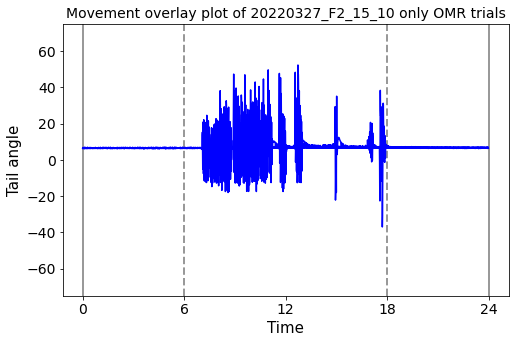

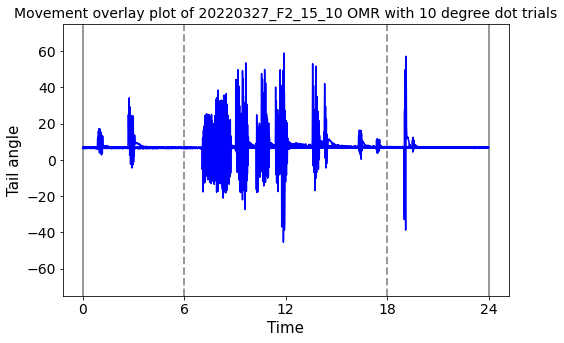

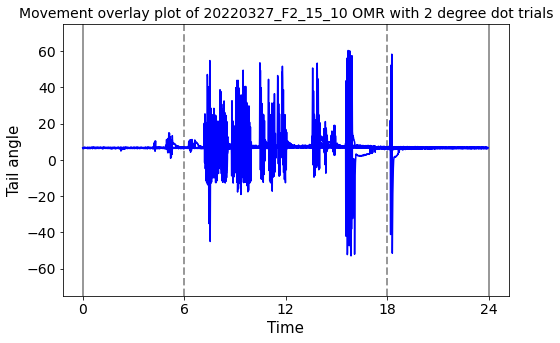

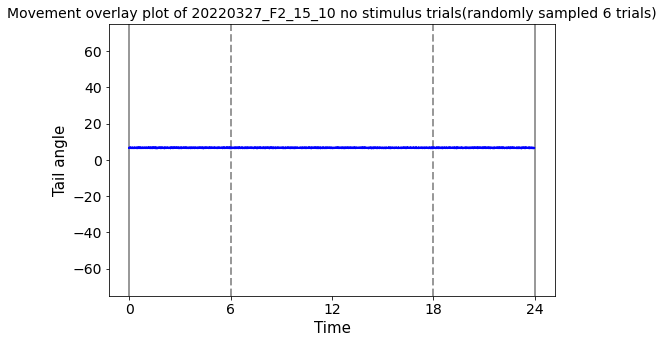

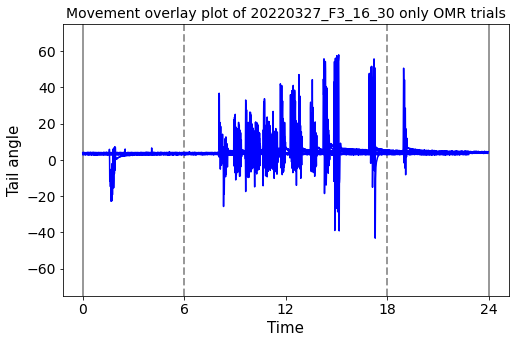

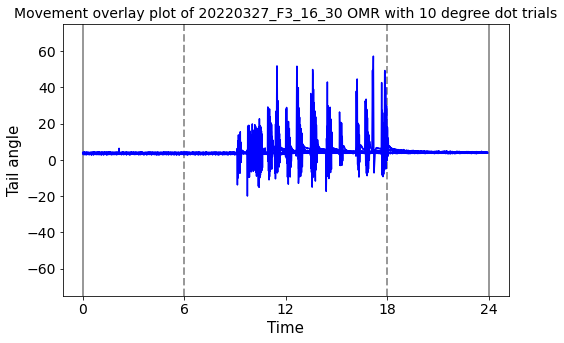

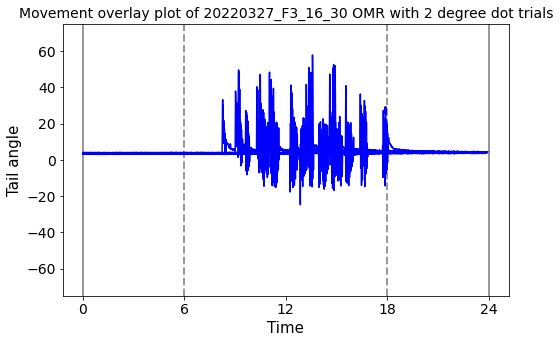

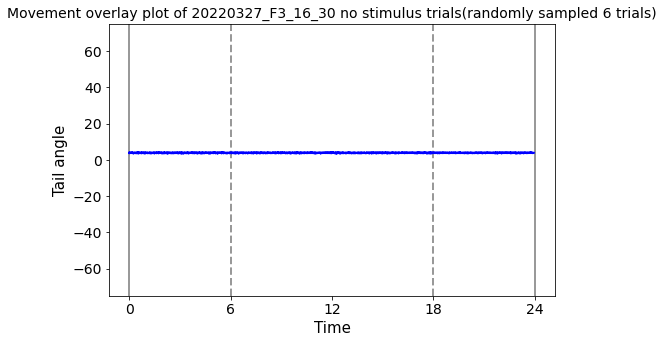

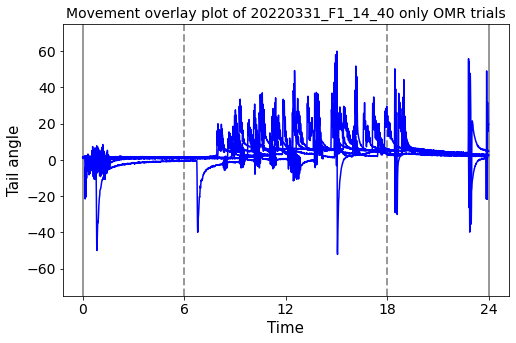

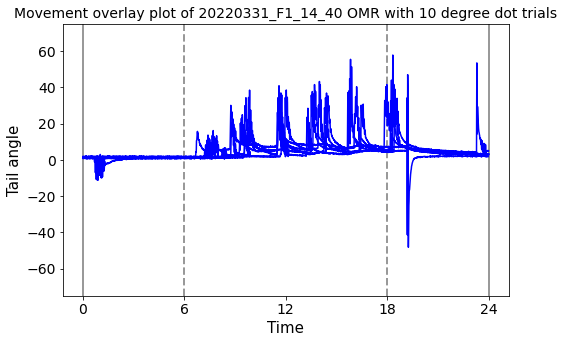

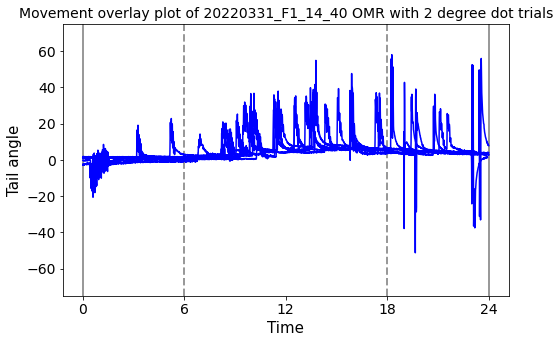

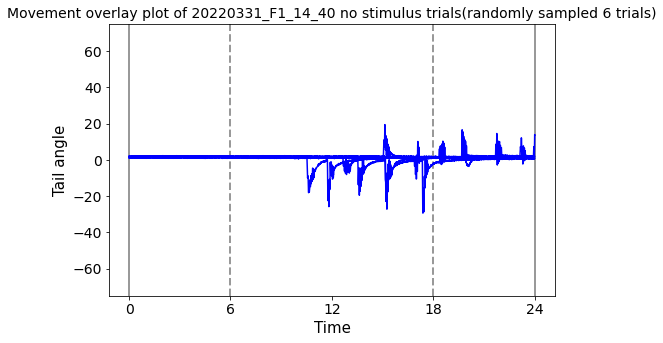

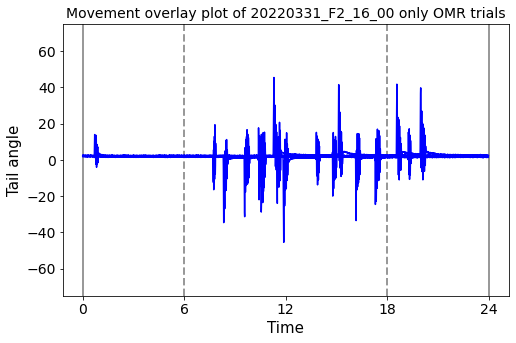

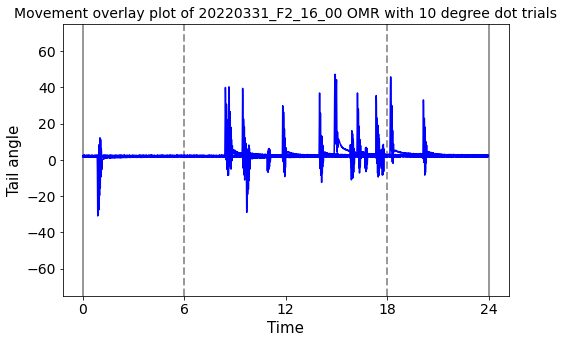

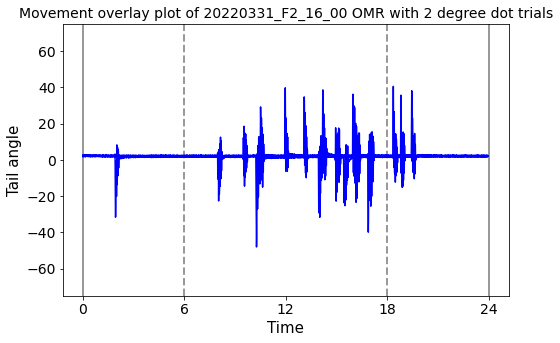

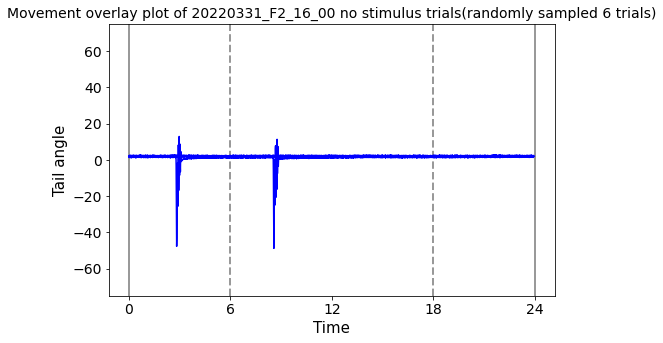

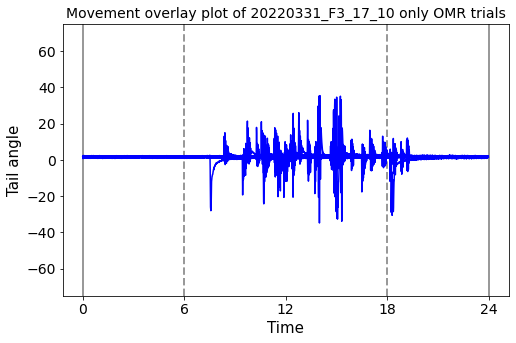

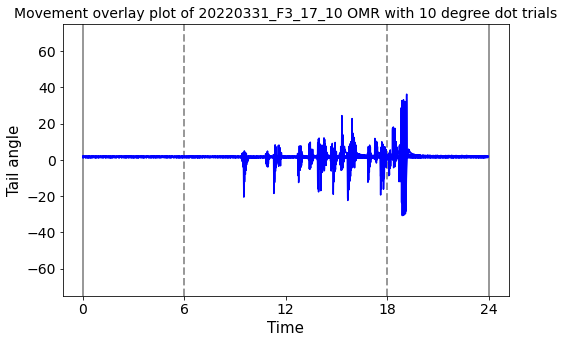

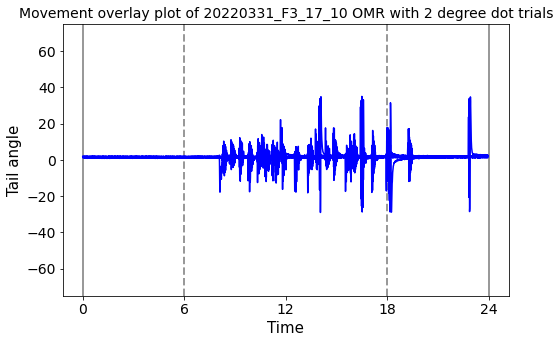

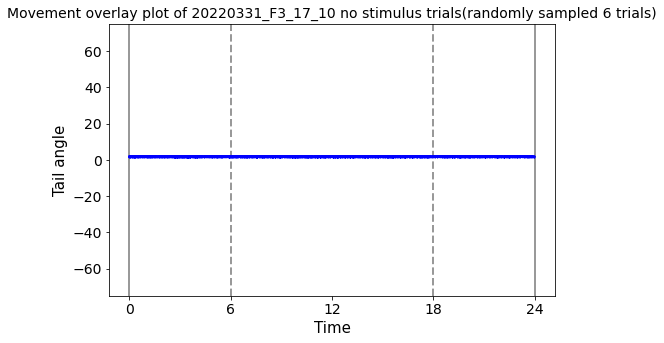

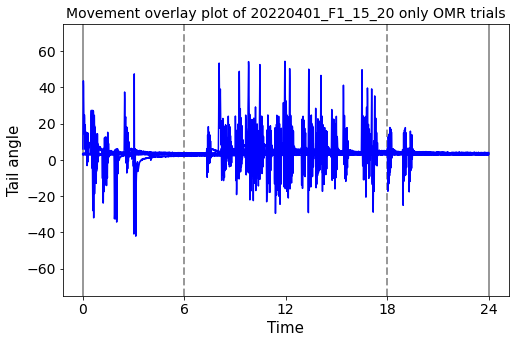

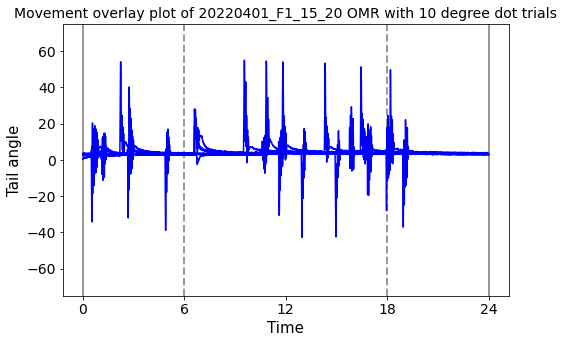

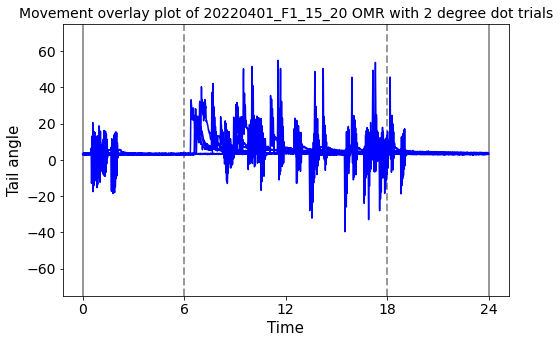

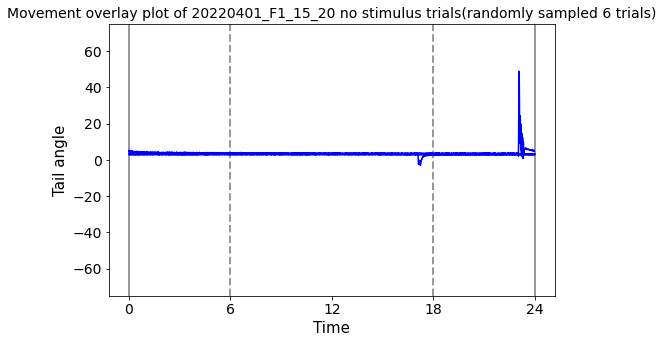

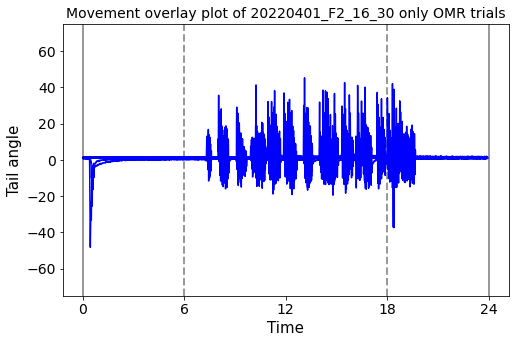

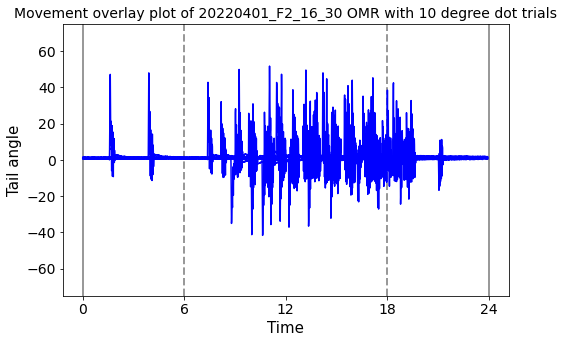

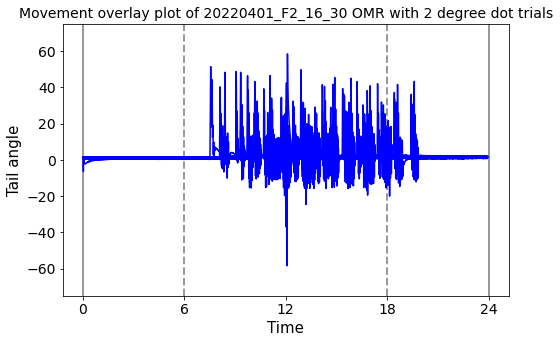

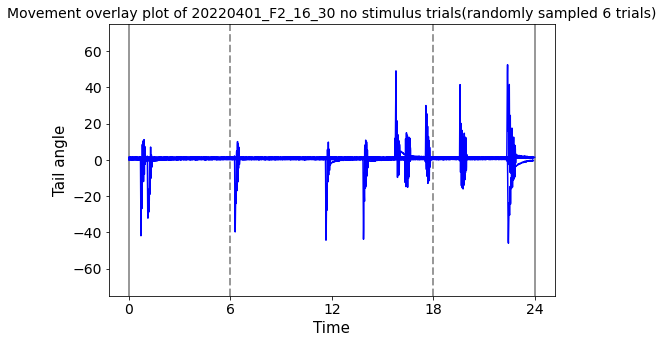

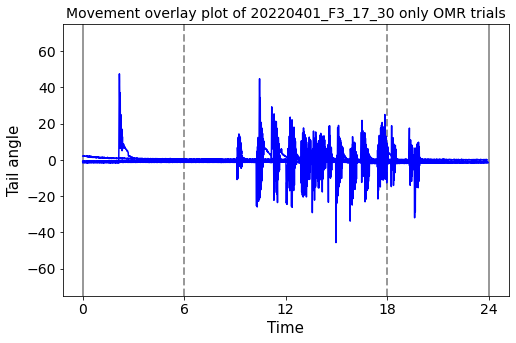

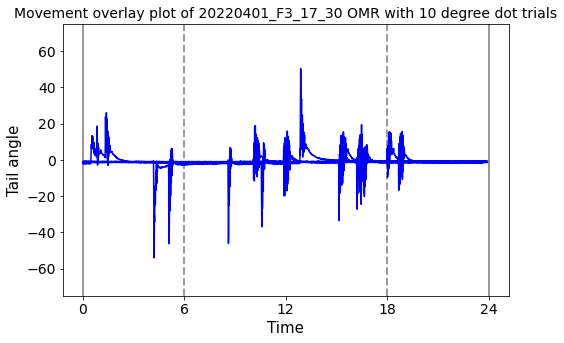

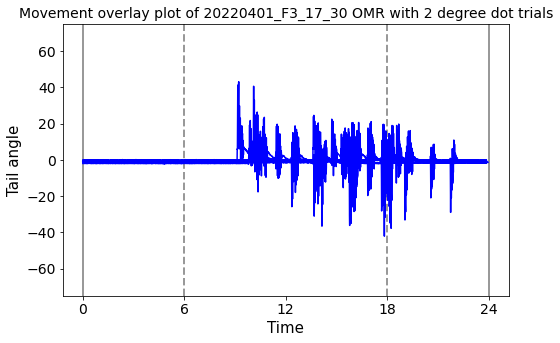

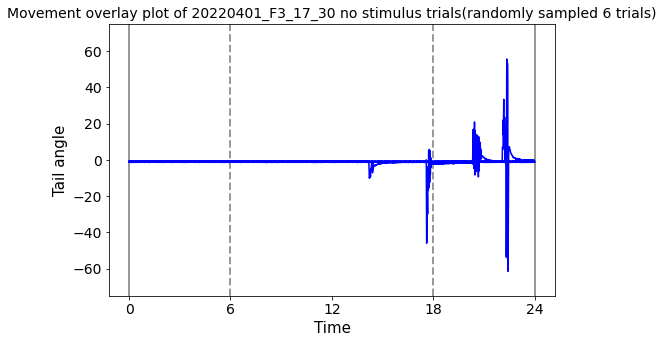

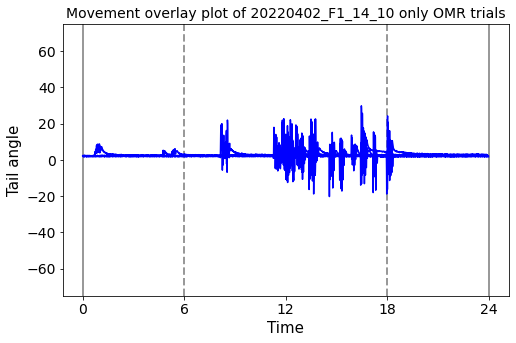

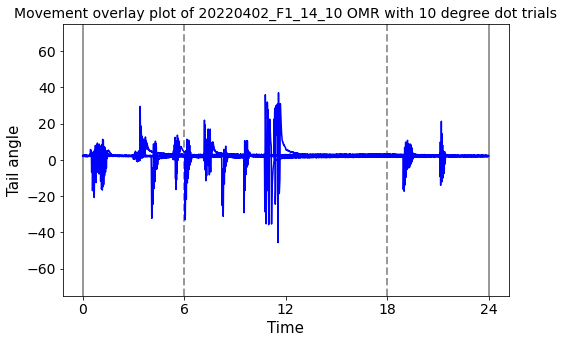

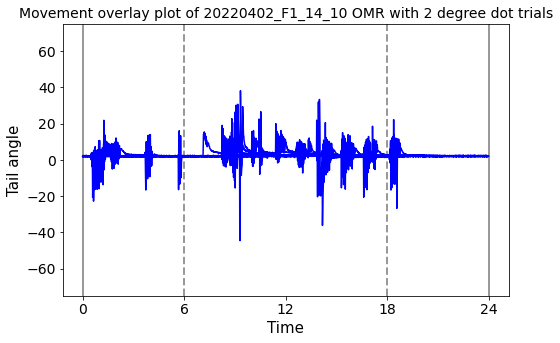

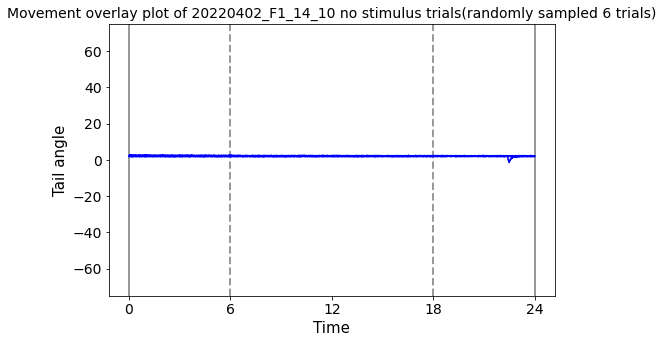

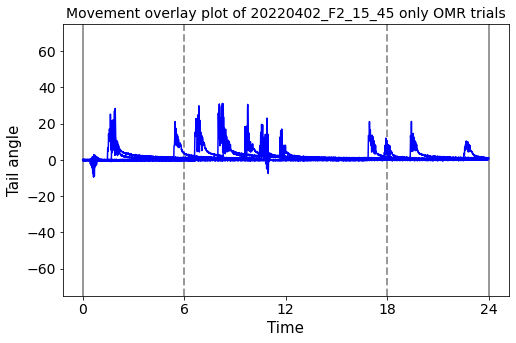

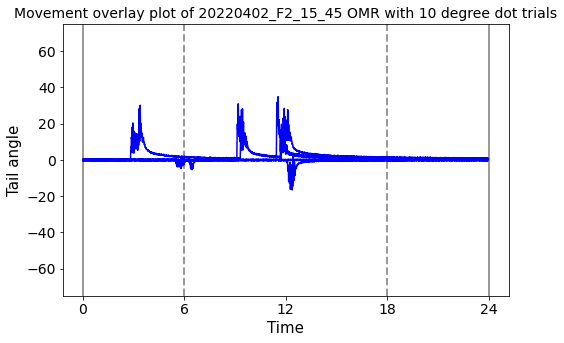

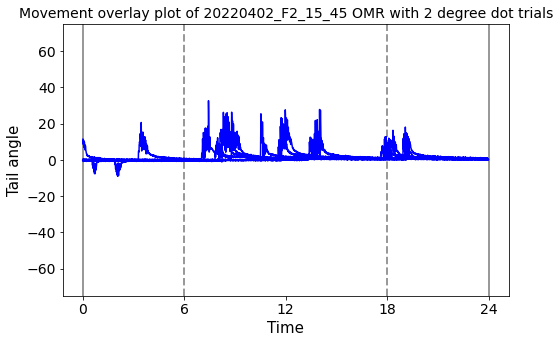

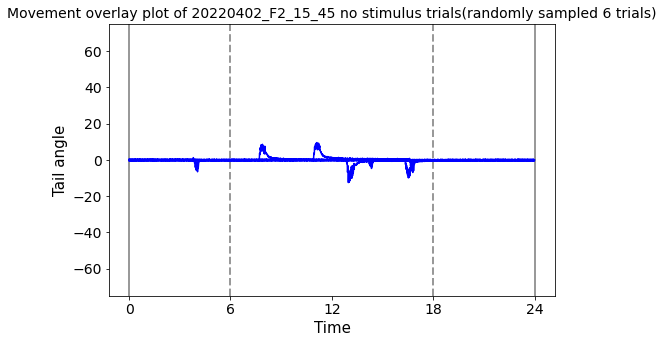

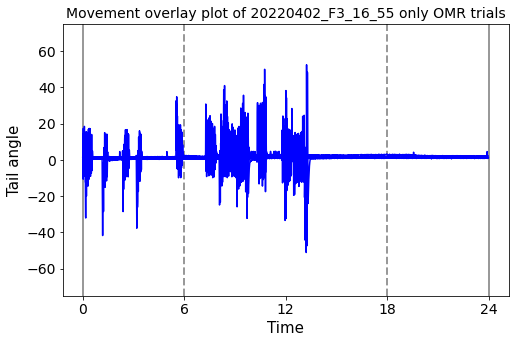

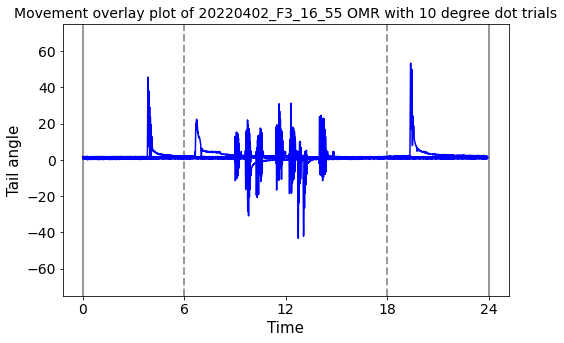

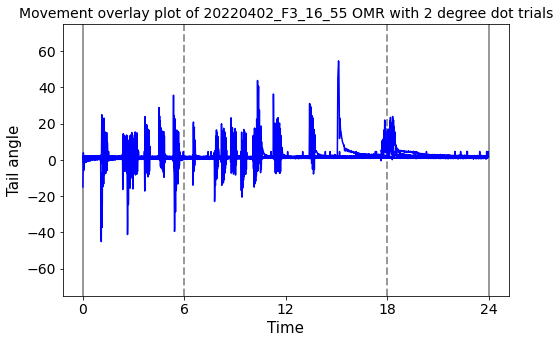

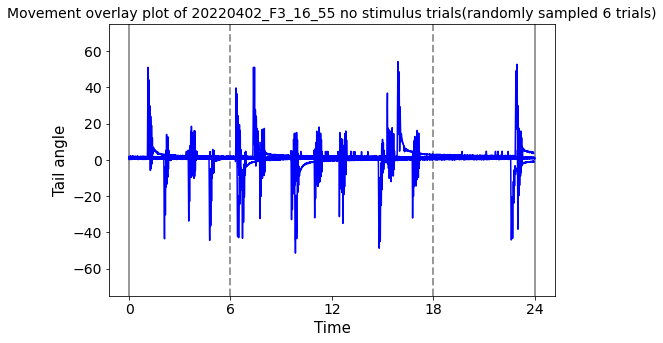

In [25]:
# fish_list
# stim_list
# angle_list
for fish_i in range(0,len(fish_list)):
# for fish_i in range(0,2):
    temp_angle_list = angle_list[fish_i]
    temp_stim_list = stim_list[fish_i]
    trial_idx_30 = np.where(np.array(temp_stim_list) == 30)
    trial_idx_32 = np.where(np.array(temp_stim_list) == 32)
    trial_idx_40 = np.where(np.array(temp_stim_list) == 40)
    trial_idx_0 = np.where(np.array(temp_stim_list) == 0)
    
    # only OMR trials
    plt.figure(figsize = (8,5))
    plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')

    for idx in trial_idx_30[0]:
        plt.plot(temp_angle_list[idx],color = 'b')
    plt.title('Movement overlay plot of '+fish_list[fish_i][-26:-18]+'_'+fish_list[fish_i][-8:]+' only OMR trials',fontsize = 14)
    plt.ylim(-75,75)
    plt.xlabel('Time',fontsize = 15)
    plt.ylabel('Tail angle',fontsize = 15)
    plt.yticks(fontsize = 14)
    plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
    plt.show()
    
    # 10 degree trials
    plt.figure(figsize = (8,5))
    plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    for idx in trial_idx_40[0]:
        plt.plot(temp_angle_list[idx],color = 'b')
    plt.title('Movement overlay plot of '+fish_list[fish_i][-26:-18]+'_'+fish_list[fish_i][-8:]+' OMR with 10 degree dot trials',fontsize = 14)
    plt.ylim(-75,75)
    plt.xlabel('Time',fontsize = 15)
    plt.ylabel('Tail angle',fontsize = 15)
    plt.yticks(fontsize = 14)
    plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
    plt.show()
    
    # 2 degree trials
    plt.figure(figsize = (8,5))
    plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    for idx in trial_idx_32[0]:
        plt.plot(temp_angle_list[idx],color = 'b')
    plt.title('Movement overlay plot of '+fish_list[fish_i][-26:-18]+'_'+fish_list[fish_i][-8:]+' OMR with 2 degree dot trials',fontsize = 14)
    plt.ylim(-75,75)
    plt.xlabel('Time',fontsize = 15)
    plt.ylabel('Tail angle',fontsize = 15)
    plt.yticks(fontsize = 14)
    plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
    plt.show()
    
    # 2 degree trials
    plt.figure(figsize = (8,5))
    plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    for idx in trial_idx_0[0][random.sample(range(0,18),6)]:
#     for idx in trial_idx_0[0][random.sample(range(0,9),3)]:    
        plt.plot(temp_angle_list[idx],color = 'b')
    plt.title('Movement overlay plot of '+fish_list[fish_i][-26:-18]+'_'+fish_list[fish_i][-8:]+' no stimulus trials(randomly sampled 6 trials)',fontsize = 14)
    plt.ylim(-75,75)
    plt.xlabel('Time',fontsize = 15)
    plt.ylabel('Tail angle',fontsize = 15)
    plt.yticks(fontsize = 14)
    plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
    plt.show()



##  Overall tail angle overlay plot

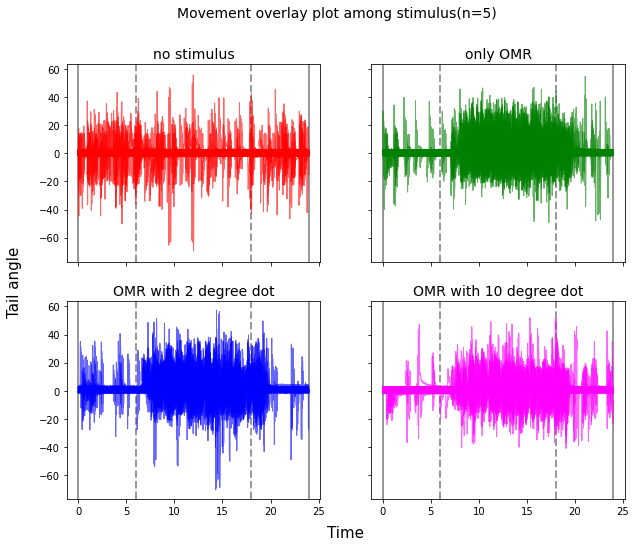

In [8]:
# fish_list
# stim_list
# angle_list
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle('Movement overlay plot among stimulus(n=5)',fontsize = 14)
plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')

for ax in (ax1,ax2,ax3,ax4):
    ax.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
    ax.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    ax.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
    ax.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
ax1.set_title("no stimulus",fontsize = 14)
ax2.set_title("only OMR",fontsize = 14)
ax3.set_title("OMR with 2 degree dot",fontsize = 14)
ax4.set_title("OMR with 10 degree dot",fontsize = 14)


for fish_i in range(0,len(fish_list)):
    temp_angle_list = angle_list[fish_i]
    temp_stim_list = stim_list[fish_i]
    trial_idx_30 = np.where(np.array(temp_stim_list) == 30)
    trial_idx_32 = np.where(np.array(temp_stim_list) == 32)
    trial_idx_40 = np.where(np.array(temp_stim_list) == 40)
    trial_idx_0 = np.where(np.array(temp_stim_list) == 0)
    
    for idx in trial_idx_0[0]:
        ax1.plot(temp_angle_list[idx],color = 'r',linewidth = 1,alpha = 0.6)
    for idx in trial_idx_30[0]:
        ax2.plot(temp_angle_list[idx],color = 'g',linewidth = 1,alpha = 0.6)
    for idx in trial_idx_32[0]:
        ax3.plot(temp_angle_list[idx],color = 'b',linewidth = 1,alpha = 0.6)
    for idx in trial_idx_40[0]:
        ax4.plot(temp_angle_list[idx],color = 'magenta',linewidth = 1,alpha = 0.6)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylim(-75,75)
plt.xlabel('Time',fontsize = 15)
plt.ylabel('Tail angle',fontsize = 15)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()
    
  

## Movement distribution over time

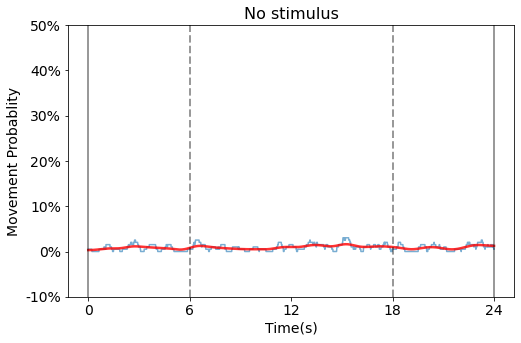

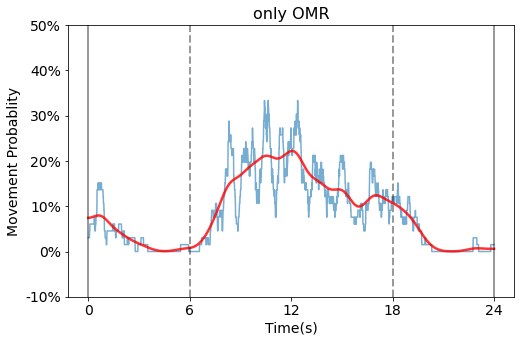

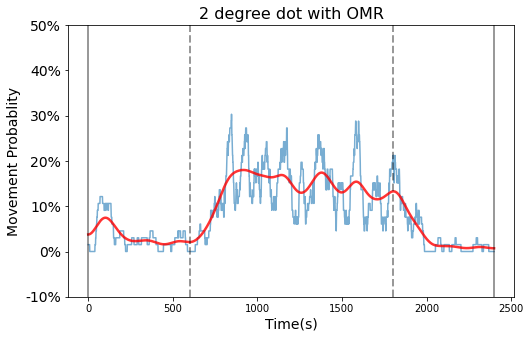

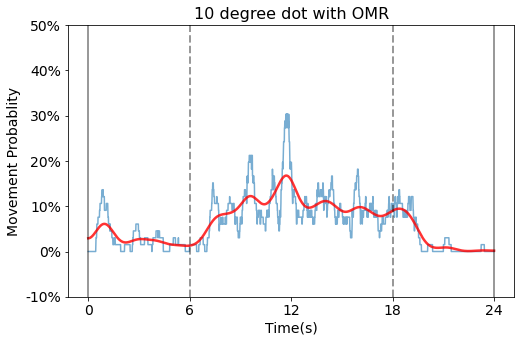

In [52]:
plt.figure(figsize = (8,5))
plt.plot(np.array(bout_idx_0)[np.array(bout_list_0) ==1].sum(axis = 0)/len(bout_list_0),alpha = 0.6)
smoothed_bout_dist_0 = gaussian_filter(np.array(bout_idx_0)[np.array(bout_list_0) ==1].sum(axis = 0), sigma=50)/len(bout_list_0)
plt.plot(smoothed_bout_dist_0,color = 'r',alpha = 0.8,linewidth = 2.5)
plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.title('No stimulus',fontsize = 16)
plt.ylim(-0.1,0.5)
plt.ylabel('Movement Probablity',fontsize = '14')
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5],['-10%','0%','10%','20%','30%','40%','50%'],fontsize = '14')
plt.xlabel('Time(s)',fontsize = '14')
plt.yticks(fontsize = 14)
plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
plt.show()

plt.figure(figsize = (8,5))
plt.plot(np.array(bout_idx_30)[np.array(bout_list_30) ==1].sum(axis = 0)/len(bout_list_30),alpha = 0.6)
smoothed_bout_dist_30 = gaussian_filter(np.array(bout_idx_30)[np.array(bout_list_30) ==1].sum(axis = 0), sigma=50)/len(bout_list_30)
plt.plot(smoothed_bout_dist_30,color = 'r',alpha = 0.8,linewidth = 2.5)
plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.title('only OMR',fontsize = 16)
plt.ylim(-0.1,0.5)
plt.ylabel('Movement Probablity',fontsize = '14')
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5],['-10%','0%','10%','20%','30%','40%','50%'],fontsize = '14')
plt.xlabel('Time(s)',fontsize = '14')
plt.yticks(fontsize = 14)
plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
plt.show()

plt.figure(figsize = (8,5))
plt.plot(np.array(bout_idx_32)[np.array(bout_list_32) ==1].sum(axis = 0)/len(bout_list_32),alpha = 0.6)
smoothed_bout_dist_32 = gaussian_filter(np.array(bout_idx_32)[np.array(bout_list_32) ==1].sum(axis = 0), sigma=50)/len(bout_list_32)
plt.plot(smoothed_bout_dist_32,color = 'r',alpha = 0.8,linewidth = 2.5)
plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.title('2 degree dot with OMR',fontsize = 16)
plt.ylim(-0.1,0.5)
plt.ylabel('Movement Probablity',fontsize = '14')
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5],['-10%','0%','10%','20%','30%','40%','50%'],fontsize = '14')

plt.xlabel('Time(s)',fontsize = '14')
plt.yticks(fontsize = 14)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(np.array(bout_idx_40)[np.array(bout_list_40) ==1].sum(axis = 0)/len(bout_list_40),alpha = 0.6)
smoothed_bout_dist_40 = gaussian_filter(np.array(bout_idx_40)[np.array(bout_list_40) ==1].sum(axis = 0), sigma=50)/len(bout_list_40)
plt.plot(smoothed_bout_dist_40,color = 'r',alpha = 0.8,linewidth = 2.5)
plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.title('10 degree dot with OMR',fontsize = 16)
plt.ylim(-0.1,0.5)
plt.ylabel('Movement Probablity',fontsize = '14')
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5],['-10%','0%','10%','20%','30%','40%','50%'],fontsize = '14')
plt.xlabel('Time(s)',fontsize = '14')
plt.yticks(fontsize = 14)
plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
plt.show()


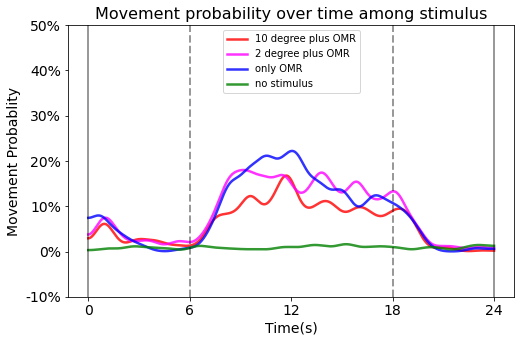

In [51]:
plt.figure(figsize = (8,5))

plt.plot(smoothed_bout_dist_40,color = 'r',alpha = 0.8,linewidth = 2.5)
plt.plot(smoothed_bout_dist_32,color = 'magenta',alpha = 0.8,linewidth = 2.5)
plt.plot(smoothed_bout_dist_30,color = 'b',alpha = 0.8,linewidth = 2.5)
plt.plot(smoothed_bout_dist_0,color = 'g',alpha = 0.8,linewidth = 2.5)
plt.title('Movement probability over time among stimulus',fontsize = 16)
plt.ylim(-0.1,0.5)
plt.ylabel('Movement Probablity',fontsize = '14')
plt.yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5],['-10%','0%','10%','20%','30%','40%','50%'],fontsize = '14')
plt.xlabel('Time(s)',fontsize = '14')

plt.legend(['10 degree plus OMR','2 degree plus OMR','only OMR','no stimulus'])
plt.xticks([0,600,1200,1800,2400],['0','6','12','18','24'],fontsize = '14')
plt.axvline(x=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.axvline(x=600, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=1800, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axvline(x=2400, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.show()

## Movement initiation time violin plot

In [28]:
df_bout['bout_start'] = df_bout['bout_start'].astype(int)
df_bout['bout_end'] = df_bout['bout_end'].astype(int)
print(df_bout.shape)
print(df_bout[df_bout['size_type'] == 40].shape)
print(df_bout[df_bout['size_type'] == 30].shape)
print(df_bout[df_bout['size_type'] == 32].shape)
print(df_bout[df_bout['size_type'] == 0].shape)

(1074, 3)
(269, 3)
(342, 3)
(352, 3)
(111, 3)


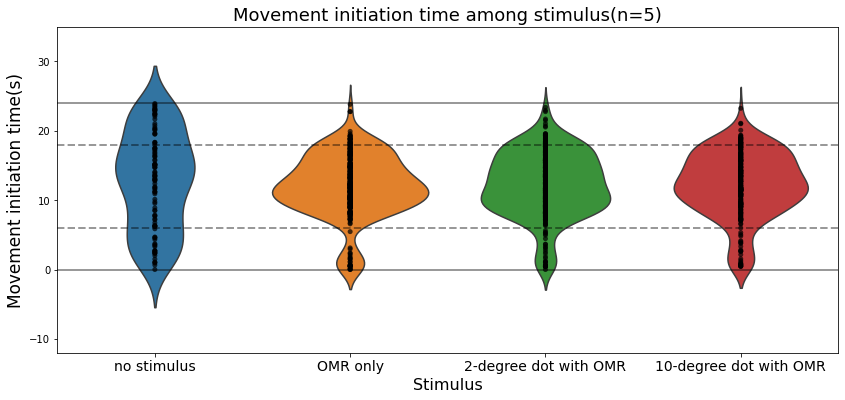

In [29]:
plt.figure(figsize = (14,6))
ax = sns.violinplot(x=df_bout['size_type'], y=df_bout['bout_start']/100,inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_bout['size_type'], y=df_bout['bout_start']/100,color = 'k', jitter = 0, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('Movement initiation time(s)',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('Movement initiation time among stimulus(n=5)',fontsize = 18)
plt.axhline(y=0, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.axhline(y=6, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axhline(y=18, linewidth=2, color = 'k',alpha = 0.4,linestyle = '--')
plt.axhline(y=24, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')

plt.ylim(-12,35)
# plt.grid(axis = 'y',alpha = 0.3)
plt.savefig(main_dir+'movement initiation time violin plot(n=5).png')
plt.show()

# Latency comparison

In [30]:
df_latency = df_latency.astype(dtype='float')
df_latency

size_type  latency
0         30.0    331.0
1          0.0   1200.0
2         40.0    105.0
3          0.0   1200.0
4         32.0    124.0
..         ...      ...
391        0.0   1200.0
392       40.0   1200.0
393        0.0    591.0
394       30.0    226.0
395        0.0     34.0

[396 rows x 2 columns]

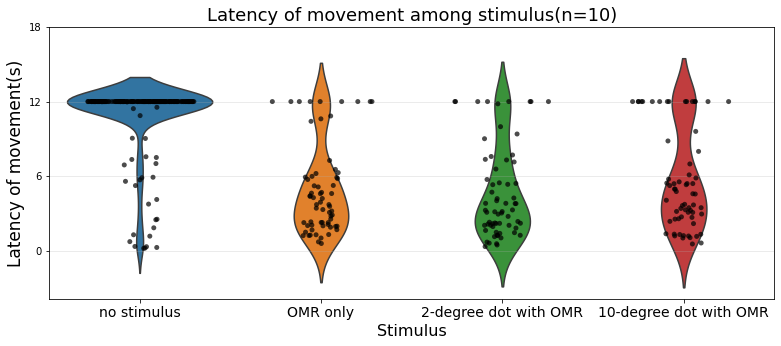

In [31]:
plt.figure(figsize = (13,5))
ax = sns.violinplot(x=df_latency['size_type'], y=df_latency['latency']/100,inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_latency[df_latency['latency']!=1200.0]['size_type'], y=df_latency[df_latency['latency']!=1200.0]['latency']/100,color = 'k', alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_latency[df_latency['latency']==1200.0]['size_type'], y=df_latency[df_latency['latency']==1200.0]['latency']/100,color = 'k',jitter = 0.3, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('Latency of movement(s)',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('Latency of movement among stimulus(n=10)',fontsize = 18)
plt.yticks([0.0,6.0,12.0,18.0])
plt.grid(axis = 'y',alpha = 0.3)
plt.savefig(main_dir+'violin plot of latency with strip plot(n=10).png')
plt.show()

In [32]:
np_latency_0 = np.array(df_latency[df_latency['size_type'] == 0.0]['latency']).astype(np.float)
np_latency_30 = np.array(df_latency[df_latency['size_type'] == 30.0]['latency']).astype(np.float)
np_latency_32 = np.array(df_latency[df_latency['size_type'] == 32.0]['latency']).astype(np.float)
np_latency_40 = np.array(df_latency[df_latency['size_type'] == 40.0]['latency']).astype(np.float)


print(scipy.stats.mannwhitneyu(np_latency_0, np_latency_30, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_latency_0, np_latency_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_latency_0, np_latency_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_latency_30, np_latency_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_latency_30, np_latency_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_latency_32, np_latency_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))

MannwhitneyuResult(statistic=11362.0, pvalue=3.7931182717614405e-27)
MannwhitneyuResult(statistic=11470.0, pvalue=4.1822194555951115e-28)
MannwhitneyuResult(statistic=10662.5, pvalue=2.348753254364648e-21)
MannwhitneyuResult(statistic=2328.0, pvalue=0.49578930900985574)
MannwhitneyuResult(statistic=1930.5, pvalue=0.25932828583070444)
MannwhitneyuResult(statistic=1798.0, pvalue=0.08320525457927092)


<ipython-input-32-1580dd527392>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_latency_0 = np.array(df_latency[df_latency['size_type'] == 0.0]['latency']).astype(np.float)
<ipython-input-32-1580dd527392>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_latency_30 = np.array(df_latency[df_latency['size_type'] == 30.0]['latency']).a

# bout frequency

In [126]:
df_bout_frequency.iloc[:,-1] = df_bout_frequency.iloc[:,-1].astype(dtype='float64')
df_bout_frequency.iloc[:,-2] = df_bout_frequency.iloc[:,-2].astype(dtype='float64')
df_bout_frequency


fish trial  size_type  \
0    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...   1.0       30.0   
1    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...   2.0        0.0   
2    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...   3.0       40.0   
3    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...   4.0        0.0   
4    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...   5.0       32.0   
..                                                 ...   ...        ...   
391  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...  32.0        0.0   
392  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...  33.0       40.0   
393  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...  34.0        0.0   
394  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...  35.0       30.0   
395  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...  36.0        0.0   

     bout_frequency  
0               4.0  
1               0.0  
2               9.0  
3               0.0  
4               6.0  
..              ...  
391             0.0  
392             0.0  
393             1.0  
394             4.0  
395             2.0  

[396 rows x 4 columns]

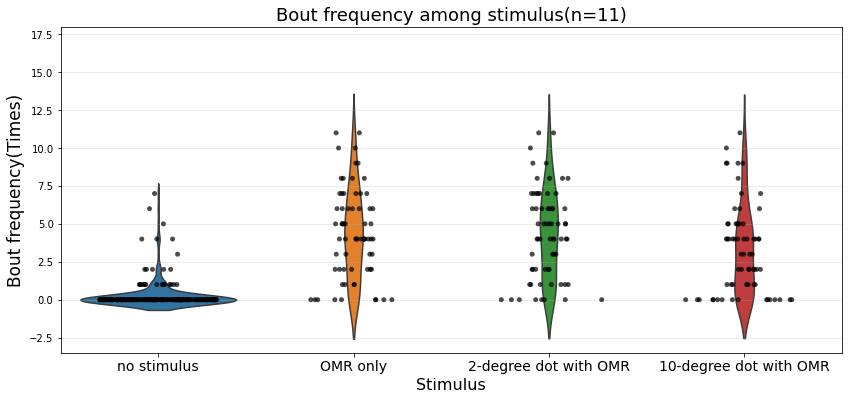

In [132]:
plt.figure(figsize = (14,6))

ax = sns.violinplot(x=df_bout_frequency['size_type'], y=df_bout_frequency['bout_frequency'],inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_bout_frequency[df_bout_frequency['bout_frequency']!=0]['size_type'], y=df_bout_frequency[df_bout_frequency['bout_frequency']!=0]['bout_frequency'],color = 'k', alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_bout_frequency[df_bout_frequency['bout_frequency']==0]['size_type'], y=df_bout_frequency[df_bout_frequency['bout_frequency']==0]['bout_frequency'],color = 'k',jitter = 0.3, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('Bout frequency(Times)',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('Bout frequency among stimulus(n=11)',fontsize = 18)
plt.grid(axis = 'y',alpha = 0.3)
plt.ylim(-3.5,18)
plt.savefig(main_dir+'violin plot of bout frequency among stimulus(n=11).png')
plt.show()

In [133]:
np_frequency_0 = np.array(-df_bout_frequency[df_bout_frequency['size_type'] == 0.0]['bout_frequency']/100).astype(np.float)
np_frequency_30 = np.array(-df_bout_frequency[df_bout_frequency['size_type'] == 30.0]['bout_frequency']/100).astype(np.float)
np_frequency_32 = np.array(-df_bout_frequency[df_bout_frequency['size_type'] == 32.0]['bout_frequency']/100).astype(np.float)
np_frequency_40 = np.array(-df_bout_frequency[df_bout_frequency['size_type'] == 40.0]['bout_frequency']/100).astype(np.float)


# 
print(scipy.stats.mannwhitneyu(np_frequency_0, np_frequency_30, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_frequency_0, np_frequency_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_frequency_0, np_frequency_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_frequency_30, np_frequency_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_frequency_30, np_frequency_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_frequency_32, np_frequency_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))

MannwhitneyuResult(statistic=11787.0, pvalue=7.197932402447167e-32)
MannwhitneyuResult(statistic=11857.5, pvalue=1.8291989459377729e-32)
MannwhitneyuResult(statistic=10929.5, pvalue=4.9677979418133455e-24)
MannwhitneyuResult(statistic=2176.0, pvalue=0.9945200112947143)
MannwhitneyuResult(statistic=1681.0, pvalue=0.022658468079260367)
MannwhitneyuResult(statistic=1681.0, pvalue=0.02279107343769342)


<ipython-input-133-00b896a3030f>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_frequency_0 = np.array(-df_bout_frequency[df_bout_frequency['size_type'] == 0.0]['bout_frequency']/100).astype(np.float)
<ipython-input-133-00b896a3030f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_frequency_30 = np.array(-df_bout_frequency[df_bou

## $\Delta T$ violin plot

In [9]:
df_OMR = pd.DataFrame(columns = ['OMR_response','size_type'])
for fish in fish_list:
    vsinfo_dir = glob.glob(fish+'\\vsinfo*_updated.csv')[0]
    vsinfo_result = pd.read_csv(vsinfo_dir)
    df_OMR = df_OMR.append(vsinfo_result.iloc[:,[-2,-1]], ignore_index=True)
df_OMR = df_OMR.astype(dtype='float')

In [10]:
df_OMR

OMR_response  size_type
0           168.0       30.0
1             0.0        0.0
2           298.0       40.0
3             0.0        0.0
4           250.0       32.0
..            ...        ...
391           0.0        0.0
392           0.0       40.0
393          38.0        0.0
394         184.0       30.0
395         104.0        0.0

[396 rows x 2 columns]

In [13]:
import pickle
df_OMR.to_pickle(prefile_dir+'df_time_of_movement.pickle')

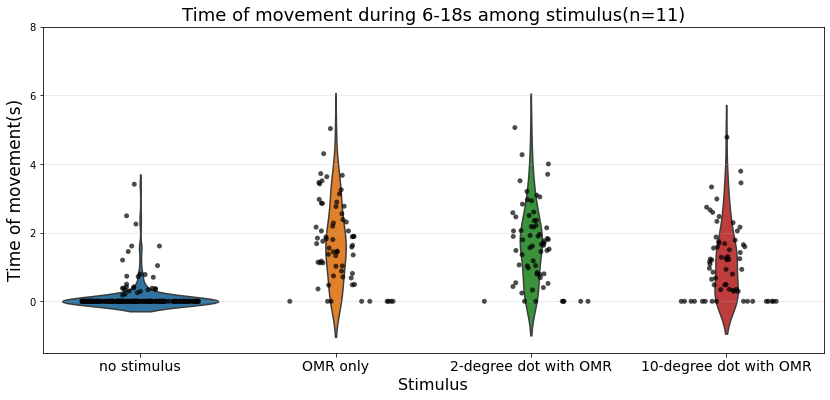

In [53]:
plt.figure(figsize = (14,6))

ax = sns.violinplot(x=df_OMR['size_type'], y=df_OMR['OMR_response']/100,inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_OMR[df_OMR['OMR_response']!=0]['size_type'], y=df_OMR[df_OMR['OMR_response']!=0]['OMR_response']/100,color = 'k', alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_OMR[df_OMR['OMR_response']==0]['size_type'], y=-df_OMR[df_OMR['OMR_response']==0]['OMR_response']/100,color = 'k',jitter = 0.3, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('Time of movement(s)',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('Time of movement during 6-18s among stimulus(n=11)',fontsize = 18)
plt.grid(axis = 'y',alpha = 0.3)
plt.ylim(-1.5,8)
plt.savefig(main_dir+'violin plot of movement time during 6-18s with strip plot(n=11).png')
plt.show()

In [36]:
np_reduction_0 = np.array(-df_OMR[df_OMR['size_type'] == 0.0]['OMR_response']/100).astype(np.float)
np_reduction_30 = np.array(-df_OMR[df_OMR['size_type'] == 30.0]['OMR_response']/100).astype(np.float)
np_reduction_32 = np.array(-df_OMR[df_OMR['size_type'] == 32.0]['OMR_response']/100).astype(np.float)
np_reduction_40 = np.array(-df_OMR[df_OMR['size_type'] == 40.0]['OMR_response']/100).astype(np.float)


# 
print(scipy.stats.mannwhitneyu(np_reduction_0, np_reduction_30, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_reduction_0, np_reduction_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_reduction_0, np_reduction_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_reduction_30, np_reduction_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_reduction_30, np_reduction_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_reduction_32, np_reduction_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))

MannwhitneyuResult(statistic=11786.5, pvalue=7.949148511227186e-32)
MannwhitneyuResult(statistic=11864.5, pvalue=1.6849609146255345e-32)
MannwhitneyuResult(statistic=10879.5, pvalue=1.735874320639816e-23)
MannwhitneyuResult(statistic=2140.0, pvalue=0.8643387525736375)
MannwhitneyuResult(statistic=1552.5, pvalue=0.004313963956533916)
MannwhitneyuResult(statistic=1579.0, pvalue=0.006293148248527421)


<ipython-input-36-d37c6a5462c5>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_reduction_0 = np.array(-df_OMR[df_OMR['size_type'] == 0.0]['OMR_response']/100).astype(np.float)
<ipython-input-36-d37c6a5462c5>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_reduction_30 = np.array(-df_OMR[df_OMR['size_type'] == 30.0]['OMR_response'

## influence of left and right stimulus

In [37]:
df_OMR_direction = pd.DataFrame(columns = ['OMR_response','size_type','Left_type','Right_type'])
for fish in fish_list:
    vsinfo_dir = glob.glob(fish+'\\vsinfo*_updated.csv')[0]
    vsinfo_result = pd.read_csv(vsinfo_dir)
    df_OMR_direction = df_OMR_direction.append(vsinfo_result.iloc[:,[-2,-1,1,6]], ignore_index=True)
df_OMR_direction.iloc[:,:2] = df_OMR_direction.iloc[:,:2].astype(dtype='float')

In [38]:
for idx in df_OMR_direction.index:
    if df_OMR_direction.loc[idx,'Left_type'] == 'n' and df_OMR_direction.loc[idx,'Right_type'] == 'n':
        df_OMR_direction.loc[idx,'no_stimulus'] = 'no_stimulus'
    if df_OMR_direction.loc[idx,'Left_type'] == 'm' and df_OMR_direction.loc[idx,'Right_type'] == 'o':
        df_OMR_direction.loc[idx,'direction'] = 'L' 
    if df_OMR_direction.loc[idx,'Left_type'] == 'o' and df_OMR_direction.loc[idx,'Right_type'] == 'm':
        df_OMR_direction.loc[idx,'direction'] = 'R'
    
    

In [39]:
df_OMR_direction

OMR_response  size_type Left_type Right_type direction  no_stimulus
0           168.0       30.0         m          o         L          NaN
1             0.0        0.0         n          n       NaN  no_stimulus
2           298.0       40.0         m          o         L          NaN
3             0.0        0.0         n          n       NaN  no_stimulus
4           250.0       32.0         m          o         L          NaN
..            ...        ...       ...        ...       ...          ...
391           0.0        0.0         n          n       NaN  no_stimulus
392           0.0       40.0         o          m         R          NaN
393          38.0        0.0         n          n       NaN  no_stimulus
394         184.0       30.0         o          m         R          NaN
395         104.0        0.0         n          n       NaN  no_stimulus

[396 rows x 6 columns]

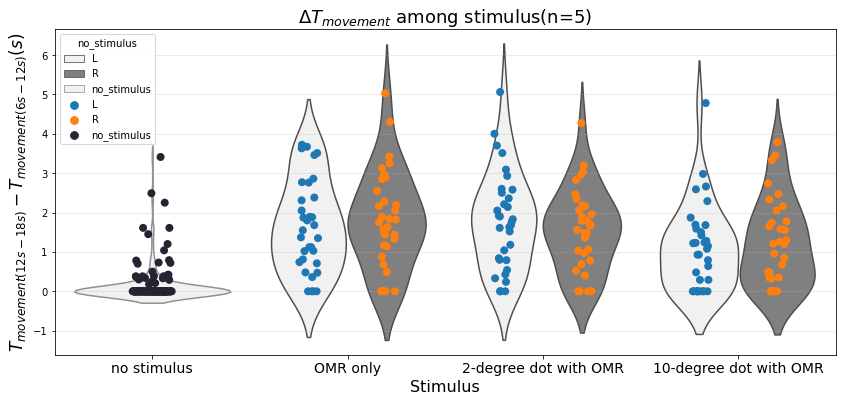

In [40]:
plt.figure(figsize = (14,6))
ax = sns.violinplot(x=df_OMR_direction['size_type'], y=df_OMR_direction['OMR_response']/100,hue = df_OMR_direction['direction'],color = 'grey',inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.violinplot(x=df_OMR_direction['size_type'], y=df_OMR_direction['OMR_response']/100,hue = df_OMR_direction['no_stimulus'],color = 'grey',inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_OMR_direction['size_type'], y=df_OMR_direction['OMR_response']/100,hue = df_OMR_direction['direction'], dodge=True,size = 8,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_OMR_direction['size_type'], y=df_OMR_direction['OMR_response']/100,hue = df_OMR_direction['no_stimulus'],color = 'b', dodge=True,size = 8,order = [0.0,30.0,32.0,40.0])
# ax = sns.stripplot(x=df_OMR[df_OMR['reduction']==0]['size_type'], y=-df_OMR[df_OMR['reduction']==0]['reduction']/100,color = 'k',jitter = 0.4, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('$T_{movement(12s-18s)}-T_{movement(6s-12s)}(s)$',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('$\Delta T_{movement}$ among stimulus(n=5)',fontsize = 18)
plt.grid(axis = 'y',alpha = 0.3)
plt.savefig(main_dir+'violin plot of movement 6-18s with strip plot(n=10).png')
plt.show()

# tail intensity analysis

In [14]:
df_bout_density.iloc[:,-3:] = df_bout_density.iloc[:,-3:].astype(dtype='float')
df_bout_density

fish trial size_type stimulus_direction no_stimulus  \
0     20220327_F2_15_10_Trial1     1        30                  L         NaN   
1     20220327_F2_15_10_Trial2     2         0                NaN           N   
2     20220327_F2_15_10_Trial3     3        40                  L         NaN   
3     20220327_F2_15_10_Trial4     4         0                NaN           N   
4     20220327_F2_15_10_Trial5     5        32                  L         NaN   
..                         ...   ...       ...                ...         ...   
391  20220402_F3_16_55_Trial32    32         0                NaN           N   
392  20220402_F3_16_55_Trial33    33        40                  R         NaN   
393  20220402_F3_16_55_Trial34    34         0                NaN           N   
394  20220402_F3_16_55_Trial35    35        30                  R         NaN   
395  20220402_F3_16_55_Trial36    36         0                NaN           N   

    bout_density_0 bout_density_6 bout_density_18  
0              0.0       0.171331             0.0  
1              0.0            0.0             0.0  
2              0.0        0.26538             0.0  
3              0.0            0.0             0.0  
4              0.0       0.254132             0.0  
..             ...            ...             ...  
391            0.0            0.0        0.045738  
392            0.0            0.0             0.0  
393       0.096931       0.047398        0.133832  
394            0.0       0.150437             0.0  
395            0.0       0.130293             0.0  

[396 rows x 8 columns]

In [15]:
df_bout_density.loc[:,'size_type'] = df_bout_density.loc[:,'size_type'].astype(dtype='float')
df_bout_density.loc[:,['bout_density_0','bout_density_6','bout_density_18']] = df_bout_density.loc[:,['bout_density_0','bout_density_6','bout_density_18']].astype(dtype='float')

In [16]:
df_bout_density.to_pickle(prefile_dir+'df_bout_intensity.pickle')

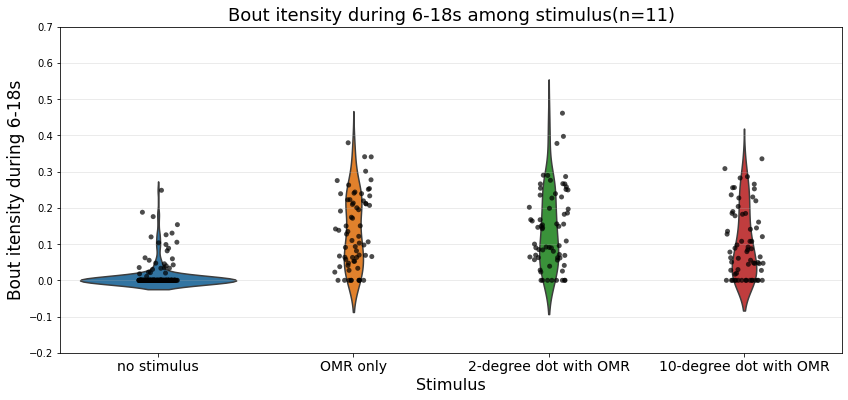

In [48]:
plt.figure(figsize = (14,6))
ax = sns.violinplot(x=df_bout_density['size_type'], y=df_bout_density['bout_density_6'],inner = None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_bout_density['size_type'], y=df_bout_density['bout_density_6'],color = 'k', alpha = 0.7,order = [0.0,30.0,32.0,40.0])
# ax = sns.stripplot(x=df_OMR[df_OMR['reduction']==0]['size_type'], y=-df_OMR[df_OMR['reduction']==0]['reduction']/100,color = 'k',jitter = 0.4, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('Bout itensity during 6-18s',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('Bout intensity during 6-18s among stimulus(n=11)',fontsize = 18)
plt.grid(axis = 'y',alpha = 0.3)
plt.ylim((-0.2,0.7))
plt.savefig(main_dir+'violin plot of bout density during 6-18s among stimulus(n=11).png')
plt.show()

In [44]:
np_density_0 = np.array(df_bout_density[df_bout_density['size_type'] == 0.0]['bout_density_6']).astype(np.float)
np_density_30 = np.array(df_bout_density[df_bout_density['size_type'] == 30.0]['bout_density_6']).astype(np.float)
np_density_32 = np.array(df_bout_density[df_bout_density['size_type'] == 32.0]['bout_density_6']).astype(np.float)
np_density_40 = np.array(df_bout_density[df_bout_density['size_type'] == 40.0]['bout_density_6']).astype(np.float)


print(scipy.stats.mannwhitneyu(np_density_0, np_density_30, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_0, np_density_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_0, np_density_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_30, np_density_32, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_30, np_density_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_32, np_density_40, use_continuity=True, alternative='two-sided', axis=0, method='auto'))

MannwhitneyuResult(statistic=1389.5, pvalue=1.3414835267124807e-30)
MannwhitneyuResult(statistic=1280.0, pvalue=1.2735390937291736e-31)
MannwhitneyuResult(statistic=2241.0, pvalue=5.822826851438357e-23)
MannwhitneyuResult(statistic=2112.0, pvalue=0.7653841957231549)
MannwhitneyuResult(statistic=2628.0, pvalue=0.04010029282818144)
MannwhitneyuResult(statistic=2689.0, pvalue=0.01978699103829151)


<ipython-input-44-3cedbcbc290c>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_density_0 = np.array(df_bout_density[df_bout_density['size_type'] == 0.0]['bout_density_6']).astype(np.float)
<ipython-input-44-3cedbcbc290c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_density_30 = np.array(df_bout_density[df_bout_density['size_ty

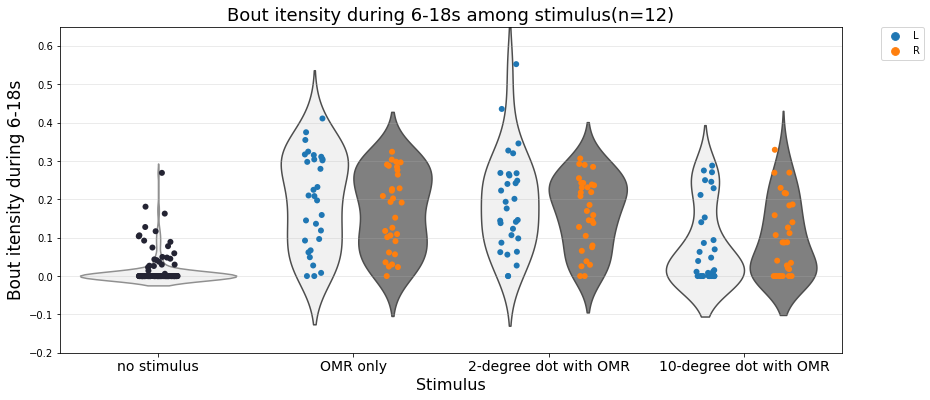

In [63]:
plt.figure(figsize = (14,6))
ax = sns.violinplot(x=df_bout_density['size_type'], y=df_bout_density['bout_density_6'],hue = df_bout_density['stimulus_direction'],color = 'grey',inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.violinplot(x=df_bout_density['size_type'], y=df_bout_density['bout_density_6'],hue = df_bout_density['no_stimulus'],color = 'grey',inner =None,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_bout_density['size_type'], y=df_bout_density['bout_density_6'],hue = df_bout_density['stimulus_direction'], dodge=True,size = 6,order = [0.0,30.0,32.0,40.0])
ax = sns.stripplot(x=df_bout_density['size_type'], y=df_bout_density['bout_density_6'],hue = df_bout_density['no_stimulus'],color = 'b', dodge=True,size = 6,order = [0.0,30.0,32.0,40.0])

handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-3:-1], labels[-3:-1], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# ax = sns.stripplot(x=df_OMR[df_OMR['reduction']==0]['size_type'], y=-df_OMR[df_OMR['reduction']==0]['reduction']/100,color = 'k',jitter = 0.4, alpha = 0.7,order = [0.0,30.0,32.0,40.0])
ax.set_xlabel('Stimulus',fontsize = 16)
ax.set_ylabel('Bout itensity during 6-18s',fontsize = 17)
ax.set_xticklabels(['no stimulus','OMR only','2-degree dot with OMR','10-degree dot with OMR'],fontsize = 14)
ax.set_title('Bout itensity during 6-18s among stimulus(n=12)',fontsize = 18)
plt.grid(axis = 'y',alpha = 0.3)
plt.ylim((-0.2,0.65))
plt.savefig(main_dir+'violin plot of bout density during 6-18s among stimulus(n=10)(left and right).png')
plt.show()


In [64]:
df_density_30 = df_bout_density[df_bout_density['size_type'] == 30.0]
df_density_32 = df_bout_density[df_bout_density['size_type'] == 32.0]
df_density_40 = df_bout_density[df_bout_density['size_type'] == 40.0]


np_density_30_L = np.array(df_density_30[df_density_30['stimulus_direction'] == 'L']['bout_density_6']).astype(np.float)
np_density_30_R = np.array(df_density_30[df_density_30['stimulus_direction'] == 'R']['bout_density_6']).astype(np.float)
np_density_32_L = np.array(df_density_32[df_density_32['stimulus_direction'] == 'L']['bout_density_6']).astype(np.float)
np_density_32_R = np.array(df_density_32[df_density_32['stimulus_direction'] == 'R']['bout_density_6']).astype(np.float)
np_density_40_L = np.array(df_density_40[df_density_40['stimulus_direction'] == 'L']['bout_density_6']).astype(np.float)
np_density_40_R = np.array(df_density_40[df_density_40['stimulus_direction'] == 'R']['bout_density_6']).astype(np.float)

print(scipy.stats.mannwhitneyu(np_density_30_L, np_density_30_R, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_32_L, np_density_32_R, use_continuity=True, alternative='two-sided', axis=0, method='auto'))
print(scipy.stats.mannwhitneyu(np_density_40_L, np_density_40_R, use_continuity=True, alternative='two-sided', axis=0, method='auto'))


MannwhitneyuResult(statistic=526.0, pvalue=0.2642996664471505)
MannwhitneyuResult(statistic=490.0, pvalue=0.5591759405903081)
MannwhitneyuResult(statistic=404.5, pvalue=0.4978074110540919)


<ipython-input-64-92991c279fa5>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_density_30_L = np.array(df_density_30[df_density_30['stimulus_direction'] == 'L']['bout_density_6']).astype(np.float)
<ipython-input-64-92991c279fa5>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_density_30_R = np.array(df_density_30[df_density_30['s

# fish type analysis

In [6]:
df_fish

fish trial size_type  \
0    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...     1        30   
1    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...     2         0   
2    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...     3        40   
3    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...     4         0   
4    C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...     5        32   
..                                                 ...   ...       ...   
391  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    32         0   
392  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    33        40   
393  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    34         0   
394  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    35        30   
395  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    36         0   

    movement_time  
0             168  
1               0  
2             298  
3               0  
4             250  
..            ...  
391             0  
392             0  
393            38  
394           184  
395           104  

[396 rows x 4 columns]

In [59]:
df_bout_density

fish trial size_type stimulus_direction no_stimulus  \
0     20220327_F2_15_10_Trial1     1        30                  L         NaN   
1     20220327_F2_15_10_Trial2     2         0                NaN           N   
2     20220327_F2_15_10_Trial3     3        40                  L         NaN   
3     20220327_F2_15_10_Trial4     4         0                NaN           N   
4     20220327_F2_15_10_Trial5     5        32                  L         NaN   
..                         ...   ...       ...                ...         ...   
391  20220402_F3_16_55_Trial32    32         0                NaN           N   
392  20220402_F3_16_55_Trial33    33        40                  R         NaN   
393  20220402_F3_16_55_Trial34    34         0                NaN           N   
394  20220402_F3_16_55_Trial35    35        30                  R         NaN   
395  20220402_F3_16_55_Trial36    36         0                NaN           N   

    bout_density_0 bout_density_6 bout_density_18  
0                0       0.171331               0  
1                0              0               0  
2                0        0.26538               0  
3                0              0               0  
4                0       0.254132               0  
..             ...            ...             ...  
391              0              0        0.045738  
392              0              0               0  
393       0.096931       0.047398        0.133832  
394              0       0.150437               0  
395              0       0.130293               0  

[396 rows x 8 columns]

In [60]:
df_suppression = pd.DataFrame(columns = ['fish','repeat','OMR_movement_time','10_movement_time','time_ratio','OMR_bout_intensity','10_bout_intensity','intensity_ratio'])

for i in range(0,int(df_fish.shape[0]/6)):
    temp_df_fish = df_fish.iloc[i*6:i*6+6,:]
    temp_df_bout_intensity = df_bout_density.iloc[i*6:i*6+6,:]
    
    OMR_movement_time = float(temp_df_fish[temp_df_fish['size_type'] == 30]['movement_time'])
    movement_time_10 = float(temp_df_fish[temp_df_fish['size_type'] == 40]['movement_time'])
    df_suppression.loc[i,'fish'] = temp_df_fish.iloc[0,0]
    df_suppression.loc[i,'repeat'] = temp_df_fish.iloc[5,1]/6
    df_suppression.loc[i,'OMR_movement_time'] = OMR_movement_time
    df_suppression.loc[i,'10_movement_time'] = movement_time_10
    if OMR_movement_time>0:
        df_suppression.loc[i,'time_ratio'] = movement_time_10/OMR_movement_time
        
    OMR_bout_intensity =  float(temp_df_bout_intensity[temp_df_bout_intensity['size_type'] == 30]['bout_density_6'])
    bout_intensity_10 =  float(temp_df_bout_intensity[temp_df_bout_intensity['size_type'] == 40]['bout_density_6'])
    
    df_suppression.loc[i,'OMR_bout_intensity'] = OMR_bout_intensity
    df_suppression.loc[i,'10_bout_intensity'] = bout_intensity_10
    if OMR_movement_time>0:
        df_suppression.loc[i,'intensity_ratio'] = bout_intensity_10/OMR_bout_intensity

In [61]:
df_suppression['time_substration'] = df_suppression['10_movement_time'] -df_suppression['OMR_movement_time']
df_suppression['intensity_substration'] = df_suppression['10_bout_intensity'] -df_suppression['OMR_bout_intensity']

df_suppression

fish repeat  \
0   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    1.0   
1   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    2.0   
2   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    3.0   
3   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    4.0   
4   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    5.0   
..                                                ...    ...   
61  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    2.0   
62  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    3.0   
63  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    4.0   
64  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    5.0   
65  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    6.0   

   OMR_movement_time 10_movement_time time_ratio OMR_bout_intensity  \
0              168.0            298.0    1.77381           0.171331   
1              325.0            247.0       0.76           0.275294   
2              205.0            168.0   0.819512           0.209528   
3              228.0            233.0    1.02193           0.222599   
4              112.0            169.0   1.508929           0.121407   
..               ...              ...        ...                ...   
61             205.0             32.0   0.156098           0.174063   
62               0.0             29.0        NaN                0.0   
63             182.0              0.0        0.0            0.12756   
64              36.0            266.0   7.388889           0.027556   
65             184.0              0.0        0.0           0.150437   

   10_bout_intensity intensity_ratio time_substration intensity_substration  
0            0.26538        1.548933            130.0              0.094049  
1            0.23585        0.856722            -78.0             -0.039444  
2           0.160707        0.766994            -37.0             -0.048821  
3           0.256014        1.150112              5.0              0.033415  
4           0.189682        1.562367             57.0              0.068275  
..               ...             ...              ...                   ...  
61          0.027339        0.157066           -173.0             -0.146724  
62          0.029611             NaN             29.0              0.029611  
63               0.0             0.0           -182.0              -0.12756  
64          0.182244        6.613673            230.0              0.154689  
65               0.0             0.0           -184.0             -0.150437  

[66 rows x 10 columns]

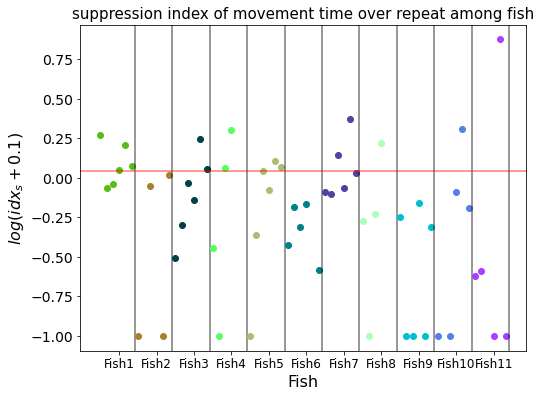

In [194]:
plt.figure(figsize = (8,6))
for x in range(1,12):
    plt.plot(range(x*6-6,x*6),np.log10(np.array(df_suppression['time_ratio'][x*6-6:x*6],dtype = float)+0.1),'o',color = [(x%3)/3,1-(x%4)/4,x/11])
    plt.axvline(x=6*x-0.5, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.xticks([3,9,15,21,27,33,39,45,51,57,63],['Fish1','Fish2','Fish3','Fish4','Fish5','Fish6','Fish7','Fish8','Fish9','Fish10','Fish11'],fontsize = '12')
plt.title('suppression index of movement time over repeat among fish',fontsize = 15)
plt.ylabel('$log(idx_s+0.1)$',fontsize = 16)
plt.xlabel('Fish',fontsize = 16)
plt.yticks(fontsize = 14)
plt.axhline(y = np.log10(1.1),linewidth=2, color = 'r',alpha = 0.4,linestyle = '-')
plt.show()

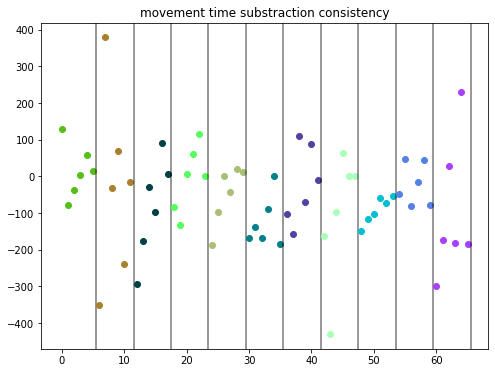

In [55]:
plt.figure(figsize = (8,6))
for x in range(1,12):
    plt.plot(range(x*6-6,x*6),df_time_suppression['time_substration'][x*6-6:x*6],'o',color = [(x%3)/3,1-(x%4)/4,x/11])
    plt.axvline(x=6*x-0.5, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.title('movement time substraction consistency')
plt.show()

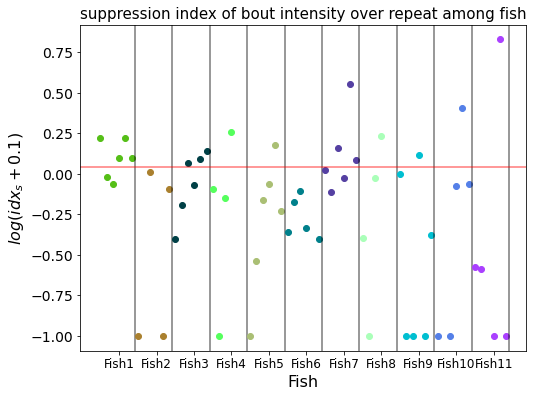

In [195]:
plt.figure(figsize = (8,6))
for x in range(1,12):
    plt.plot(range(x*6-6,x*6),np.log10(np.array(df_suppression['intensity_ratio'][x*6-6:x*6],dtype = float)+0.1),'o',color = [(x%3)/3,1-(x%4)/4,x/11])
    plt.axvline(x=6*x-0.5, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.xticks([3,9,15,21,27,33,39,45,51,57,63],['Fish1','Fish2','Fish3','Fish4','Fish5','Fish6','Fish7','Fish8','Fish9','Fish10','Fish11'],fontsize = '12')
plt.title('suppression index of bout intensity over repeat among fish',fontsize = 15)
plt.ylabel('$log(idx_s+0.1)$',fontsize = 16)
plt.xlabel('Fish',fontsize = 16)
plt.yticks(fontsize = 14)
plt.axhline(y = np.log10(1.1),linewidth=2, color = 'r',alpha = 0.4,linestyle = '-')
plt.show()

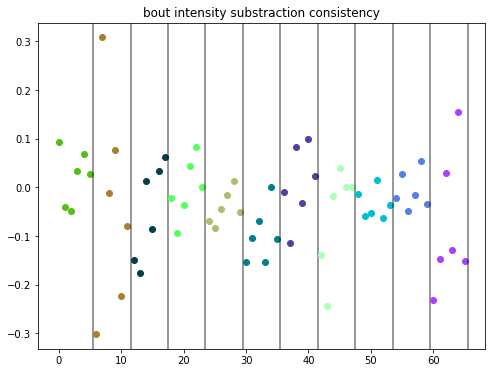

In [183]:
plt.figure(figsize = (8,6))
for x in range(1,12):
    plt.plot(range(x*6-6,x*6),df_suppression['intensity_substration'][x*6-6:x*6],'o',color = [(x%3)/3,1-(x%4)/4,x/11])
    plt.axvline(x=6*x-0.5, linewidth=2, color = 'k',alpha = 0.4,linestyle = '-')
plt.title('bout intensity substraction consistency')
plt.show()

In [159]:
df_suppression

fish repeat  \
0   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    1.0   
1   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    2.0   
2   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    3.0   
3   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    4.0   
4   C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    5.0   
..                                                ...    ...   
61  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    2.0   
62  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    3.0   
63  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    4.0   
64  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    5.0   
65  C:\Users\yxton\Data\OMR_dataset\Simultaneous_O...    6.0   

   OMR_movement_time 10_movement_time time_ratio OMR_bout_intensity  \
0              168.0            298.0    1.77381           0.171331   
1              325.0            247.0       0.76           0.275294   
2              205.0            168.0   0.819512           0.209528   
3              228.0            233.0    1.02193           0.222599   
4              112.0            169.0   1.508929           0.121407   
..               ...              ...        ...                ...   
61             205.0             32.0   0.156098           0.174063   
62               0.0             29.0        NaN                0.0   
63             182.0              0.0        0.0            0.12756   
64              36.0            266.0   7.388889           0.027556   
65             184.0              0.0        0.0           0.150437   

   10_bout_intensity intensity_ratio time_substration intensity_substration  
0            0.26538        1.548933            130.0              0.094049  
1            0.23585        0.856722            -78.0             -0.039444  
2           0.160707        0.766994            -37.0             -0.048821  
3           0.256014        1.150112              5.0              0.033415  
4           0.189682        1.562367             57.0              0.068275  
..               ...             ...              ...                   ...  
61          0.027339        0.157066           -173.0             -0.146724  
62          0.029611             NaN             29.0              0.029611  
63               0.0             0.0           -182.0              -0.12756  
64          0.182244        6.613673            230.0              0.154689  
65               0.0             0.0           -184.0             -0.150437  

[66 rows x 10 columns]

# timing influence

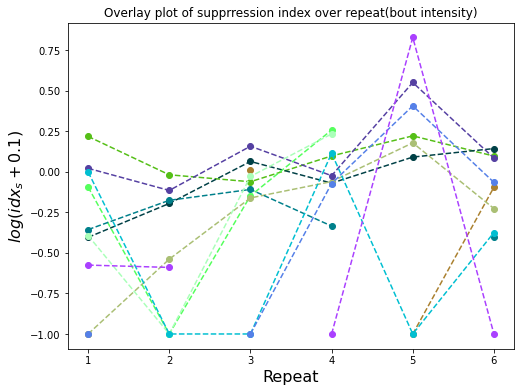

In [179]:
plt.figure(figsize = (8,6))
for x in range(1,12):
    plt.plot(range(1,7),np.log10(np.array(df_suppression['intensity_ratio'][x*6-6:x*6],dtype = float)+0.1),'--o',color = [(x%3)/3,1-(x%4)/4,x/11])
plt.ylabel('$log(idx_s+0.1)$',fontsize = 16)
plt.xlabel('Repeat',fontsize = 16)
plt.title('Overlay plot of supprression index over repeat(bout intensity)')
plt.show()

In [169]:
np.log10(0.0001)

-4.0

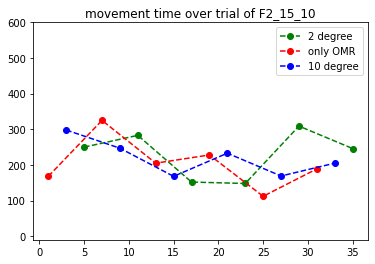

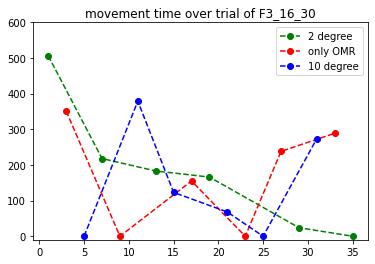

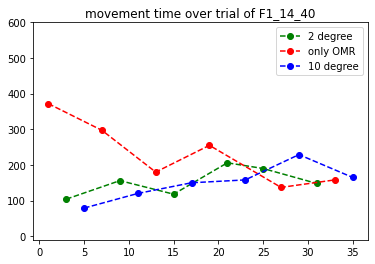

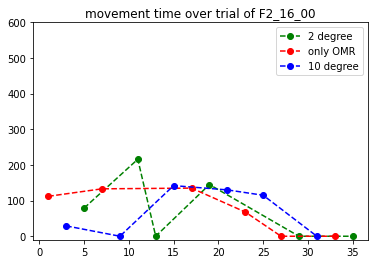

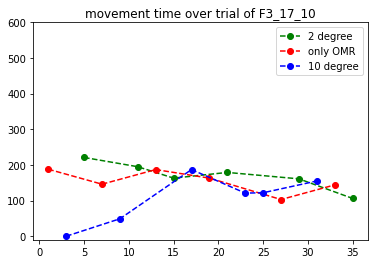

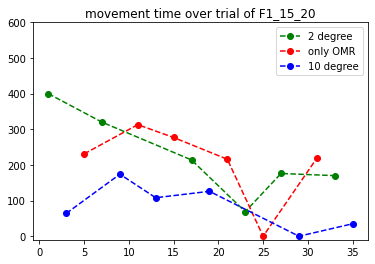

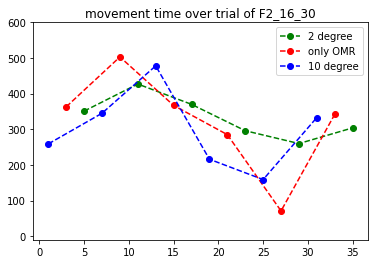

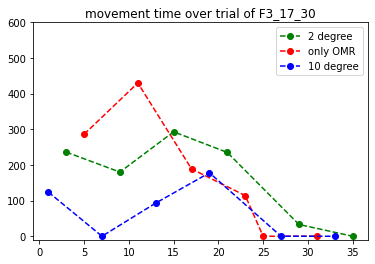

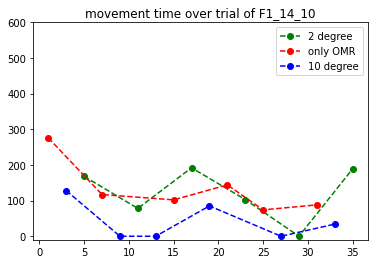

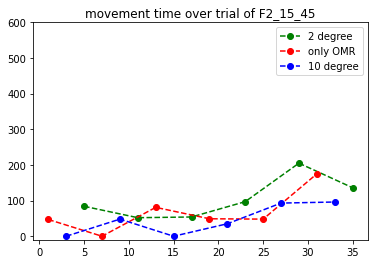

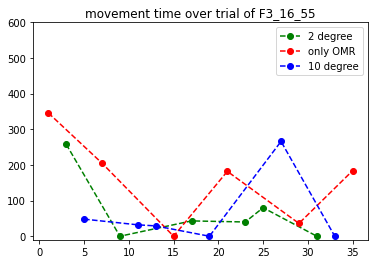

In [136]:
# only OMR trials and 2 degree trials, moving time 

for fish in fish_list:
    temp_df_fish = df_fish[df_fish['fish'] == fish]
    temp_df_fish_2 = temp_df_fish[temp_df_fish['size_type'] == 32]
    temp_df_fish_OMR = temp_df_fish[temp_df_fish['size_type'] == 30]
    temp_df_fish_10 = temp_df_fish[temp_df_fish['size_type'] == 40]
    plt.plot(temp_df_fish_2['trial'],temp_df_fish_2['movement_time'],'--o',color = 'g')
    plt.plot(temp_df_fish_OMR['trial'],temp_df_fish_OMR['movement_time'],'--o',color = 'r')
    plt.plot(temp_df_fish_10['trial'],temp_df_fish_10['movement_time'],'--o',color = 'b')
    plt.legend(['2 degree','only OMR','10 degree'])
    plt.title('movement time over trial of '+str(fish[-8:]))
    plt.ylim(-10,600)
    plt.show()

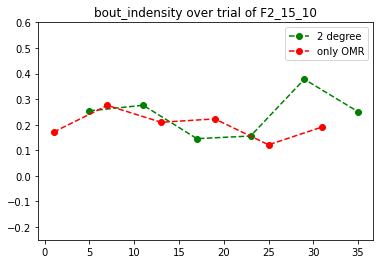

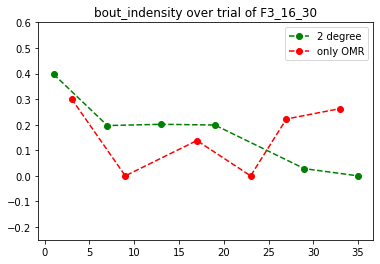

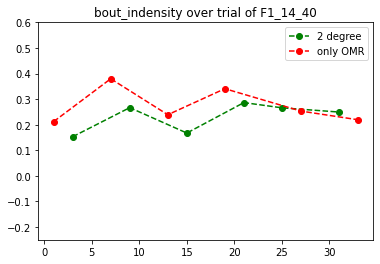

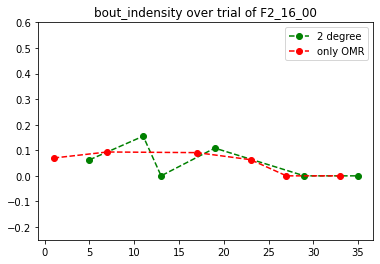

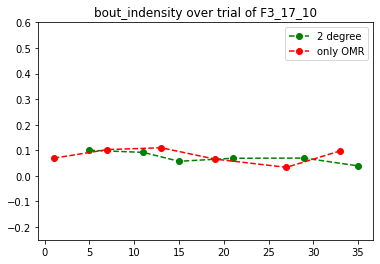

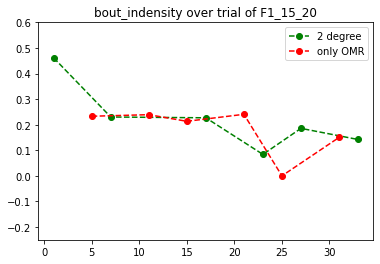

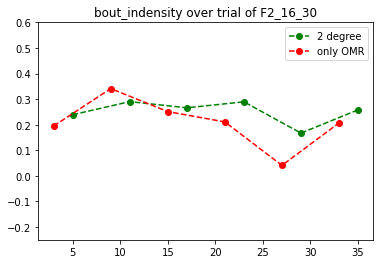

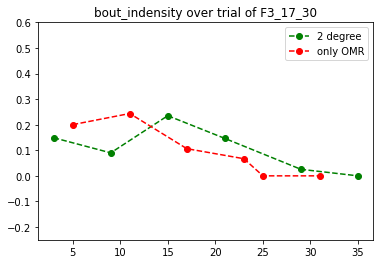

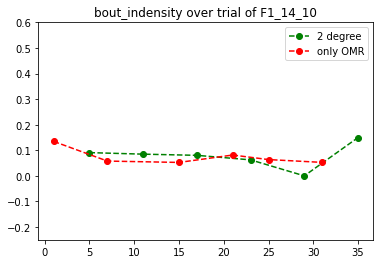

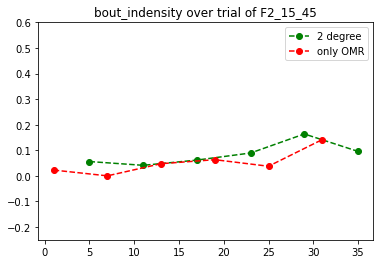

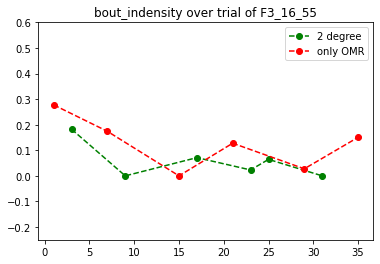

In [135]:

for fish_i in range(0,len(fish_list)):
    temp_df_bout_intensity = df_bout_density.loc[fish_i*36:fish_i*36+35,:]
    temp_df_bout_intensity_2 = temp_df_bout_intensity[temp_df_bout_intensity['size_type'] == 32]
    temp_df_bout_intensity_OMR = temp_df_bout_intensity[temp_df_bout_intensity['size_type'] == 30]
    plt.plot(temp_df_bout_intensity_2['trial'],temp_df_bout_intensity_2['bout_density_6'],'--o',color = 'g')
    plt.plot(temp_df_bout_intensity_OMR['trial'],temp_df_bout_intensity_OMR['bout_density_6'],'--o',color = 'r')
    plt.legend(['2 degree','only OMR'])
    plt.title('bout_indensity over trial of '+str(fish_list[fish_i][-8:]))
    plt.ylim(-0.1,0.6)
    plt.show()

13.815510557964274